## **INTRODUCTION**

**Title:** Data Science Analysis of Pizza Sales

**Introduction**

In the ever-evolving landscape of the food industry, understanding customer preferences and sales patterns is crucial for business success. This analysis delves into a comprehensive dataset on pizza sales, aiming to uncover patterns and insights that can drive informed business decisions.

**Dataset Overview**

The dataset at hand offers a rich collection of features, encapsulating the dynamics of pizza sales. Key columns include:

**Pizza Attributes:**

pizza_id: Identifier for different types of pizzas.
pizza_name_id: A unique combination of pizza name and size.
pizza_size: Categorization of pizzas based on size.
pizza_category: Classification of pizzas into various categories.
pizza_ingredients: List of ingredients used in each pizza.
pizza_name: Name of the pizza.

**Order Details:**

order_id: Unique identifier for each order.
quantity: Number of pizzas ordered per transaction.
order_date & order_time: Timestamps providing temporal context to each order.

**Pricing Information:**

unit_price: Price of a single unit of pizza.
total_price: Total price for the order, serving as the target variable for our analysis.

**Objective**

The primary goal of this analysis is to understand the factors influencing total_price, with a particular focus on its relationship with unit_price and quantity. By analyzing these relationships, we aim to:

Identify trends and patterns in pizza sales.
Understand the impact of different pizza attributes on sales value.
Explore how temporal factors (date and time) affect total sales.

**Significance**

The insights derived from this study are expected to guide strategic decisions in menu planning, pricing strategies, and marketing efforts. Additionally, this analysis serves as a blueprint for leveraging data science in understanding consumer behavior in the food industry.

## **Importing the libraries**

In [9]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

!pip install h2o
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import plotly.express as px
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


## **Importing the Dataset**

In [10]:
df=pd.read_csv('/content/pizza_sales.csv')
df.head()

pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0       1.0       1.0     hawaiian_m       1.0   1/1/2015   11:38:36   
1       2.0       2.0  classic_dlx_m       1.0   1/1/2015   11:57:40   
2       3.0       2.0  five_cheese_l       1.0   1/1/2015   11:57:40   
3       4.0       2.0    ital_supr_l       1.0   1/1/2015   11:57:40   
4       5.0       2.0     mexicana_m       1.0   1/1/2015   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...   

                  pizza_name  
0         The Hawaiian Pizza  
1   The Classic Deluxe Pizza  
2      The Five Cheese Pizza  
3  The Italian Supreme Pizza  
4         The Mexicana Pizza

In [11]:
df.dtypes

pizza_id             float64
order_id             float64
pizza_name_id         object
quantity             float64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

The dataset contains both categorical and numeric dats types.
There are 7 categorical data columns and 5 numerical data columns

In [12]:
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

The dataset has no null values in any of the columns.

Drop the columns containing IDs

In [13]:
df.drop(['order_id', 'pizza_id'], axis=1, inplace=True)

## **LABEL ENCODING**

Label encoding for pizza_size and pizza_column

In [14]:
# Create label encoders
label_encoder_name = LabelEncoder()
label_encoder_size = LabelEncoder()

# Fit and transform the label encoders for 'pizza_name' and 'pizza_size'
df['pizza_name'] = label_encoder_name.fit_transform(df['pizza_name'])
df['pizza_size'] = label_encoder_size.fit_transform(df['pizza_size'])
df.head()

pizza_name_id  quantity order_date order_time  unit_price  total_price  \
0     hawaiian_m       1.0   1/1/2015   11:38:36       13.25        13.25   
1  classic_dlx_m       1.0   1/1/2015   11:57:40       16.00        16.00   
2  five_cheese_l       1.0   1/1/2015   11:57:40       18.50        18.50   
3    ital_supr_l       1.0   1/1/2015   11:57:40       20.75        20.75   
4     mexicana_m       1.0   1/1/2015   11:57:40       16.00        16.00   

   pizza_size pizza_category  \
0           1        Classic   
1           1        Classic   
2           0         Veggie   
3           0        Supreme   
4           1         Veggie   

                                   pizza_ingredients  pizza_name  
0           Sliced Ham, Pineapple, Mozzarella Cheese          12  
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...           7  
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...           8  
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...          14  
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...          17

Label encoding for pizza_name_id by grouping pizza_name and pizza_size column

In [15]:
df['pizza_name_id'] = df['pizza_name'] * 100 + df['pizza_size']
df.head()

pizza_name_id  quantity order_date order_time  unit_price  total_price  \
0           1201       1.0   1/1/2015   11:38:36       13.25        13.25   
1            701       1.0   1/1/2015   11:57:40       16.00        16.00   
2            800       1.0   1/1/2015   11:57:40       18.50        18.50   
3           1400       1.0   1/1/2015   11:57:40       20.75        20.75   
4           1701       1.0   1/1/2015   11:57:40       16.00        16.00   

   pizza_size pizza_category  \
0           1        Classic   
1           1        Classic   
2           0         Veggie   
3           0        Supreme   
4           1         Veggie   

                                   pizza_ingredients  pizza_name  
0           Sliced Ham, Pineapple, Mozzarella Cheese          12  
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...           7  
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...           8  
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...          14  
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...          17

Converting order_date and order_time column

In [16]:
# Convert 'order_date' to datetime and replace values in the same column
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce', dayfirst=True)

# Extract the hour from 'order_time' and replace values in the same column
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.strftime('%H')

# Create 'order_date' column and replace values in the same 'order_date' column
df['order_date'] = df['order_date'].dt.day_name()
df.head()

pizza_name_id  quantity order_date order_time  unit_price  total_price  \
0           1201       1.0   Thursday         11       13.25        13.25   
1            701       1.0   Thursday         11       16.00        16.00   
2            800       1.0   Thursday         11       18.50        18.50   
3           1400       1.0   Thursday         11       20.75        20.75   
4           1701       1.0   Thursday         11       16.00        16.00   

   pizza_size pizza_category  \
0           1        Classic   
1           1        Classic   
2           0         Veggie   
3           0        Supreme   
4           1         Veggie   

                                   pizza_ingredients  pizza_name  
0           Sliced Ham, Pineapple, Mozzarella Cheese          12  
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...           7  
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...           8  
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...          14  
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...          17

Calculating the frequency of each ingredient in the 'pizza_ingredients' column and mapping the frequency of the ingridients

In [17]:
# Calculate the frequency of each ingredient in the 'pizza_ingredients' column
ingredient_freq = df['pizza_ingredients'].value_counts().to_dict()

# Map the frequencies to the 'pizza_ingredients' column
df['pizza_ingredients'] = df['pizza_ingredients'].map(ingredient_freq)
df.head()

pizza_name_id  quantity order_date order_time  unit_price  total_price  \
0           1201       1.0   Thursday         11       13.25        13.25   
1            701       1.0   Thursday         11       16.00        16.00   
2            800       1.0   Thursday         11       18.50        18.50   
3           1400       1.0   Thursday         11       20.75        20.75   
4           1701       1.0   Thursday         11       16.00        16.00   

   pizza_size pizza_category  pizza_ingredients  pizza_name  
0           1        Classic               2370          12  
1           1        Classic               2416           7  
2           0         Veggie               1359           8  
3           0        Supreme               1849          14  
4           1         Veggie               1456          17

Label encoding pizza_category

In [18]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()
# Fit and transform the 'pizza_category' column
df['pizza_category'] = label_encoder.fit_transform(df['pizza_category'])
df.head()

pizza_name_id  quantity order_date order_time  unit_price  total_price  \
0           1201       1.0   Thursday         11       13.25        13.25   
1            701       1.0   Thursday         11       16.00        16.00   
2            800       1.0   Thursday         11       18.50        18.50   
3           1400       1.0   Thursday         11       20.75        20.75   
4           1701       1.0   Thursday         11       16.00        16.00   

   pizza_size  pizza_category  pizza_ingredients  pizza_name  
0           1               1               2370          12  
1           1               1               2416           7  
2           0               3               1359           8  
3           0               2               1849          14  
4           1               3               1456          17

Label encoding order_date


In [19]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()
# Fit and transform the 'order_date' column
df['order_date'] = label_encoder.fit_transform(df['order_date'])
df.head()

pizza_name_id  quantity  order_date order_time  unit_price  total_price  \
0           1201       1.0           4         11       13.25        13.25   
1            701       1.0           4         11       16.00        16.00   
2            800       1.0           4         11       18.50        18.50   
3           1400       1.0           4         11       20.75        20.75   
4           1701       1.0           4         11       16.00        16.00   

   pizza_size  pizza_category  pizza_ingredients  pizza_name  
0           1               1               2370          12  
1           1               1               2416           7  
2           0               3               1359           8  
3           0               2               1849          14  
4           1               3               1456          17

Convert the 'NumericColumn' to 'int' data type

In [20]:
# Convert the 'NumericColumn' to 'int' data type
df['order_time'] = df['order_time'].astype(int)
df.dtypes

pizza_name_id          int64
quantity             float64
order_date             int64
order_time             int64
unit_price           float64
total_price          float64
pizza_size             int64
pizza_category         int64
pizza_ingredients      int64
pizza_name             int64
dtype: object

In [21]:
df.head()

pizza_name_id  quantity  order_date  order_time  unit_price  total_price  \
0           1201       1.0           4          11       13.25        13.25   
1            701       1.0           4          11       16.00        16.00   
2            800       1.0           4          11       18.50        18.50   
3           1400       1.0           4          11       20.75        20.75   
4           1701       1.0           4          11       16.00        16.00   

   pizza_size  pizza_category  pizza_ingredients  pizza_name  
0           1               1               2370          12  
1           1               1               2416           7  
2           0               3               1359           8  
3           0               2               1849          14  
4           1               3               1456          17

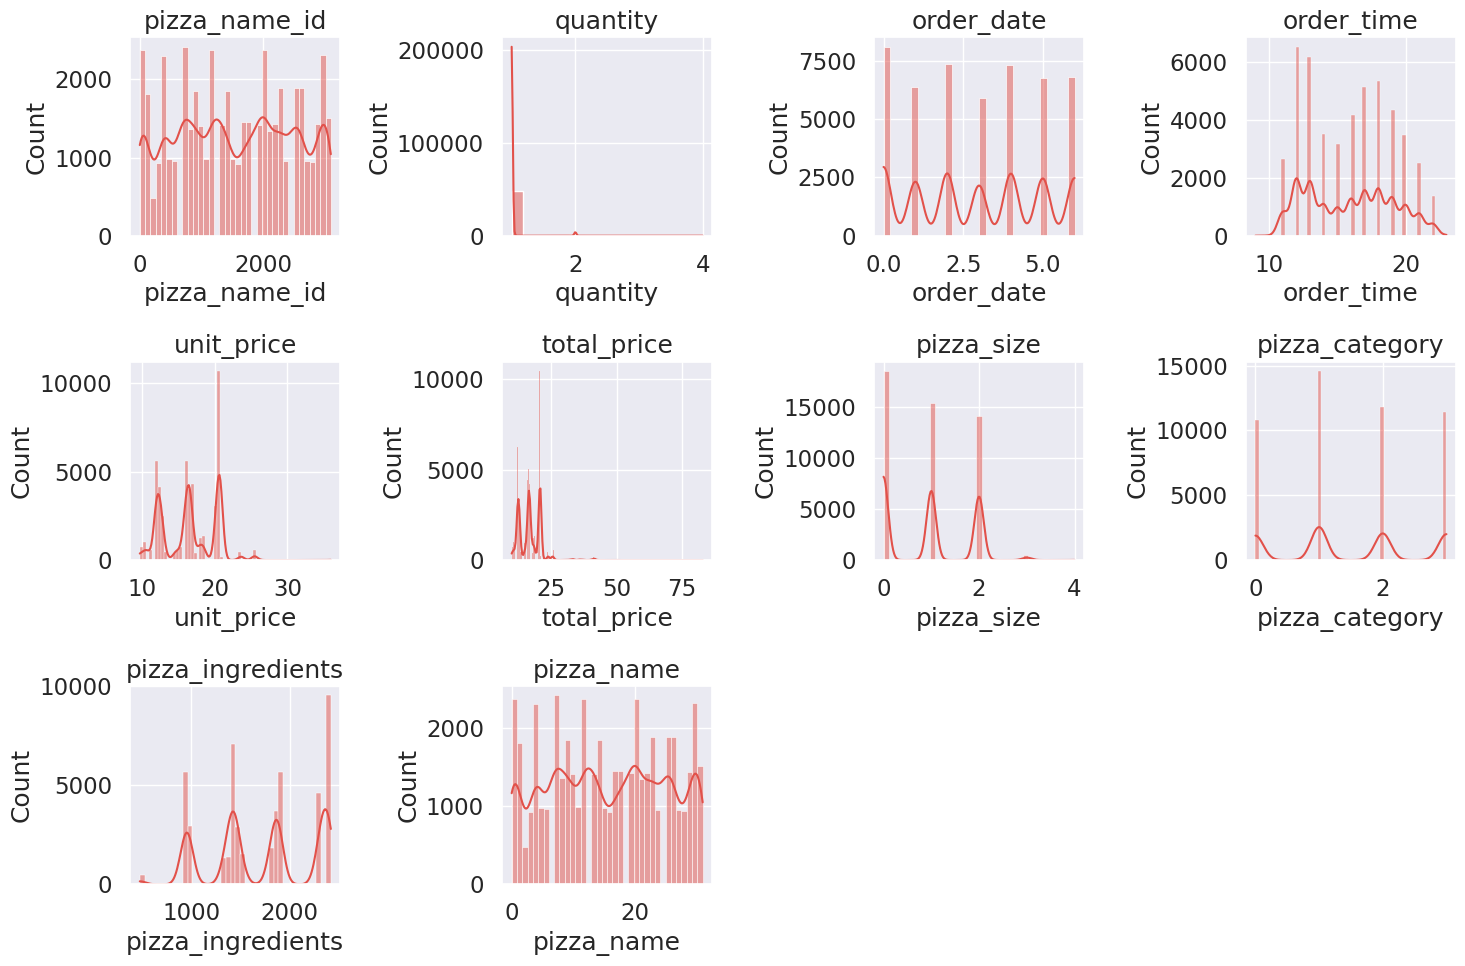

In [22]:
# Selecting numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting distributions of numeric variables
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
    plt.tight_layout()

plt.show()

**#4.1 Corelation matrix using heatmap**

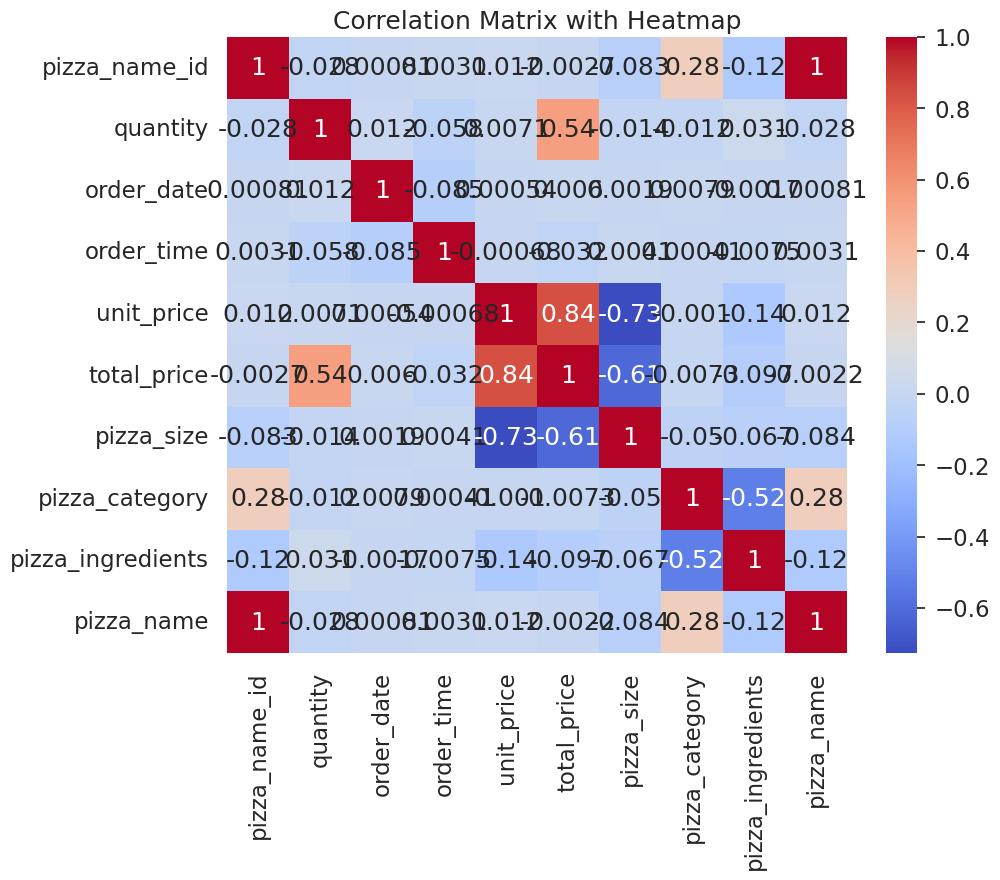

In [23]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix with Heatmap")
plt.show()

**#4.2 Random Forest Regression**


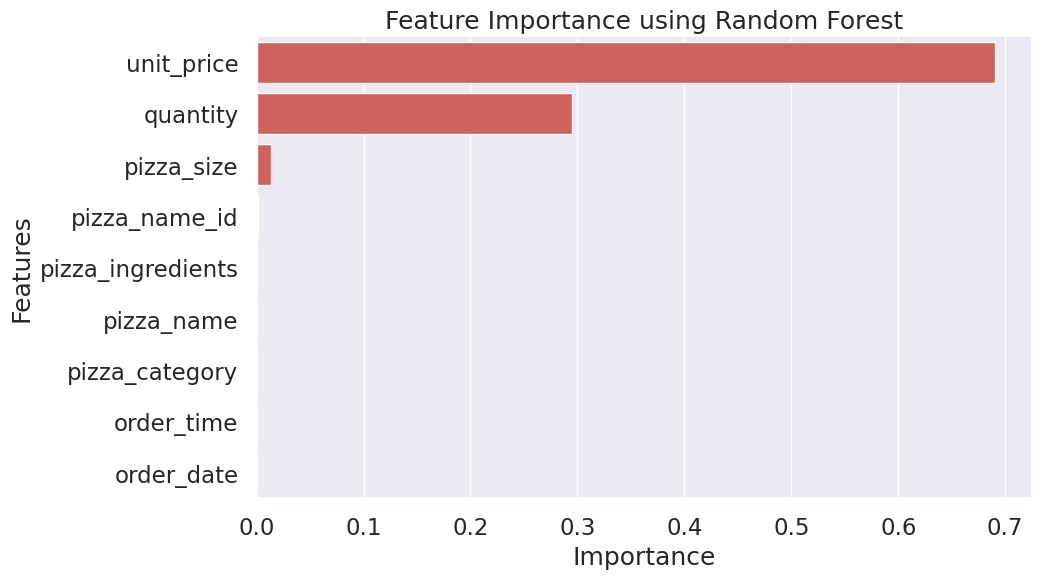

In [24]:
# Preparing the data
X = df.drop('total_price', axis=1)  # Independent variables
y = df['total_price']  # Dependent variable (target)

# Creating and fitting the Random Forest model
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X, y)

# Extracting feature importances
feature_importances = random_forest.feature_importances_
features = X.columns
rf_importances = pd.Series(feature_importances, index=features).sort_values(ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances, y=rf_importances.index)
plt.title("Feature Importance using Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

Splitting the dataset for model training

In [25]:
# Splitting the dataset into training and testing sets
X = df.drop('total_price', axis=1)
y = df['total_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
df.describe()

pizza_name_id      quantity    order_date    order_time    unit_price  \
count   48620.000000  48620.000000  48620.000000  48620.000000  48620.000000   
mean     1552.243994      1.019622      2.934369     15.911806     16.494132   
std       932.947049      0.143077      2.033692      3.149836      3.621789   
min         0.000000      1.000000      0.000000      9.000000      9.750000   
25%       702.000000      1.000000      1.000000     13.000000     12.750000   
50%      1502.000000      1.000000      3.000000     16.000000     16.500000   
75%      2302.000000      1.000000      5.000000     18.000000     20.250000   
max      3102.000000      4.000000      6.000000     23.000000     35.950000   

        total_price    pizza_size  pizza_category  pizza_ingredients  \
count  48620.000000  48620.000000    48620.000000       48620.000000   
mean      16.821474      0.933834        1.490745        1704.109255   
std        4.437398      0.846981        1.079711         517.757133   
min        9.750000      0.000000        0.000000         480.000000   
25%       12.750000      0.000000        1.000000        1406.000000   
50%       16.500000      1.000000        1.000000        1811.000000   
75%       20.500000      2.000000        2.000000        2302.000000   
max       83.000000      4.000000        3.000000        2416.000000   

         pizza_name  
count  48620.000000  
mean      15.513102  
std        9.330179  
min        0.000000  
25%        7.000000  
50%       15.000000  
75%       23.000000  
max       31.000000

Scanning through the min and max values of each column we can infere that there are no negative values in any of the columns. Hence, the range of the predictor variables make full sense.

## **MODEL TRAINING FOR ORIGINAL DATASET**

## **Linear Refression model**

In [27]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

# Returning Mean Squared Error and Root Mean Squared Error for Random Forest Regressor Model
print("Mean Squraed Error:",mse_linear)
print("Root Mean Squared Error: ",rmse_linear)

Mean Squraed Error: 0.31097606859529886
Root Mean Squared Error:  0.5576522828746412


## **Random Forest Regressor Model**

In [28]:
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_rf = random_forest_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Returning Mean Squared Error and Root Mean Squared Error for Random Forest Regressor Model
print("Mean Squraed Error:",mse_rf)
print("Root Mean Squared Error: ",rmse_rf)

Mean Squraed Error: 0.006096958350473061
Root Mean Squared Error:  0.07808302216534053


## **Gradient Boosting Regressor Model**

In [29]:
gradient_boosting_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting_reg.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_gb = gradient_boosting_reg.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

# Returning Mean Squared Error and Root Mean Squared Error for Random Forest Regressor Model
print("Mean Squraed Error:",mse_gb)
print("Root Mean Squared Error: ",rmse_gb)

Mean Squraed Error: 0.002767579582471226
Root Mean Squared Error:  0.052607790131036926


## **DETECTING, COUNTING AND REMOVING THE OUTLIERS**

In [30]:
# Exclude 'total_price' column
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop(['total_price'])  # Remove 'total_price'

# Detect and count outliers for each numeric column
outliers_count = {}

# Create a copy of the DataFrame with outliers removed
df_cleaned = df.copy()

# Detect and remove outliers for each numeric column
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = len(outliers)
    df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

# Print the number of outliers removed for each column
for column, count in outliers_count.items():
    print(f'Outliers removed in {column}: {count}')

# df_cleaned now contains the DataFrame with outliers removed

Outliers removed in pizza_name_id: 0
Outliers removed in quantity: 927
Outliers removed in order_date: 0
Outliers removed in order_time: 0
Outliers removed in unit_price: 28
Outliers removed in pizza_size: 0
Outliers removed in pizza_category: 0
Outliers removed in pizza_ingredients: 0
Outliers removed in pizza_name: 0


In [31]:
# Exclude 'total_price' column
numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop(['total_price'])  # Remove 'total_price'

# Dictionary to store outlier counts for each column
outlier_counts = {}

# Detect and count outliers for each numeric column
for column in numeric_columns:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)]
    outlier_counts[column] = len(outliers)
    print(f'Outliers in {column}: {len(outliers)}')

# Print the outlier counts for each column
for column, count in outlier_counts.items():
    print(f'Outliers in {column}: {count}')

Outliers in pizza_name_id: 0
Outliers in quantity: 0
Outliers in order_date: 0
Outliers in order_time: 0
Outliers in unit_price: 0
Outliers in pizza_size: 0
Outliers in pizza_category: 0
Outliers in pizza_ingredients: 0
Outliers in pizza_name: 0
Outliers in pizza_name_id: 0
Outliers in quantity: 0
Outliers in order_date: 0
Outliers in order_time: 0
Outliers in unit_price: 0
Outliers in pizza_size: 0
Outliers in pizza_category: 0
Outliers in pizza_ingredients: 0
Outliers in pizza_name: 0


In [32]:
data = df_cleaned.copy()

In [33]:
y= data.total_price

In [34]:
x=data.drop('total_price',axis=1)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# **Linear model building using Linear Regression**


In [36]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
linear_reg = LinearRegression()

# Fit the model
linear_reg.fit(x_train, y_train)

LinearRegression()

In above code we have fit the model to the training data using the fit method, where x_train is the feature matrix and y_train is the target variable

In [37]:
coefficients = linear_reg.coef_

# Create a DataFrame to display coefficients along with feature names
coefficients_df = pd.DataFrame(coefficients, columns=['Coefficient'], index=x_train.columns)

# Sort the coefficients by magnitude (absolute value) for better visualization
coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the DataFrame
print(coefficients_df)

                    Coefficient  Abs_Coefficient
unit_price         1.000000e+00     1.000000e+00
quantity           8.697145e-15     8.697145e-15
pizza_name         1.295378e-15     1.295378e-15
order_date         2.492203e-16     2.492203e-16
pizza_category    -2.348052e-16     2.348052e-16
order_time         1.112533e-16     1.112533e-16
pizza_ingredients  4.922278e-17     4.922278e-17
pizza_size        -2.919108e-17     2.919108e-17
pizza_name_id     -8.262641e-18     8.262641e-18


In [38]:
lin_odds = linear_reg.coef_[0]
pd.DataFrame(lin_odds,
             x_train.columns,
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

coef
pizza_name_id     -8.262641e-18
quantity          -8.262641e-18
order_date        -8.262641e-18
order_time        -8.262641e-18
unit_price        -8.262641e-18
pizza_size        -8.262641e-18
pizza_category    -8.262641e-18
pizza_ingredients -8.262641e-18
pizza_name        -8.262641e-18

In [39]:
odds = np.exp(linear_reg.coef_[0])
pd.DataFrame(odds,
             x_train.columns,
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

coef
pizza_name_id       1.0
quantity            1.0
order_date          1.0
order_time          1.0
unit_price          1.0
pizza_size          1.0
pizza_category      1.0
pizza_ingredients   1.0
pizza_name          1.0

We are calculating and displaying the odds ratios of the features in our linear
regression model. The code provided uses NumPy and pandas to compute and display the odds ratios.



# **Tree based model building using XGBoost.**


In [40]:
import xgboost as xgb
from xgboost import XGBRegressor

# Initialize XGBoost Regressor
xgb_reg = XGBRegressor(random_state=0)

# Fit the model
xgb_reg.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

1)import the XGBClassifier class from the xgboost library.

2)Create an instance of the XGBClassifier model. This initializes the XGBoost model with default parameters. we can customize the parameters based on your specific needs and the nature of our dataset.

3)Fit the model to the training data using the fit method, where x_train is the feature matrix, and y_train is the target variable.

In [41]:
from sklearn.metrics import mean_squared_error, r2_score# Predict on the test set
preds = xgb_reg.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 6.002613894630786e-11
R-squared: 0.9999999999952958


We're using the XGBoost regressor (xgb_reg) to make predictions on the test set (x_test) and then evaluating the accuracy of the predictions using the accuracy_score function.

The Mean Squared Error is 6.574382097324671e-05 and
R-squared is 0.999996732357782

**Fit the tree model and interpret the nodes-**
Fit a tree-based model and interpret the nodes Ans: The plot below interprets all nodes (root, leaf, and intermediate) and displays the first tree plotted with the XGBoost algorithm. This figure shows how the model arrived at its final decisions and what splits it took to reach those results. As per the below plot, the root node is 'toatl_price'. Node interpretability for first 3 trees is shown below.

**First tree plotted with XGBoost algorithm.**

<Figure size 5000x5000 with 0 Axes>

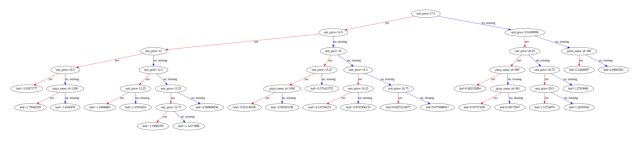

In [42]:
# Set the size of the figure
plt.figure(figsize=(50, 50))
xgb.plot_tree(xgb_reg,num_trees=0)
plt.show()

**Second tree plotted with XGBoost algorithm.**


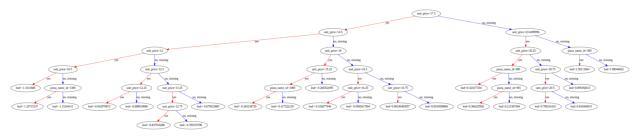

In [43]:
xgb.plot_tree(xgb_reg,num_trees=1)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()

# **Using AutoML to find the best model.**


In [3]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [4]:
# Import libraries
# Use pip install or conda install if missing a library
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [5]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6
run_time=222
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [6]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:44792..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpnixblg7n
  JVM stdout: /tmp/tmpnixblg7n/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpnixblg7n/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:44792
Connecting to H2O server at http://127.0.0.1:44792 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_l0cng4
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:44792
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [10]:
data = h2o.import_file('/content/label_encoded_dataset.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [11]:
data.head()

pizza_name_id    quantity    order_date    order_time    unit_price    total_price    pizza_size    pizza_category    pizza_ingredients    pizza_name
---------------  ----------  ------------  ------------  ------------  -------------  ------------  ----------------  -------------------  ------------
           1201           1             4            11         13.25          13.25             1                 1                 2370            12
            701           1             4            11         16             16                1                 1                 2416             7
            800           1             4            11         18.5           18.5              0                 3                 1359             8
           1400           1             4            11         20.75          20.75             0                 2                 1849            14
           1701           1             4            11         16             16                1                 3                 1456            17
           3000           1             4            11         20.75          20.75             0                 0                 2315            30
           1401           1             4            12         16.5           16.5              1                 2                 1849            14
           2200           1             4            12         20.75          20.75             0                 2                 1428            22
           1401           1             4            12         16.5           16.5              1                 2                 1849            14
           1401           1             4            12         16.5           16.5              1                 2                 1849            14
[10 rows x 10 columns]

In [12]:
data.types

{'pizza_name_id': 'int',
 'quantity': 'int',
 'order_date': 'int',
 'order_time': 'int',
 'unit_price': 'real',
 'total_price': 'real',
 'pizza_size': 'int',
 'pizza_category': 'int',
 'pizza_ingredients': 'int',
 'pizza_name': 'int'}

In [13]:
import pandas as pd
import h2o

# Convert H2OFrame to Pandas DataFrame
data_pd = data.as_data_frame()

# Convert 'unit_price' and 'total_price' columns to integer data type
data_pd['unit_price'] = data_pd['unit_price'].astype(int)
data_pd['total_price'] = data_pd['total_price'].astype(int)

# Convert back to H2OFrame
data = h2o.H2OFrame(data_pd)

# Check the data types after conversion
print(data.types)

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
{'pizza_name_id': 'int', 'quantity': 'int', 'order_date': 'int', 'order_time': 'int', 'unit_price': 'int', 'total_price': 'int', 'pizza_size': 'int', 'pizza_category': 'int', 'pizza_ingredients': 'int', 'pizza_name': 'int'}


In [14]:
# Assuming 'data' is an H2OFrame object
data['total_price'] = data['total_price'].asfactor()

# Check if the column is now a factor
print(data['total_price'].isfactor())

[True]


In [15]:
data.describe()

Rows:48620
Cols:10

pizza_name_id       quantity             order_date          order_time          unit_price         total_price    pizza_size          pizza_category      pizza_ingredients    pizza_name
-------  ------------------  -------------------  ------------------  ------------------  -----------------  -------------  ------------------  ------------------  -------------------  -----------------
type     int                 int                  int                 int                 int                enum           int                 int                 int                  int
mins     0.0                 1.0                  0.0                 9.0                 9.0                               0.0                 0.0                 480.0                0.0
mean     1552.2439942410474  1.0196215549156642   2.9343685726038458  15.911805841217559  16.03730974907454                 0.9338338132455783  1.4907445495680738  1704.1092554504385   15.51310160427802
maxs     3102.0              4.0                  6.0                 23.0                35.0                              4.0                 3.0                 2416.0               31.0
sigma    932.9470489957058   0.14307700932472173  2.033692479505859   3.149836090733785   3.514366913448895                 0.8469810004831723  1.0797108029426314  517.7571334125616    9.330178767818236
zeros    967                 0                    8106                0                   0                                 18526               10815               0                    2372
missing  0                   0                    0                   0                   0                  0              0                   0                   0                    0
0        1201.0              1.0                  4.0                 11.0                13.0               13             1.0                 1.0                 2370.0               12.0
1        701.0               1.0                  4.0                 11.0                16.0               16             1.0                 1.0                 2416.0               7.0
2        800.0               1.0                  4.0                 11.0                18.0               18             0.0                 3.0                 1359.0               8.0
3        1400.0              1.0                  4.0                 11.0                20.0               20             0.0                 2.0                 1849.0               14.0
4        1701.0              1.0                  4.0                 11.0                16.0               16             1.0                 3.0                 1456.0               17.0
5        3000.0              1.0                  4.0                 11.0                20.0               20             0.0                 0.0                 2315.0               30.0
6        1401.0              1.0                  4.0                 12.0                16.0               16             1.0                 2.0                 1849.0               14.0
7        2200.0              1.0                  4.0                 12.0                20.0               20             0.0                 2.0                 1428.0               22.0
8        1401.0              1.0                  4.0                 12.0                16.0               16             1.0                 2.0                 1849.0               14.0
9        1401.0              1.0                  4.0                 12.0                16.0               16             1.0                 2.0                 1849.0               14.0
[48620 rows x 10 columns]

In [16]:
data.shape

(48620, 10)

In [17]:
# Create a 80/20 train/test split
pct_rows=0.80
data_train, data_test = data.split_frame([pct_rows])

In [18]:
print(data_train.shape)
print(data_test.shape)

(38927, 10)
(9693, 10)


In [19]:
# Set the features and target
X=data.columns
print(X)

['pizza_name_id', 'quantity', 'order_date', 'order_time', 'unit_price', 'total_price', 'pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name']


In [20]:
# Set target and predictor variables
y ='total_price'
#y_numeric ='churn_bit'
X.remove(y)
#X.remove(y_numeric)
print(X)

['pizza_name_id', 'quantity', 'order_date', 'order_time', 'unit_price', 'pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name']


In [21]:
# Set up AutoML
auml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [22]:
auml.train(x=X,y=y,training_frame=data_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20240403_32608


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    1                  35                          4273                   2            8            3.45714       3             14            5.08571

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.25347619557957046
RMSE: 0.5034641949330364
LogLoss: 0.7144899972865922
Mean Per-Class Error: 0.505882137463087
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
9      10     11     12      13     14     15     16       17      18      19    20       21     22    23     24     25     26    29    30    32    33     35    36    37    40    41     47    48    49    50    51    55    61    62    83    Error                 Rate
-----  -----  -----  ------  -----  -----  -----  -------  ------  ------  ----  -------  -----  ----  -----  -----  -----  ----  ----  ----  ----  -----  ----  ----  ----  ----  -----  ----  ----  ----  ----  ----  ----  ----  ----  ----  --------------------  ------------
580.0  0.0    0.0    0.0     0.0    0.0    0.0    0.0      0.0     0.0     0.0   0.0      0.0    0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0                   0 / 580
0.0    780.0  0.0    0.0     0.0    0.0    0.0    0.0      0.0     0.0     0.0   0.0      0.0    0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0                   0 / 780
0.0    0.0    447.0  0.0     0.0    0.0    0.0    0.0      0.0     0.0     0.0   0.0      0.0    0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0                   0 / 447
0.0    0.0    0.0    9626.0  0.0    0.0    0.0    0.0      0.0     0.0     0.0   0.0      0.0    0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0                   0 / 9,626
0.0    0.0    0.0    0.0     367.0  0.0    0.0    0.0      0.0     0.0     0.0   0.0      0.0    0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0                   0 / 367
0.0    0.0    0.0    0.0     0.0    744.0  0.0    0.0      0.0     0.0     0.0   0.0      0.0    0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0                   0 / 744
0.0    0.0    0.0    0.0     0.0    0.0    555.0  0.0      0.0     0.0     0.0   0.0      0.0    0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0                   0 / 555
0.0    0.0    0.0    0.0     0.0    0.0    0.0    11003.0  0.0     0.0     0.0   0.0      0.0    0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0                   0 / 11,003
0.0    0.0    0.0    0.0     0.0    0.0    0.0    0.0      1272.0  0.0     0.0   0.0      0.0    0.0  

In [23]:
print(auml.leaderboard)

model_id                                                  mean_per_class_error    logloss      rmse        mse
GBM_1_AutoML_1_20240403_32608                                         0.505937  0.622001   0.455922  0.207865
XGBoost_1_AutoML_1_20240403_32608                                     0.513592  0.0595835  0.10226   0.0104572
StackedEnsemble_BestOfFamily_1_AutoML_1_20240403_32608                0.541062  0.179161   0.142421  0.0202837
GLM_1_AutoML_1_20240403_32608                                         0.932863  1.86517    0.782888  0.612913
[4 rows x 5 columns]



In [24]:
model_index=0
glm_index=0
glm_model=''
auml_leaderboard_df=auml.leaderboard.as_data_frame()
models_dict={}
for m in auml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in auml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'GBM_1_AutoML_1_20240403_32608': 0, 'GLM_1_AutoML_1_20240403_32608': 3}

In [25]:
print(model_index)
best_model = h2o.get_model(auml.leaderboard[model_index,'model_id'])

0


In [26]:
best_model.algo

'gbm'

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_1_AutoML_1_20240403_32608

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
9      10     11     12      13     14     15     16       17      18      19    20       21     22    23     24     25     26    29    30    32    33     35    36    37    40    41     47    48    49    50    51    55    61    62    83    Error                 Rate
-----  -----  -----  ------  -----  -----  -----  -------  ------  ------  ----  -------  -----  ----  -----  -----  -----  ----  ----  ----  ----  -----  ----  ----  ----  ----  -----  ----  ----  ----  ----  ----  ----  ----  ----  ----  --------------------  ------------
580.0  0.0    0.0    0.0     0.0    0.0    0.0    0.0      0.0     0.0     0.0   0.0      0.0    0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0                   0 / 580
0.0    780.0  0.0    0.0     0.0    0.0    0.0    0.0      0.0     0.0     0.0   0.0      0.0    0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0                   0 / 780
0.0    0.0    447.0  0.0     0.0    0.0    0.0    0.0      0.0     0.0     0.0   0.0      0.0    0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0                   0 / 447
0.0    0.0    0.0    9626.0  0.0    0.0    0.0    0.0      0.0     0.0     0.0   0.0      0.0    0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0                   0 / 9,626
0.0    0.0    0.0    0.0     367.0  0.0    0.0    0.0      0.0     0.0     0.0   0.0      0.0    0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0                   0 / 367
0.0    0.0    0.0    0.0     0.0    744.0  0.0    0.0      0.0     0.0     0.0   0.0      0.0    0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0                   0 / 744
0.0    0.0    0.0    0.0     0.0    0.0    555.0  0.0      0.0     0.0     0.0   0.0      0.0    0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0                   0 / 555
0.0    0.0    0.0    0.0     0.0    0.0    0.0    11003.0  0.0     0.0     0.0   0.0      0.0    0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0                   0 / 11,003
0.0    0.0    0.0    0.0     0.0    0.0    0.0    0.0      1272.0  0.0     0.0   0.0      0.0    0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0                   0 / 1,272
0.0    0.0    0.0    0.0     0.0    0.0    0.0    0.0      0.0     1053.0  0.0   0.0      0.0    0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0                   0 / 1,053
---    ---    ---    ---     ---    ---    ---    ---      ---     ---     ---   ---      ---    ---   ---    ---    ---    ---   ---   ---   ---   ---    ---   ---   ---   ---   ---    ---   ---   ---   ---   ---   ---   ---   ---   ---   ---                   ---
0.0    0.0    0.0    0.0     0.0    0.0    0.0    0.0      0.0     0.0     0.0   0.0      0.0    0.0   8.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0                   8 / 8
0.0    0.0    0.0    0.0     0.0    0.0    0.0    0.0      0.0     0.0     0.0   0.0      0.0    0.0   0.0    1.0    0.0    0.0   0.0   0.0 

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

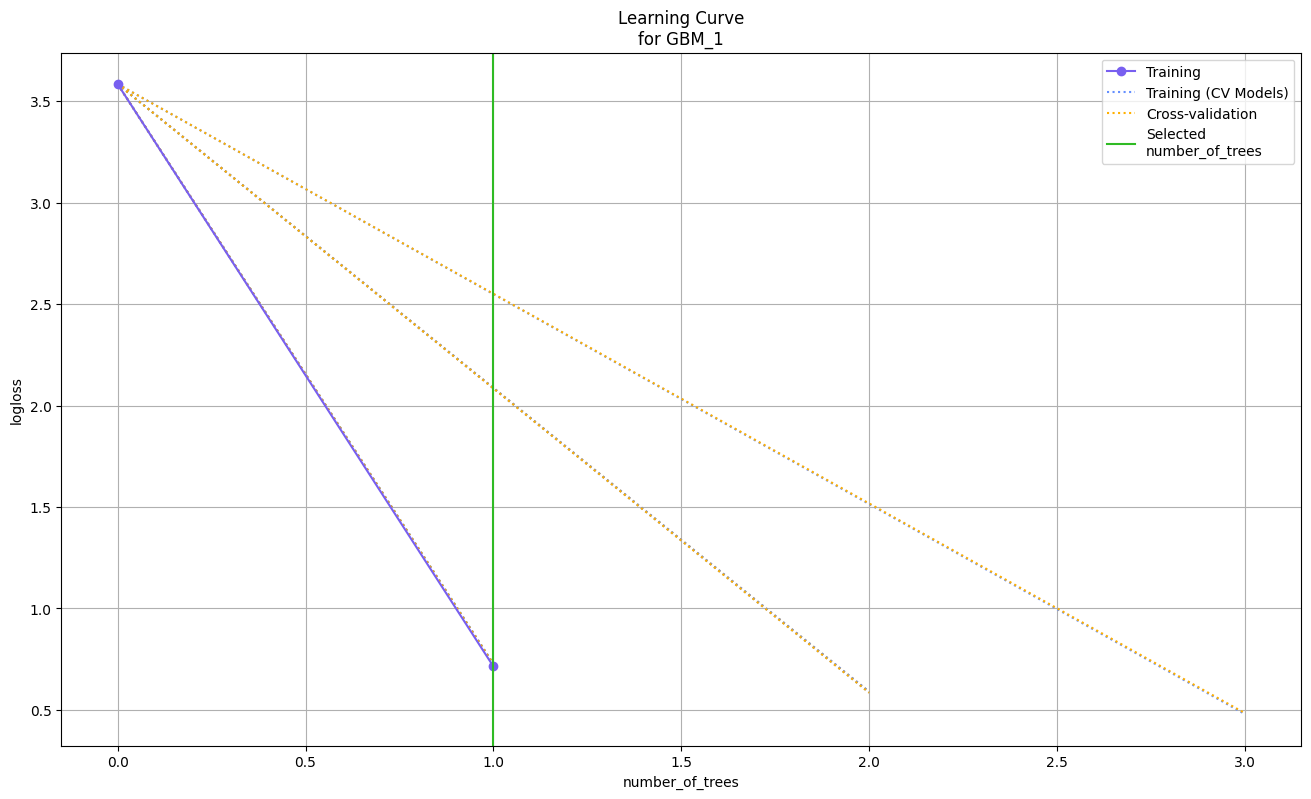

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

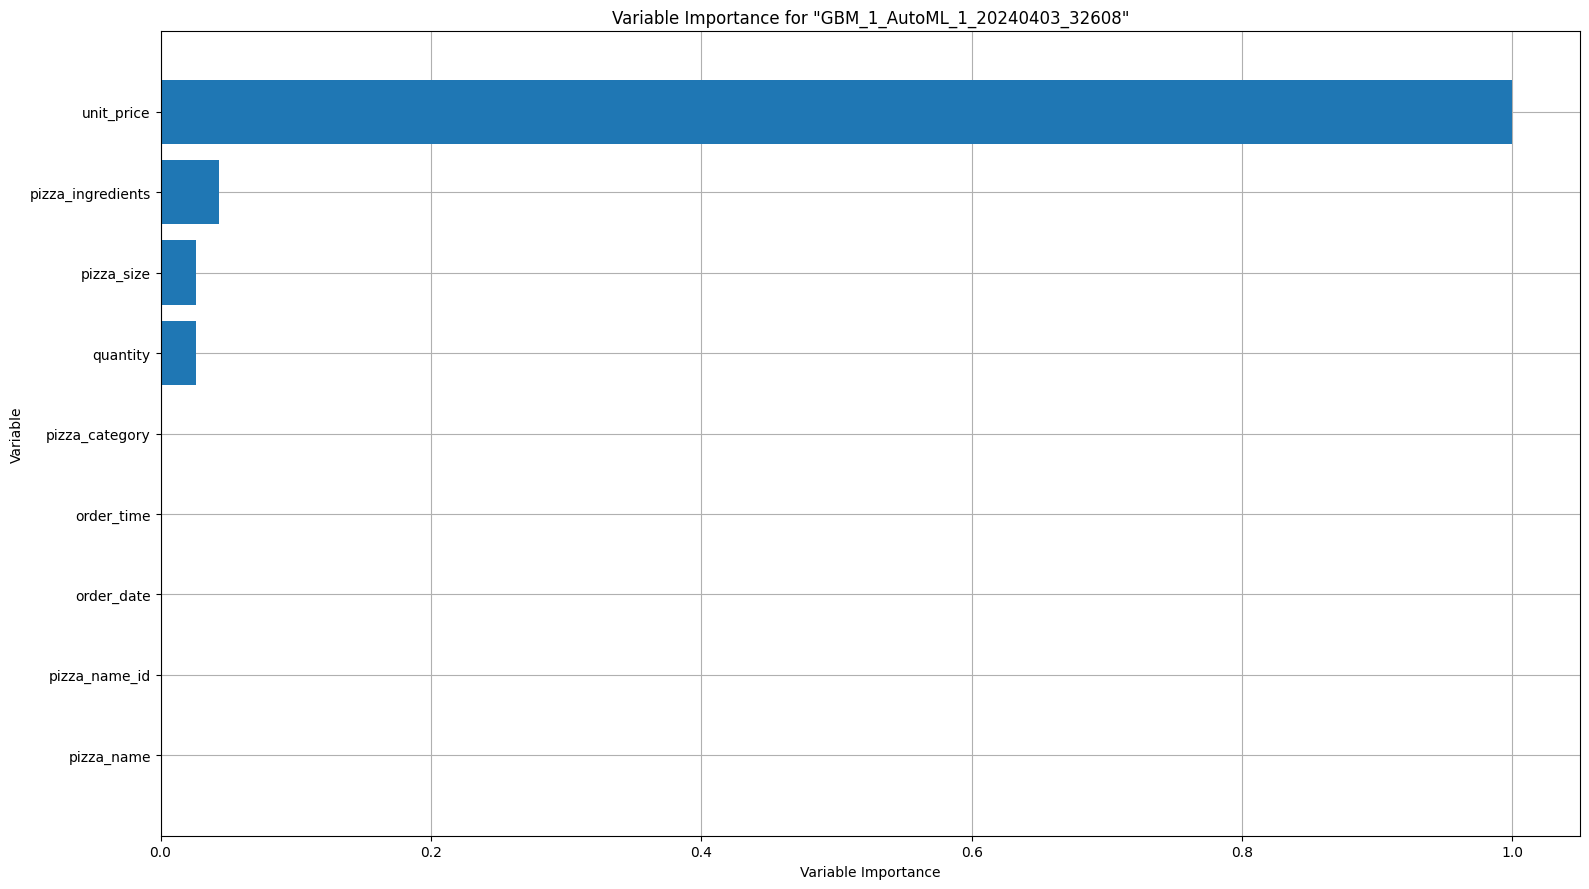

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

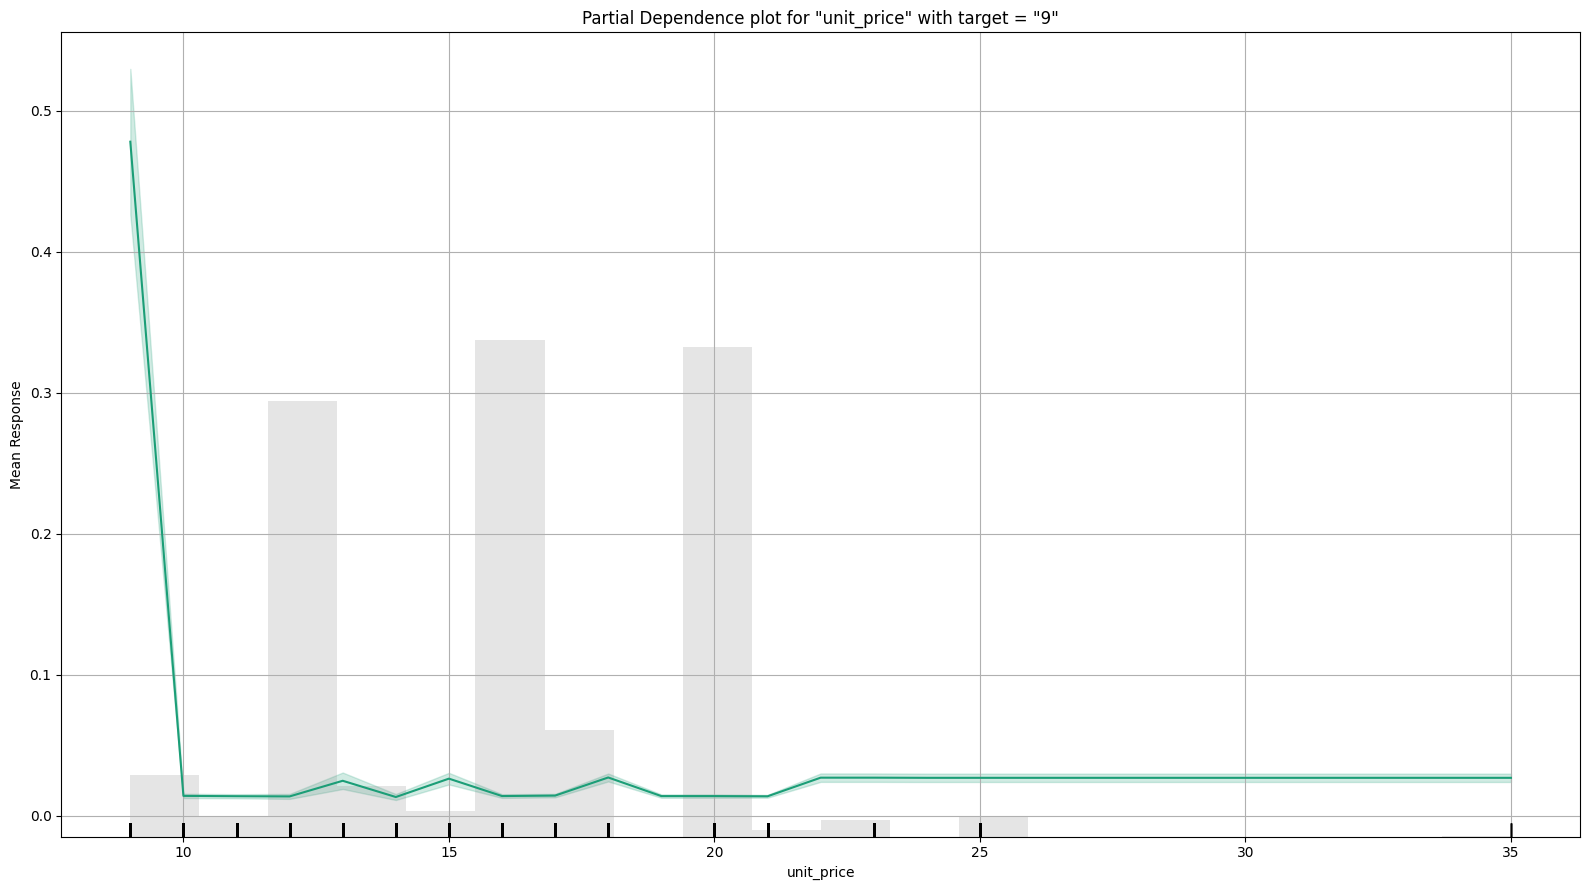

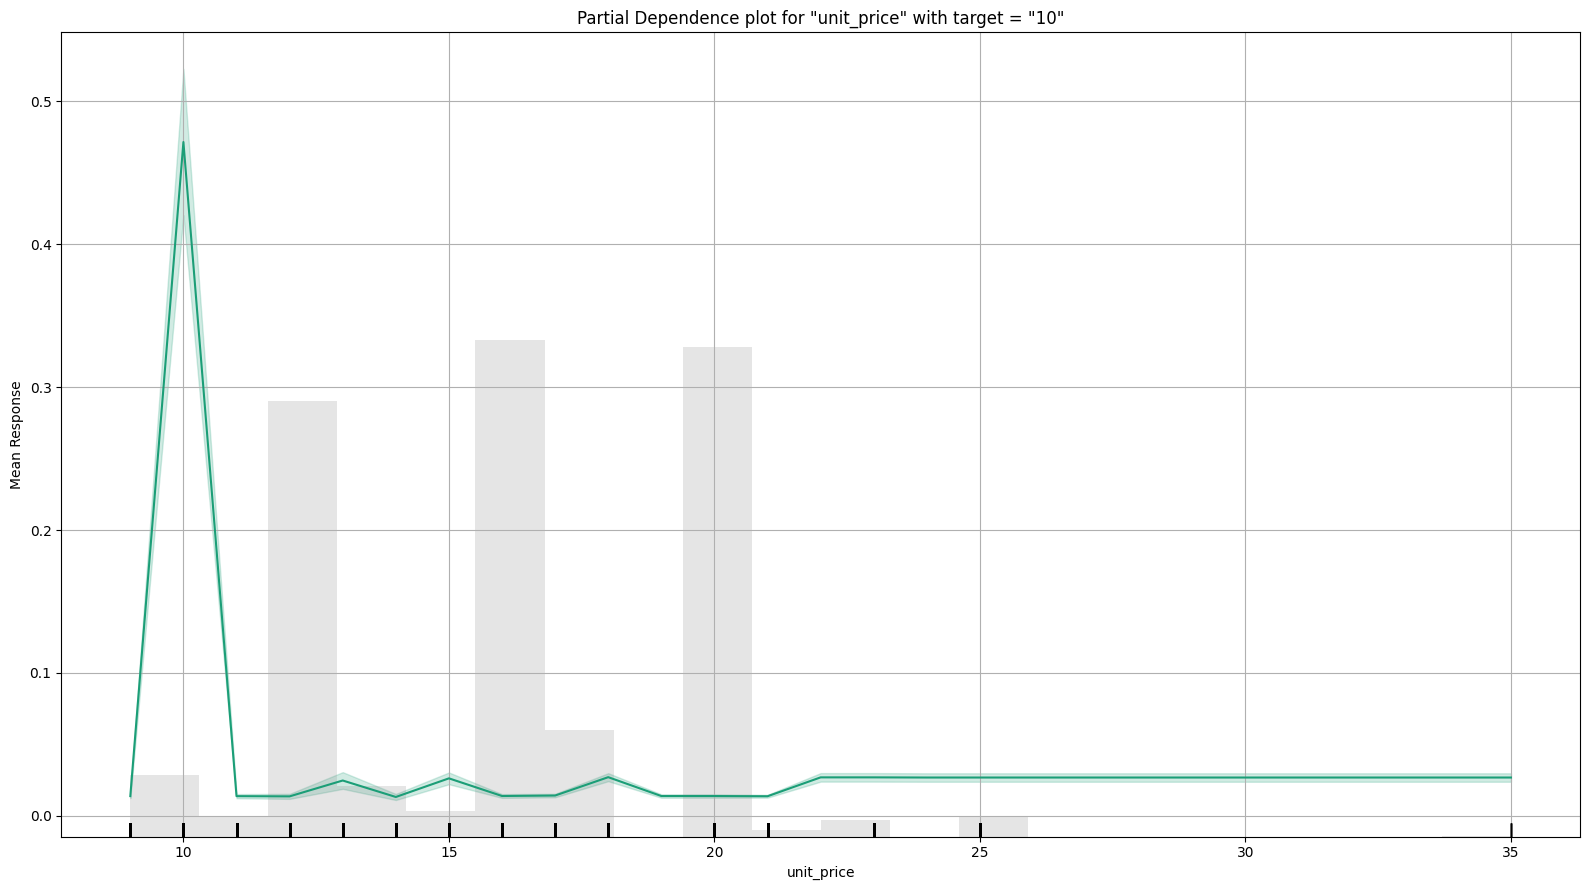

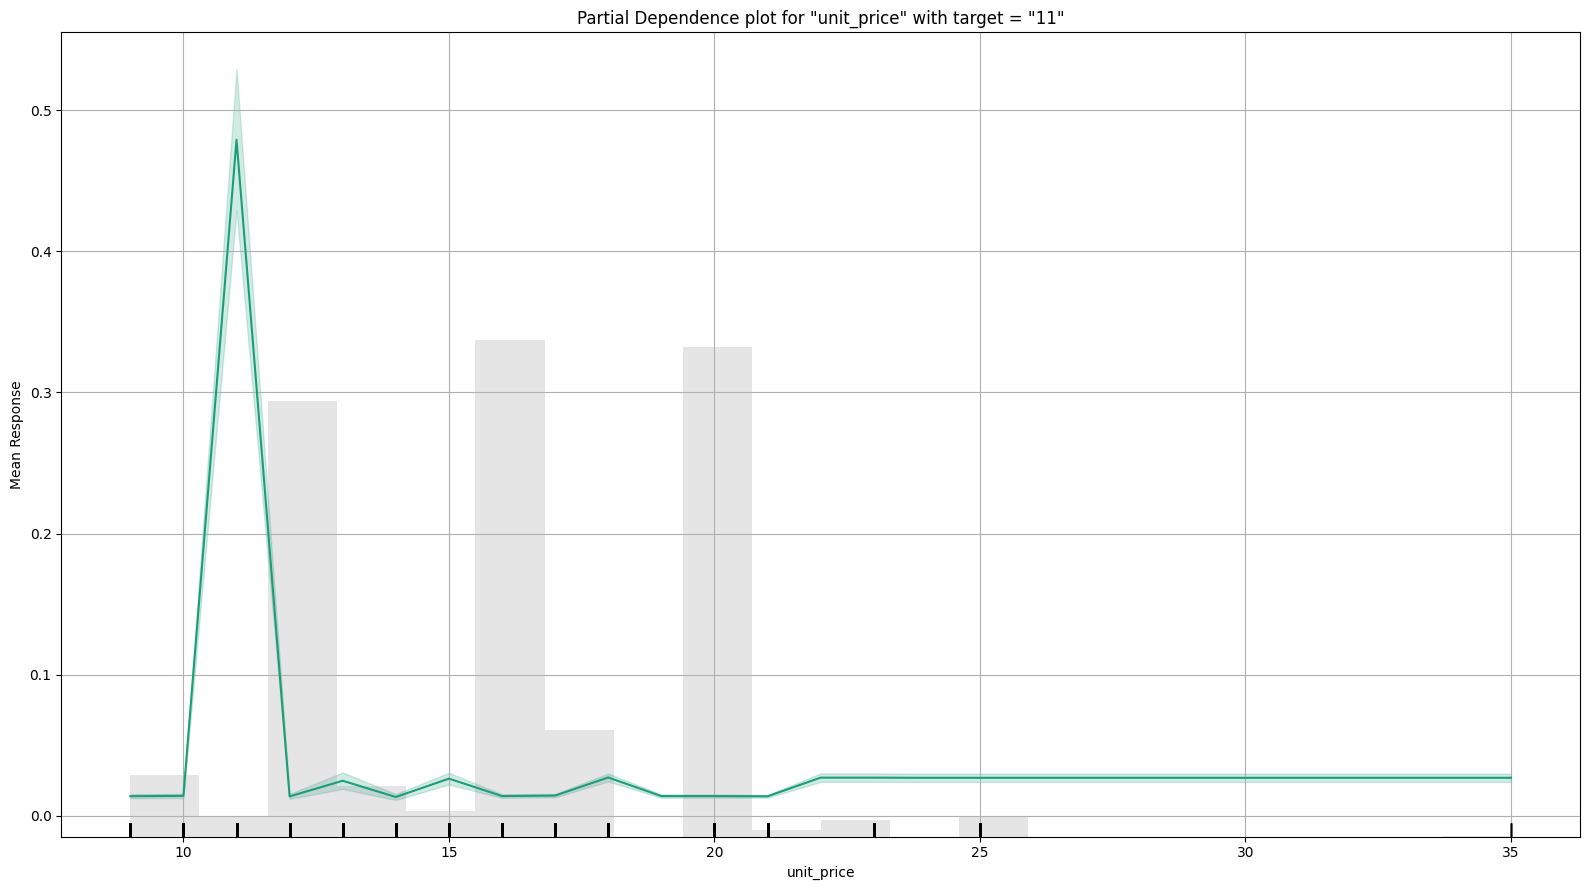

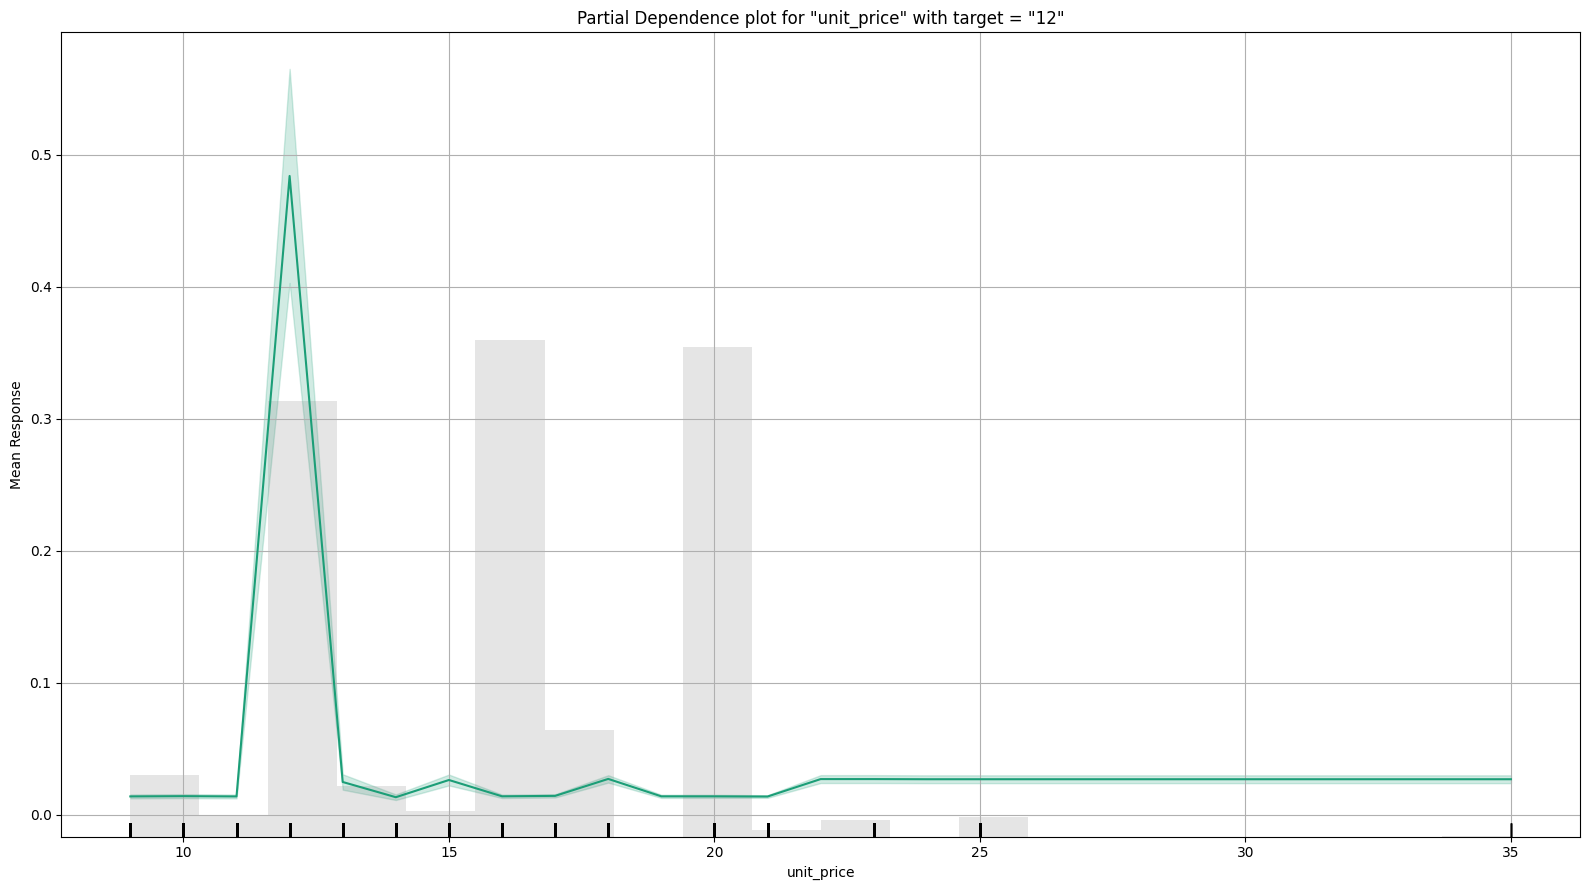

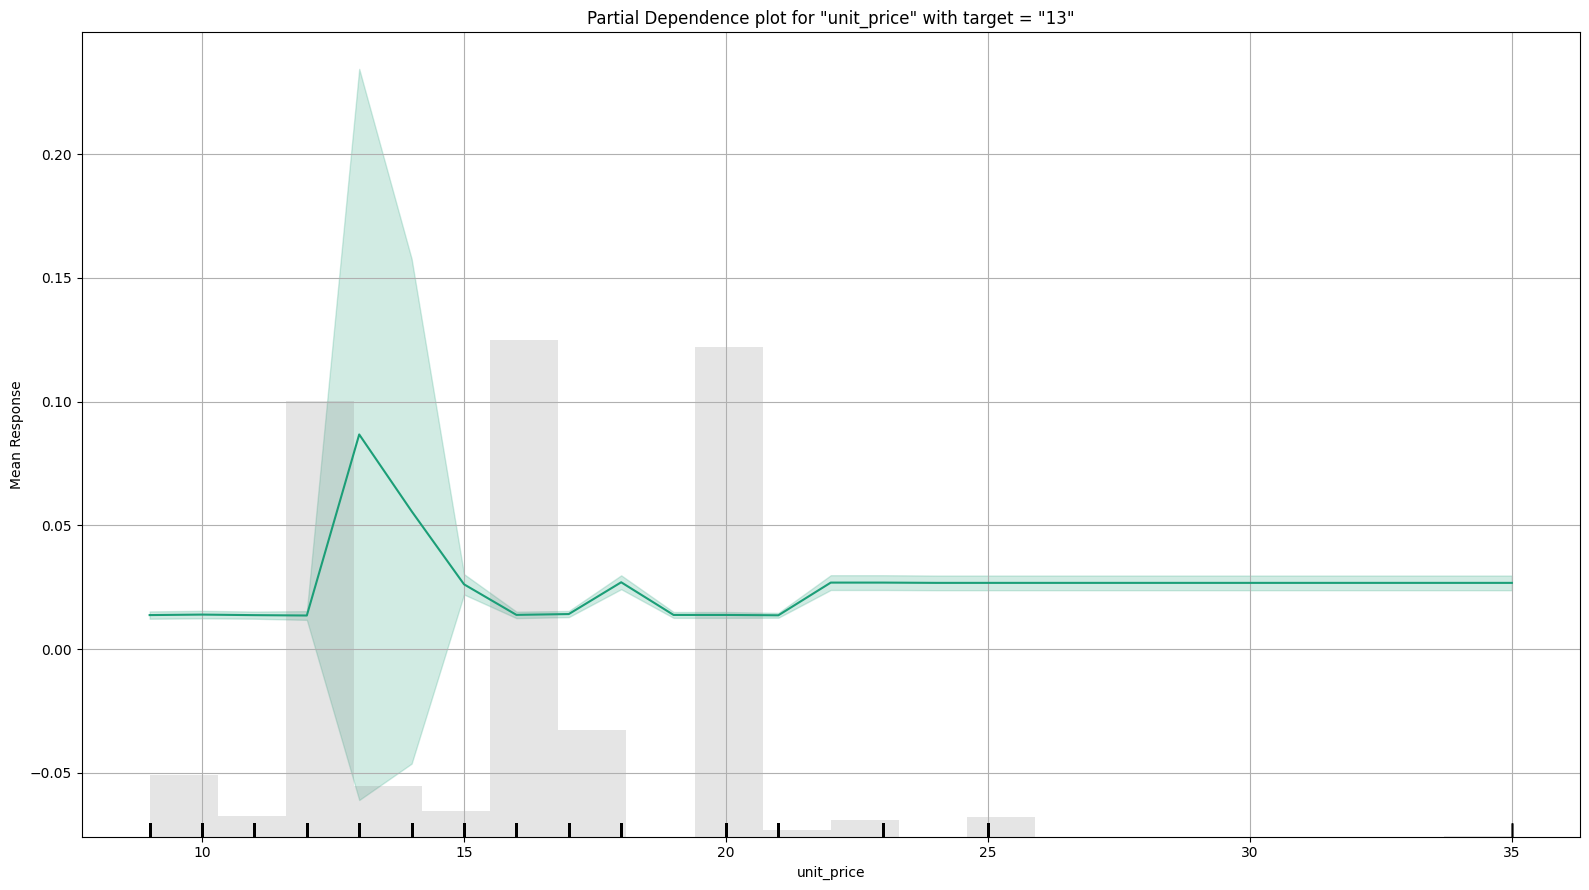

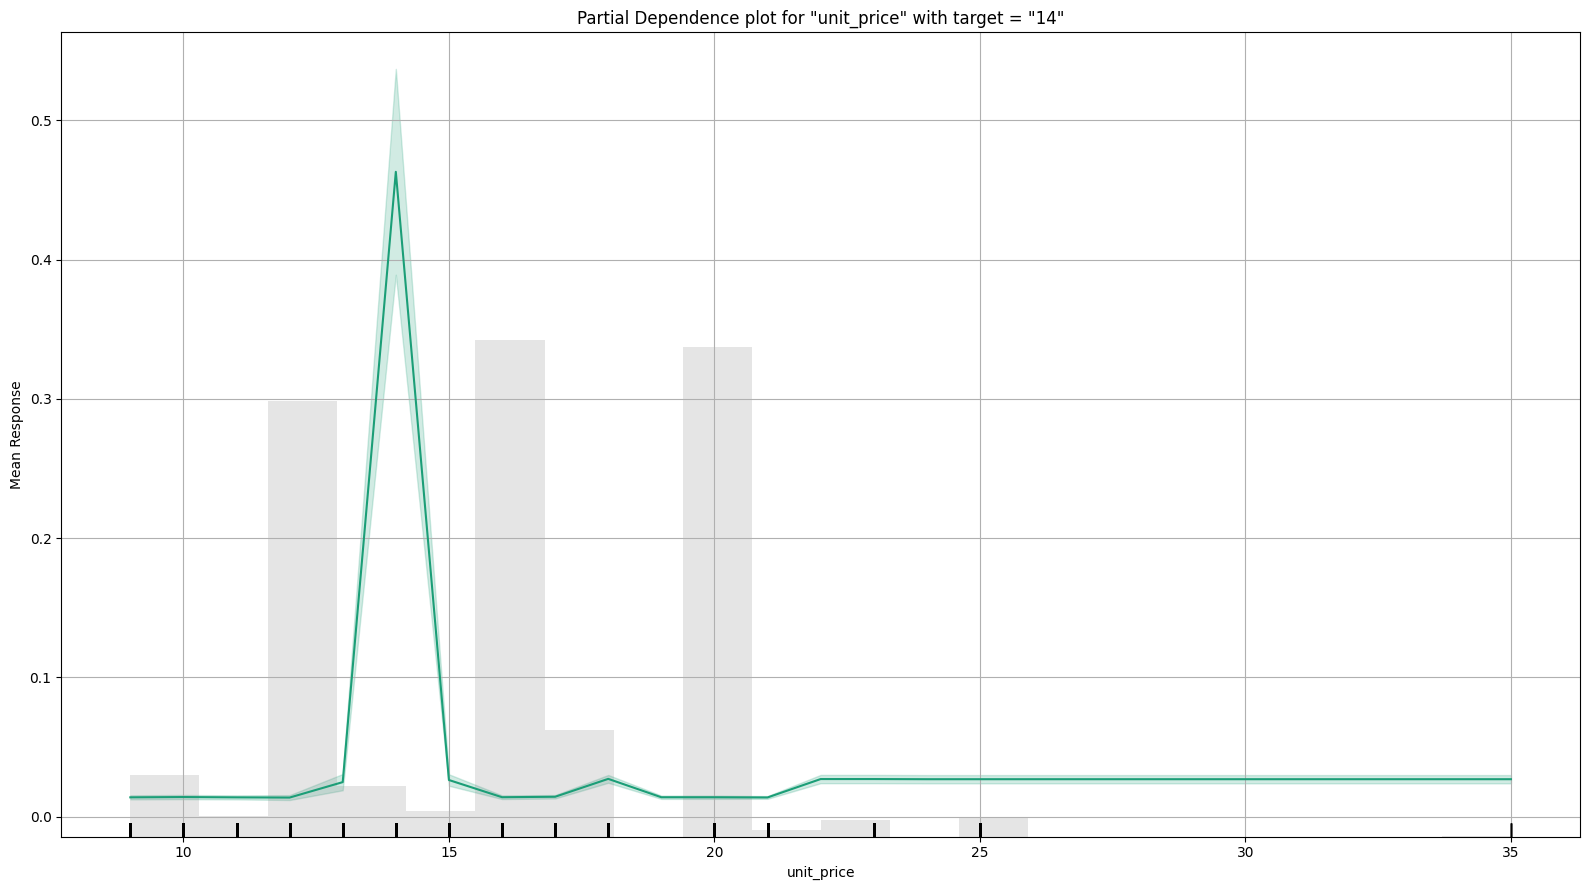

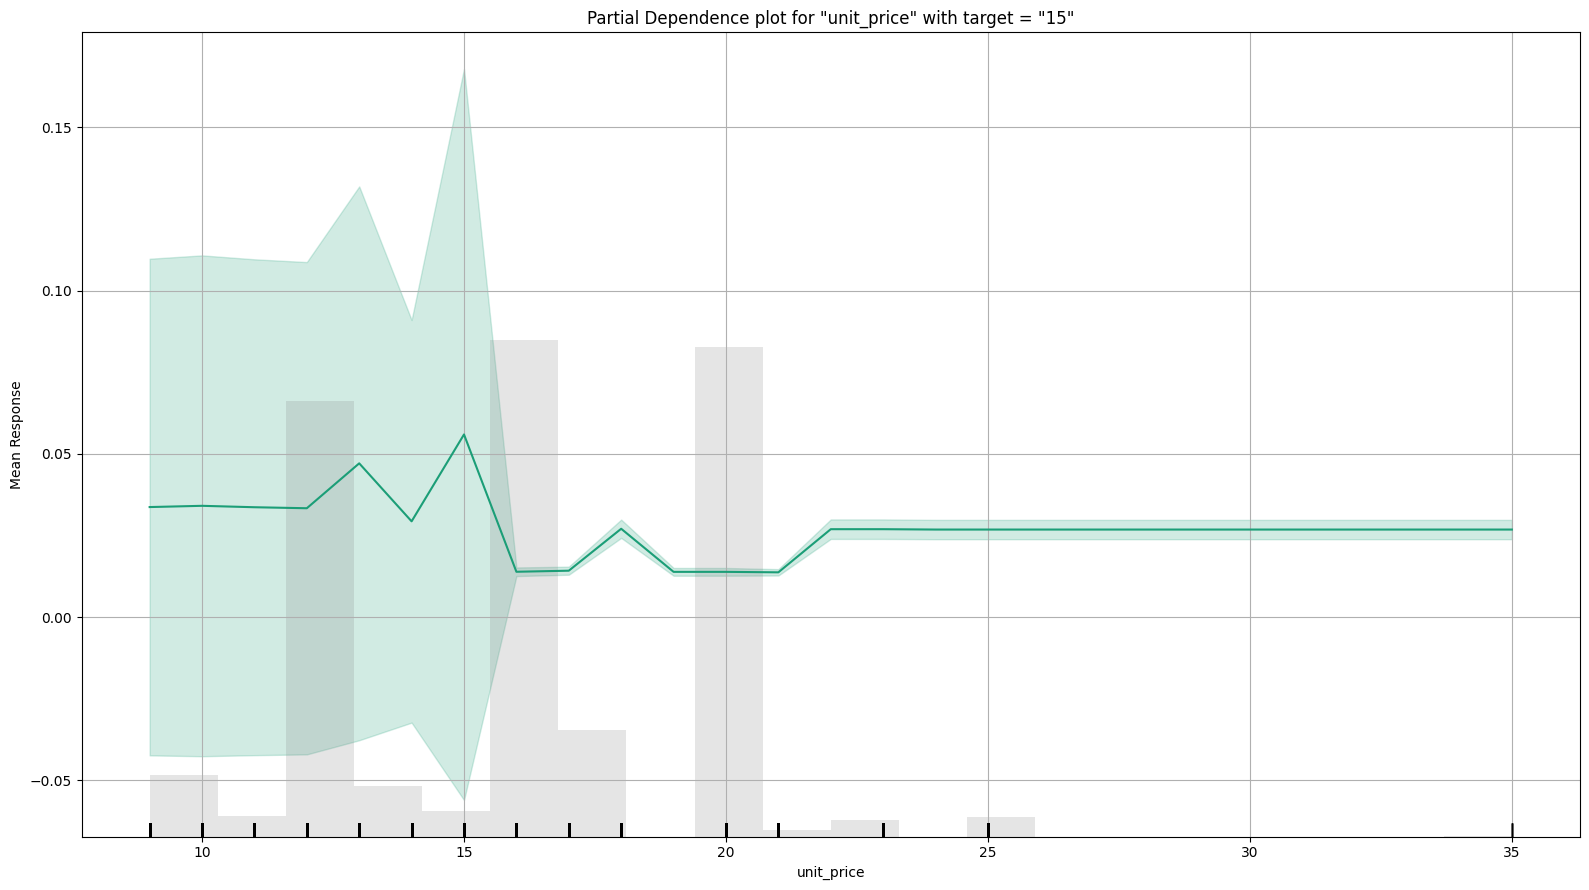

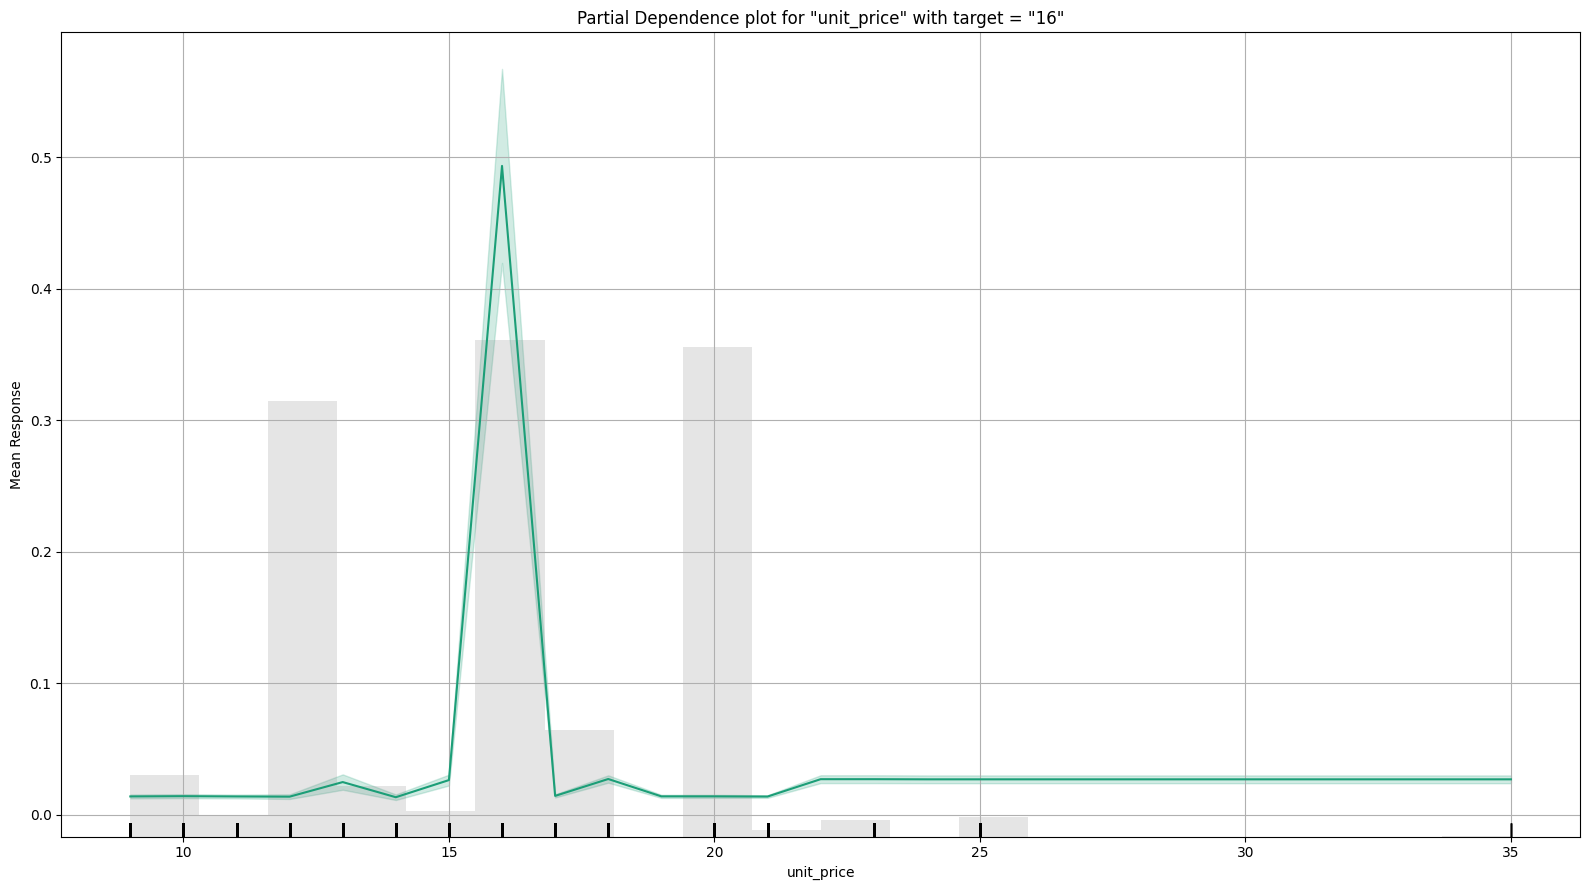

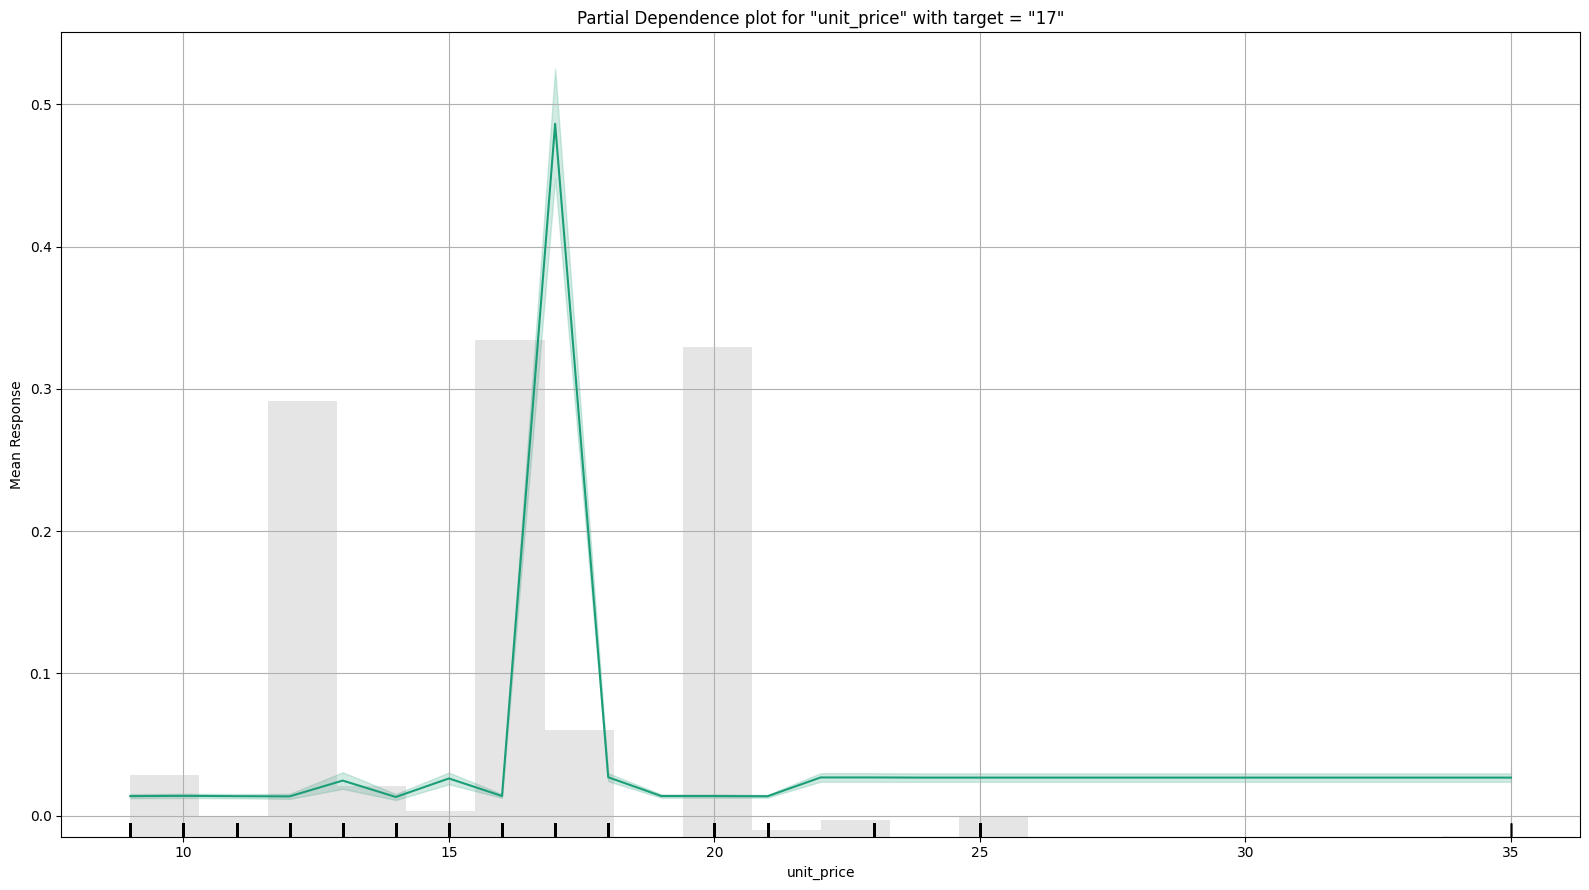

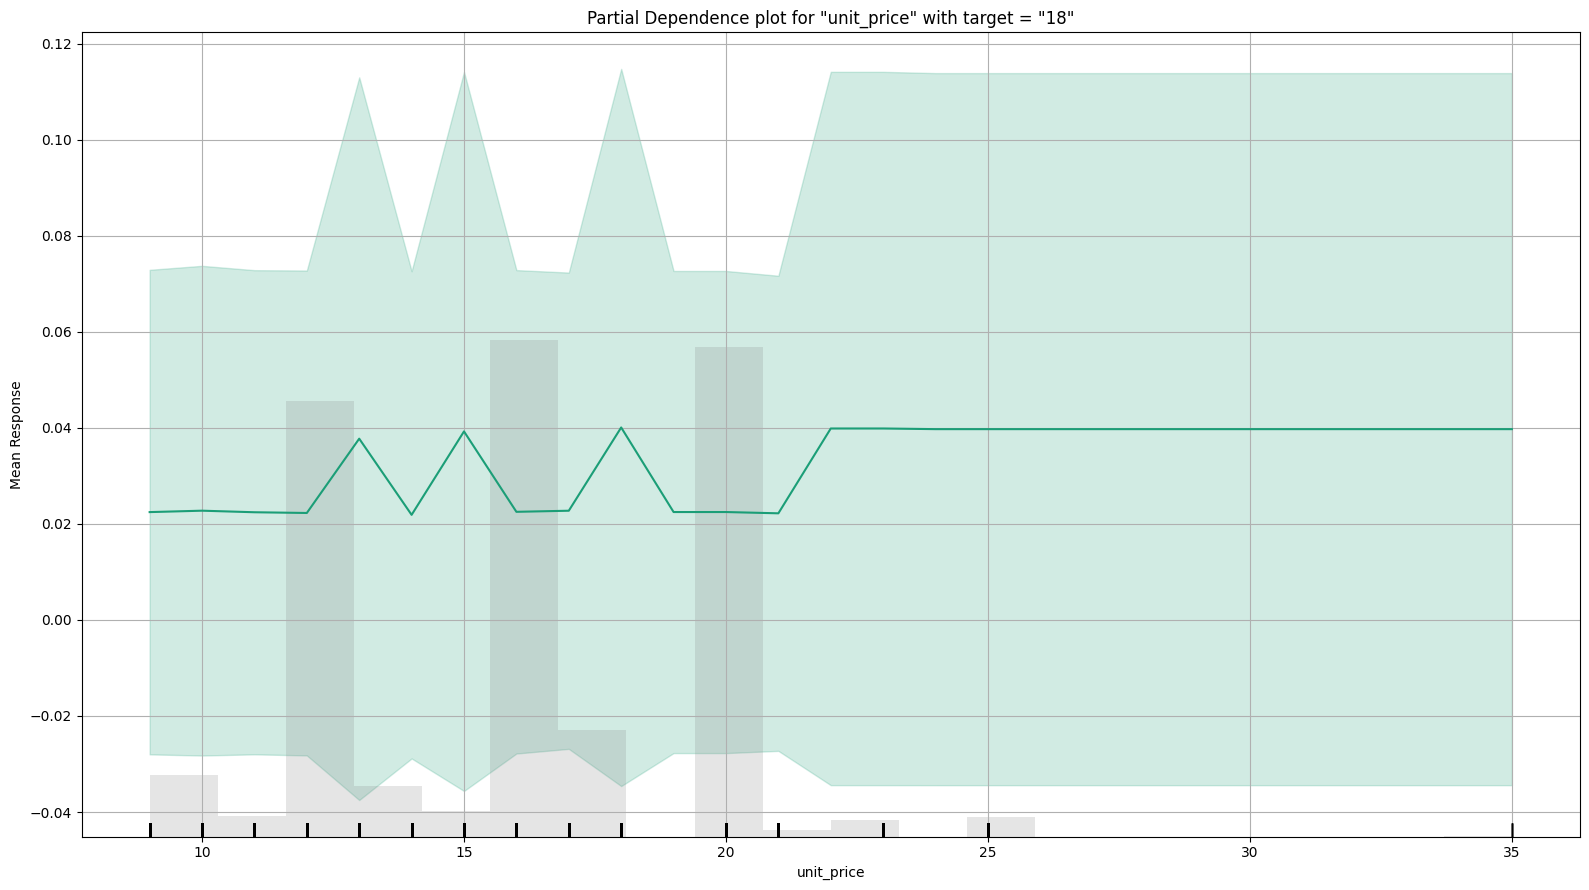

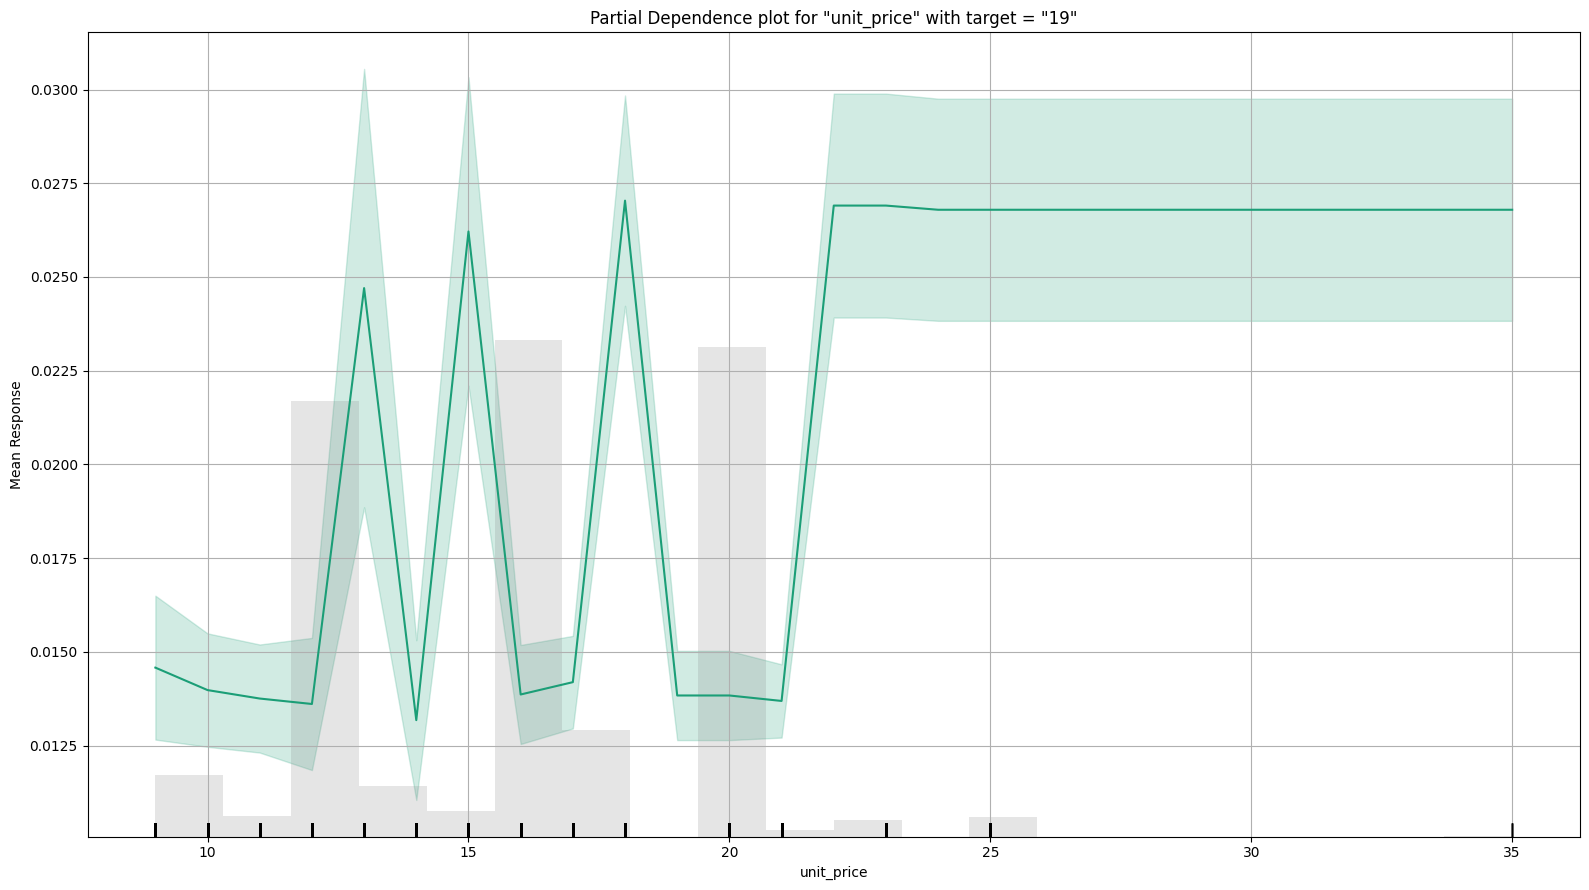

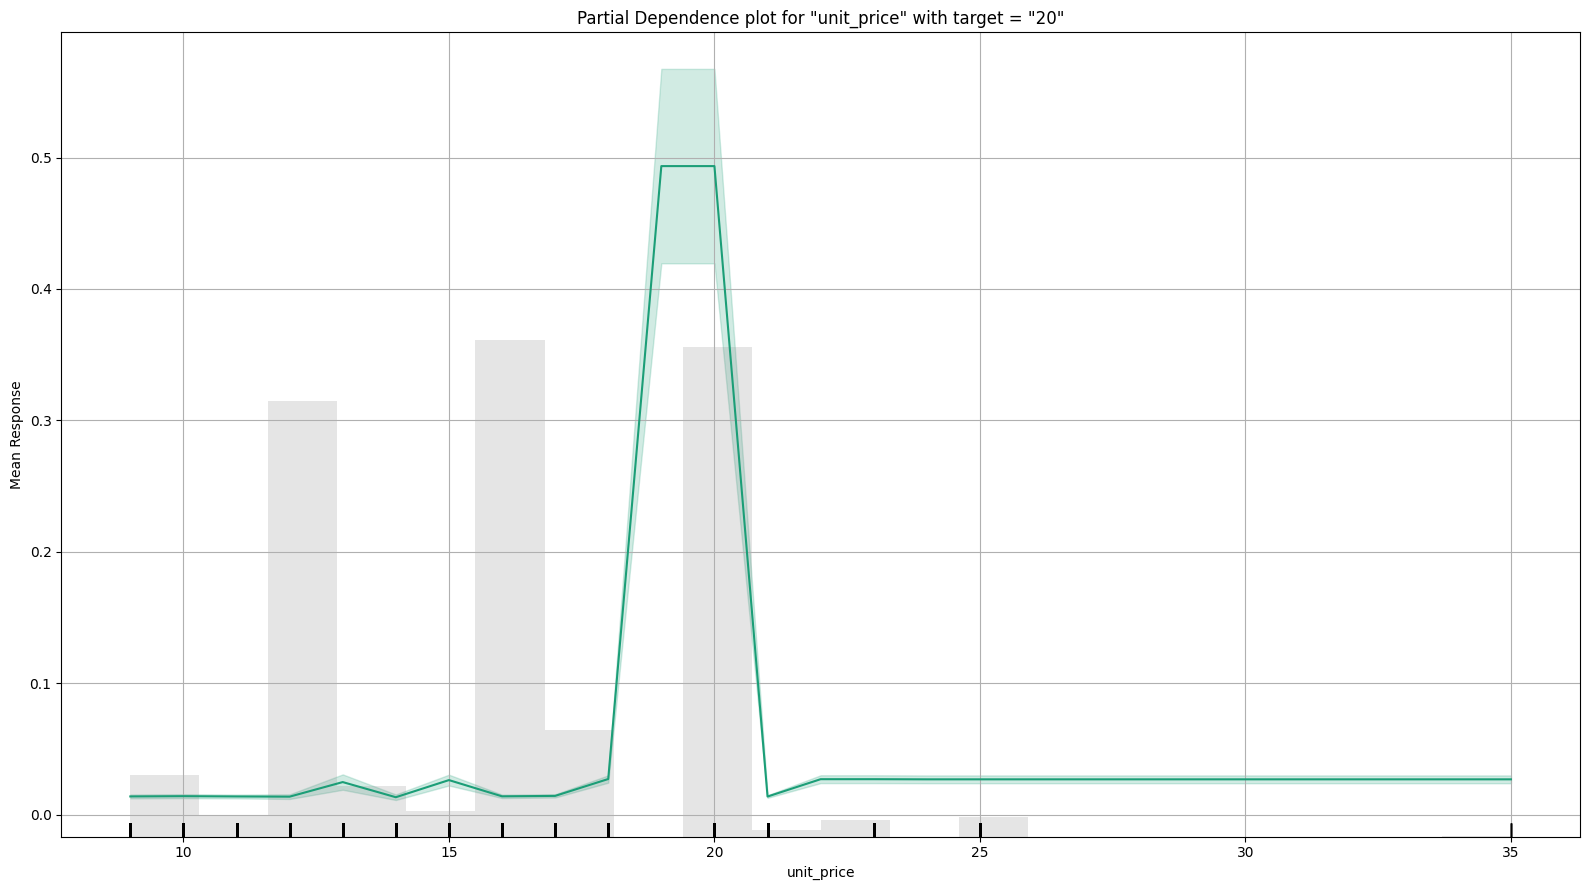

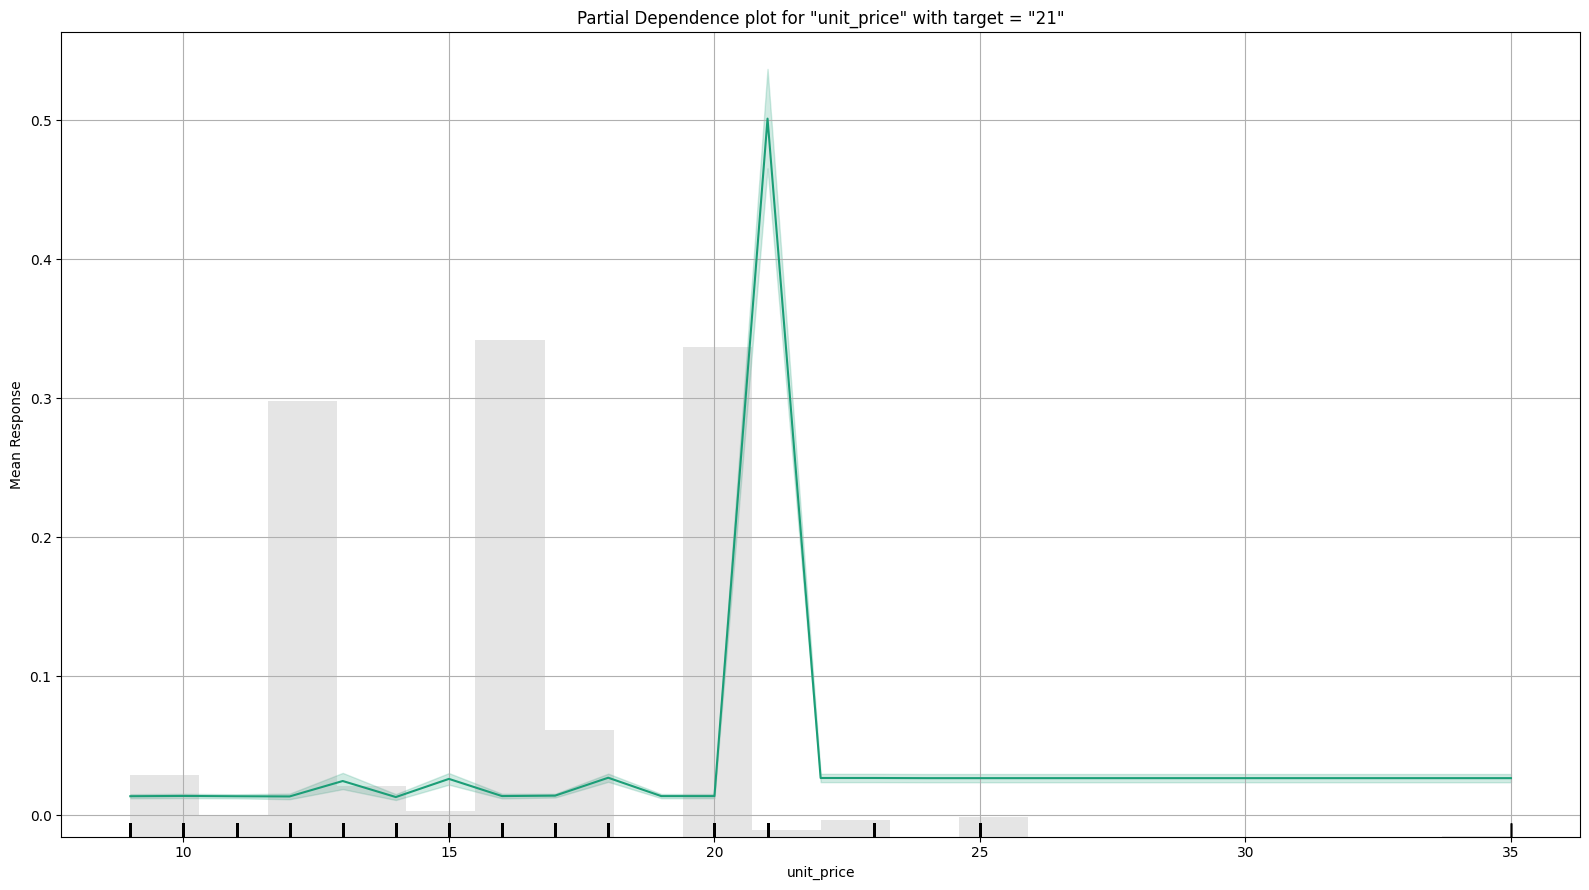

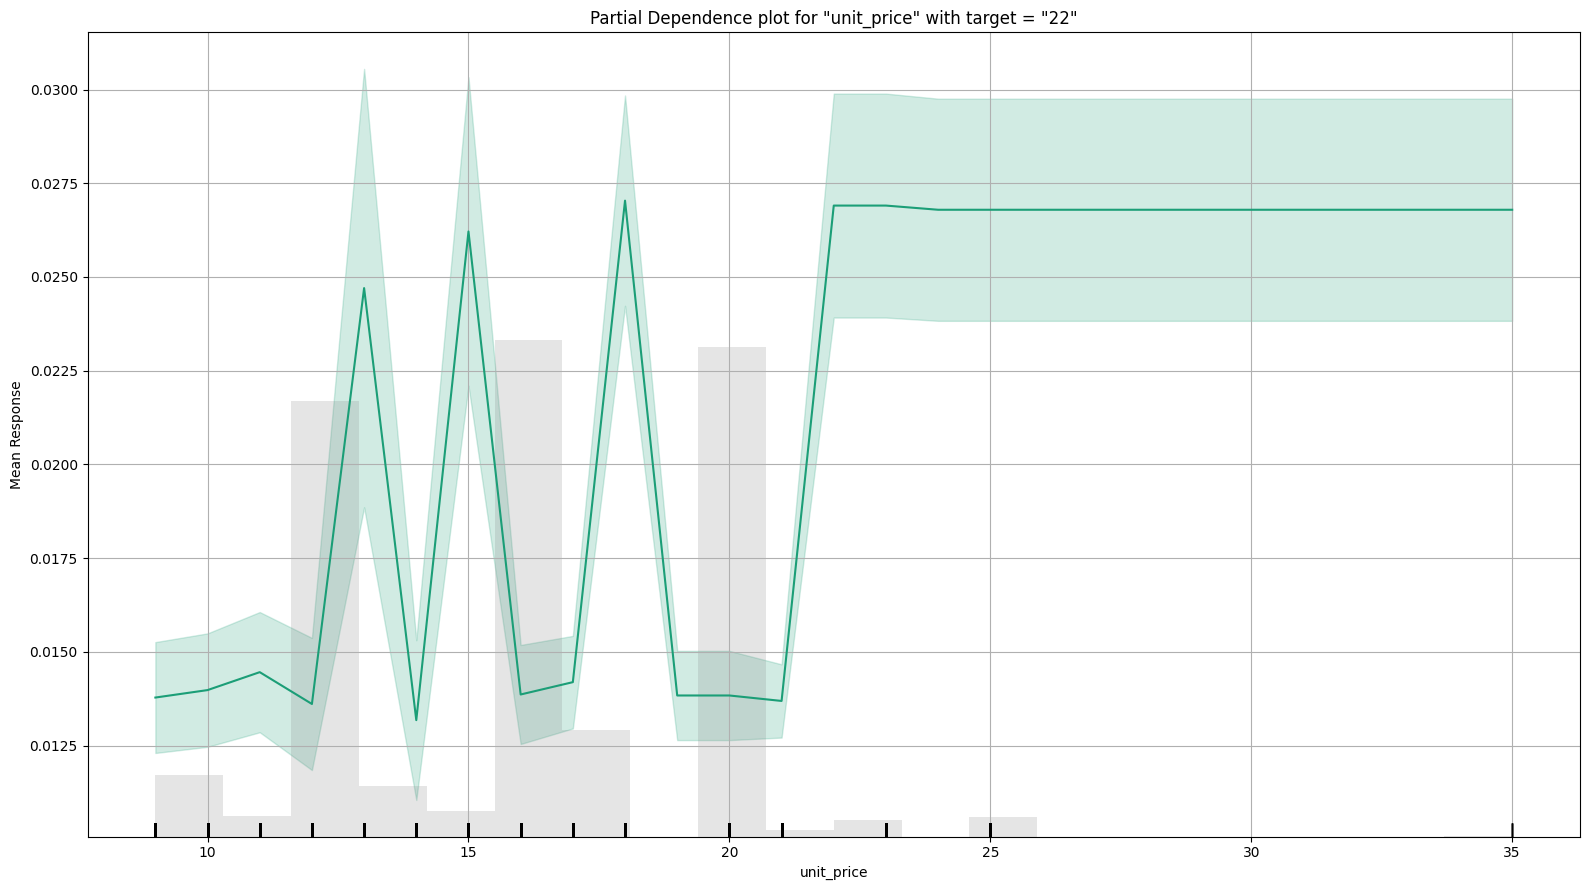

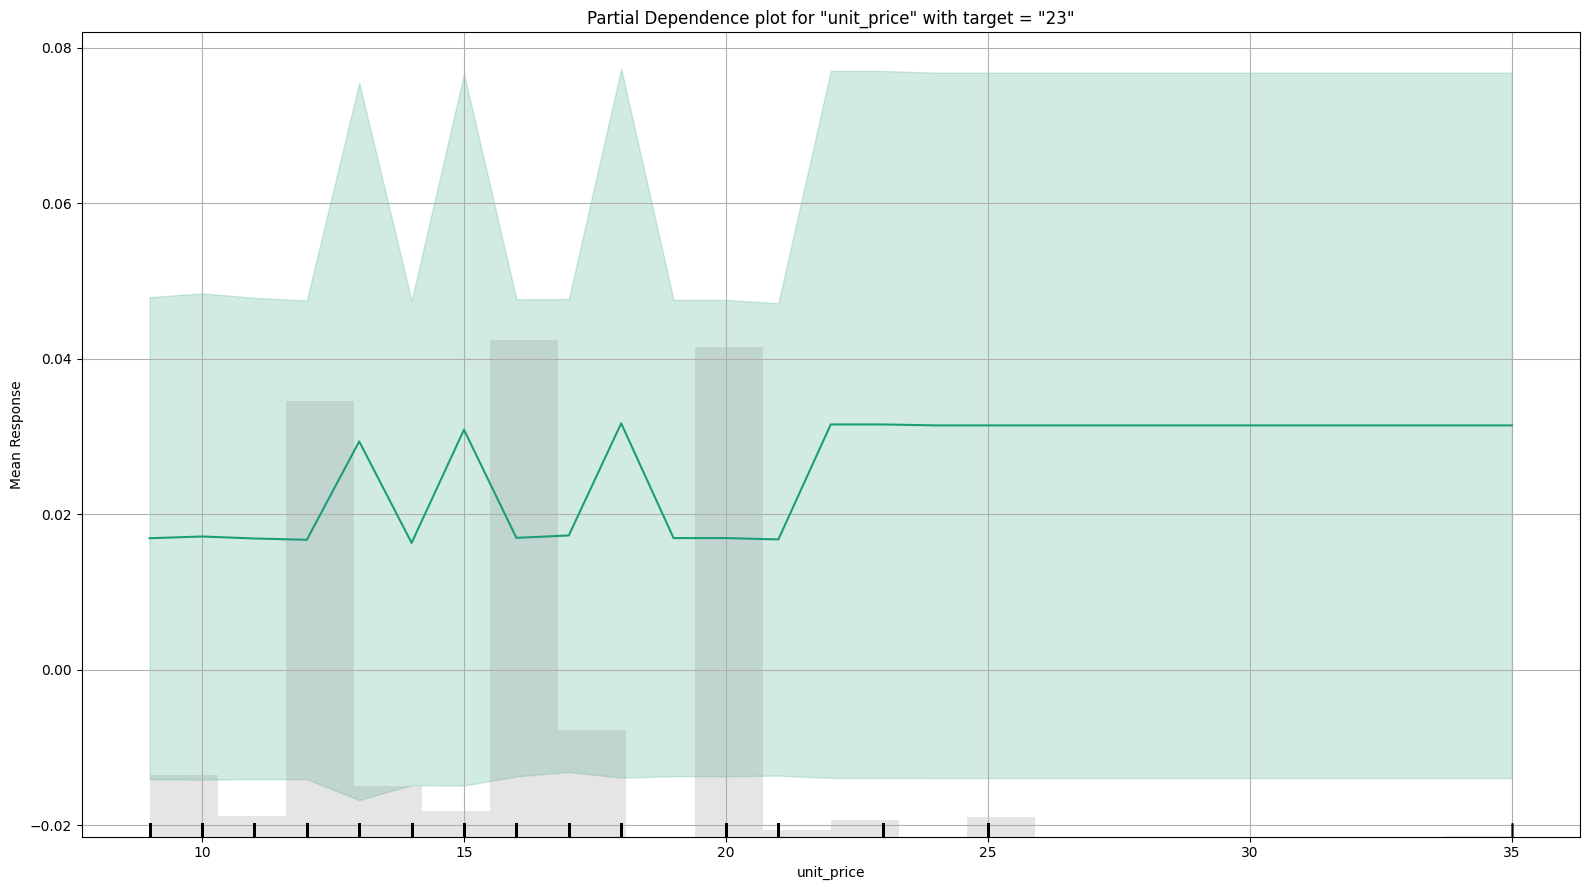

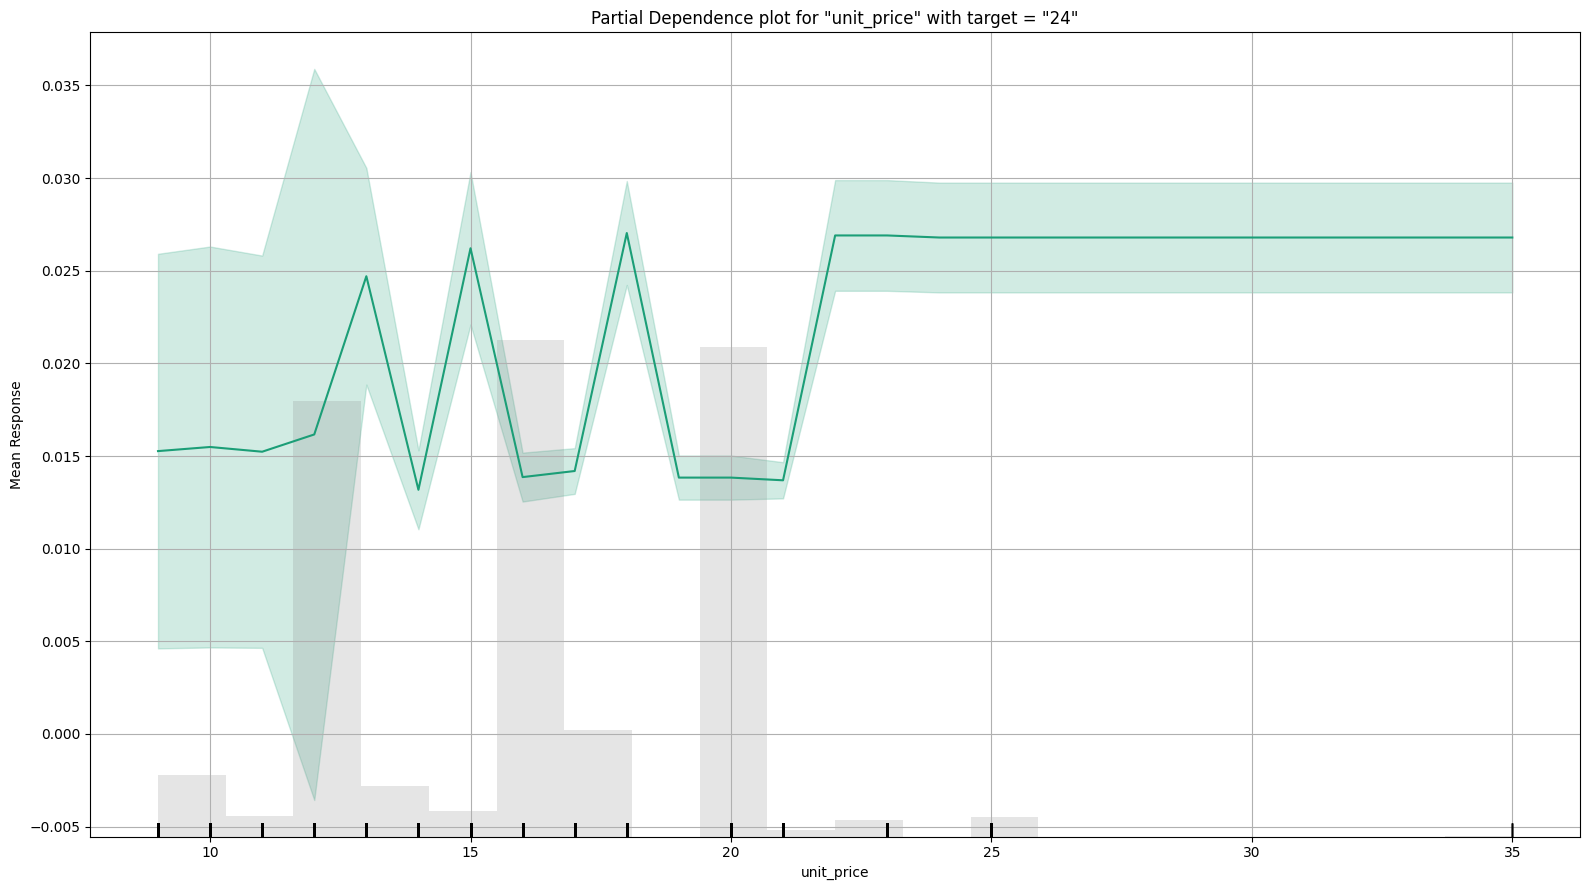

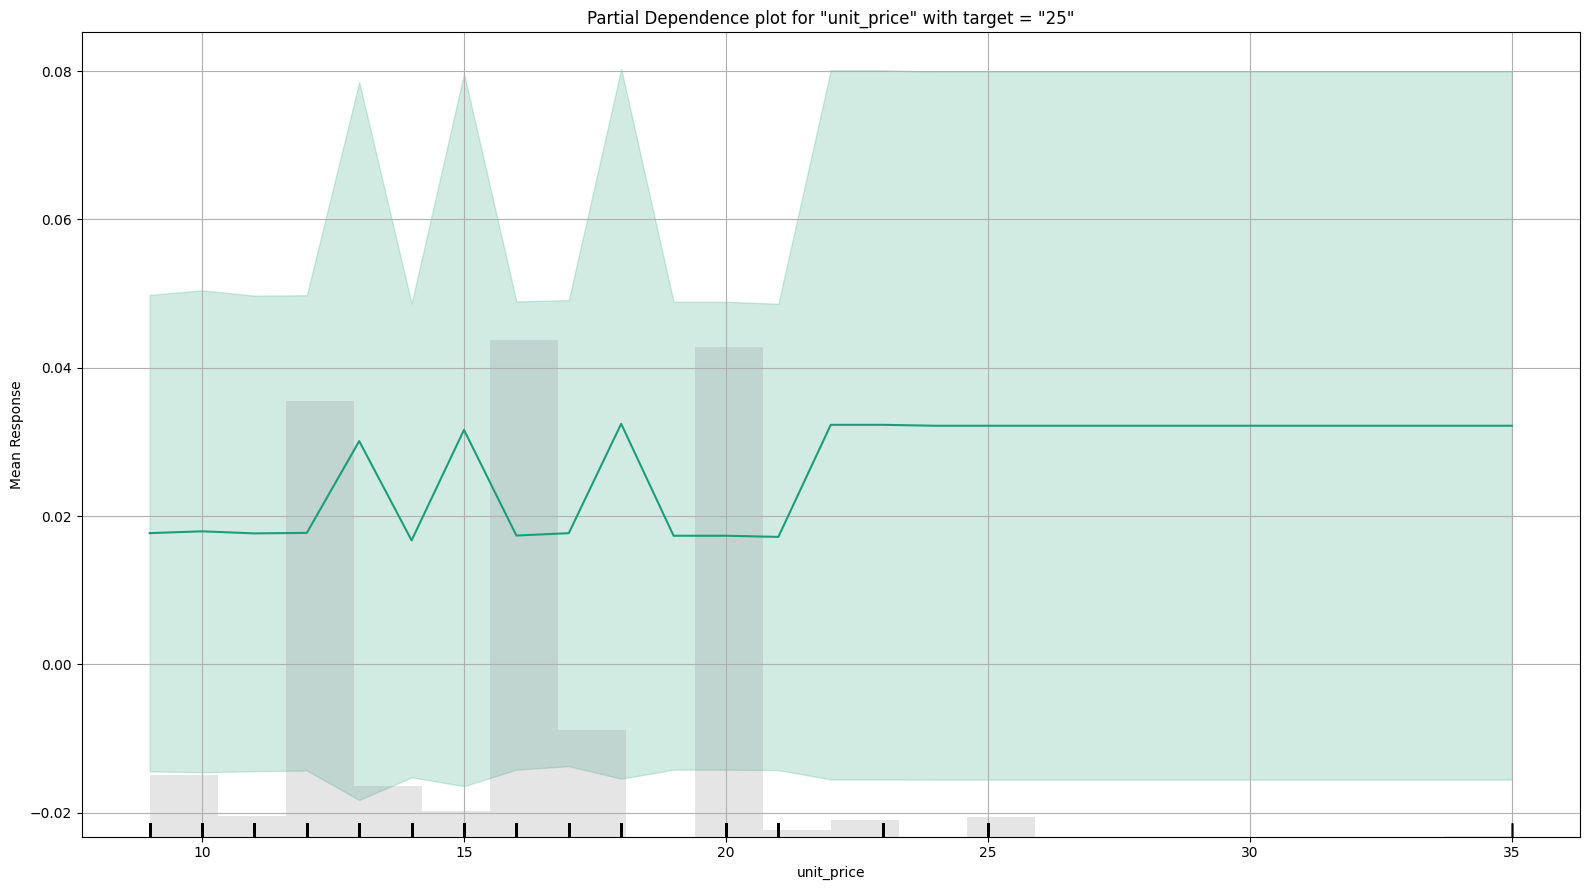

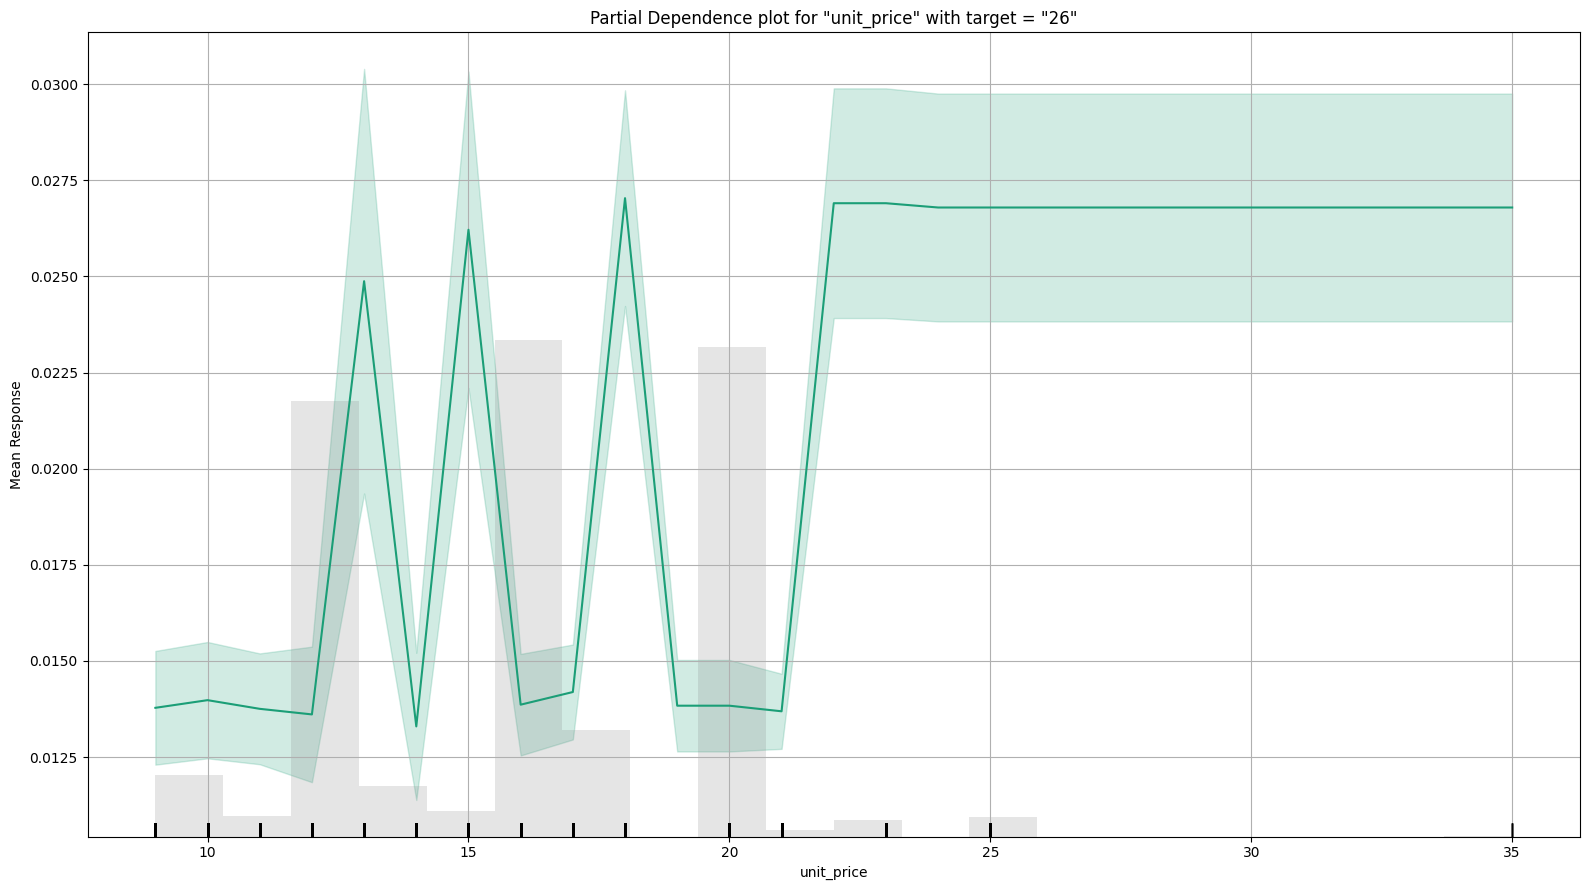

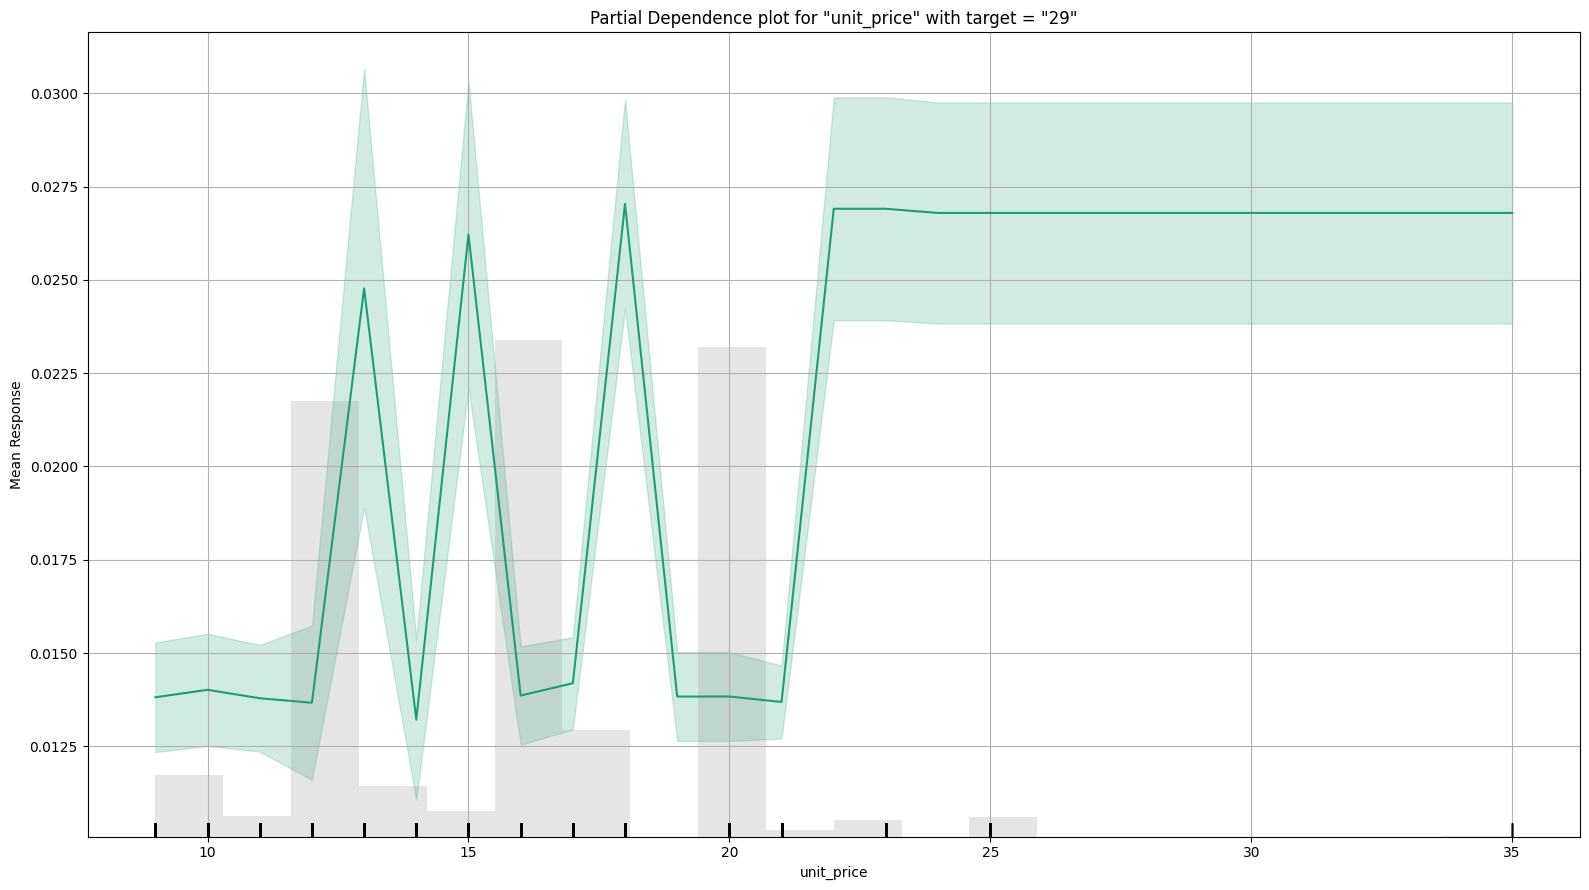

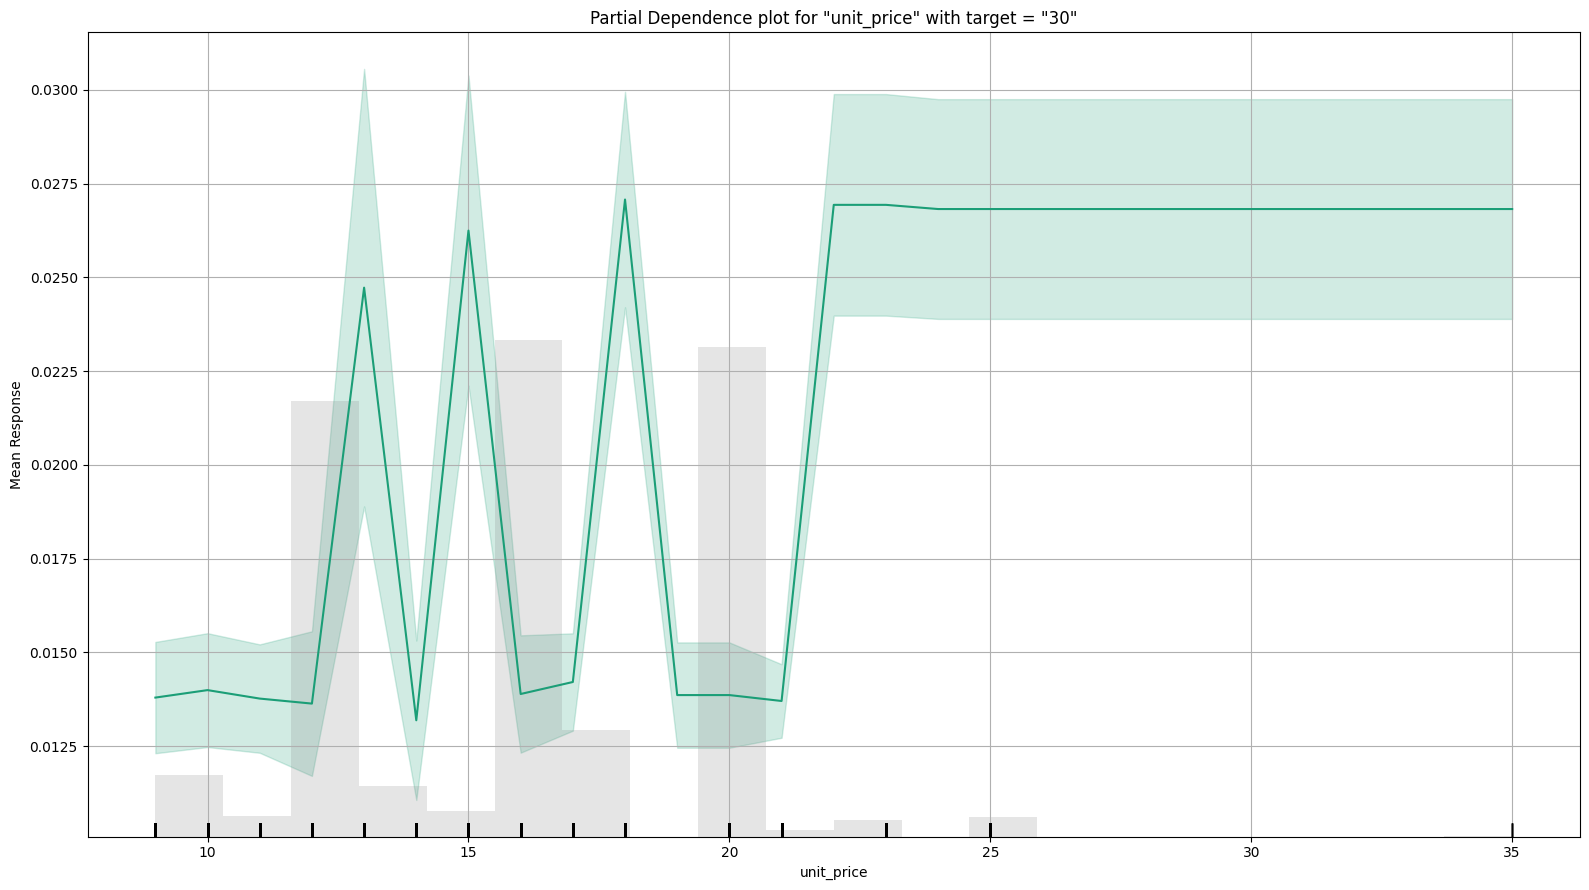

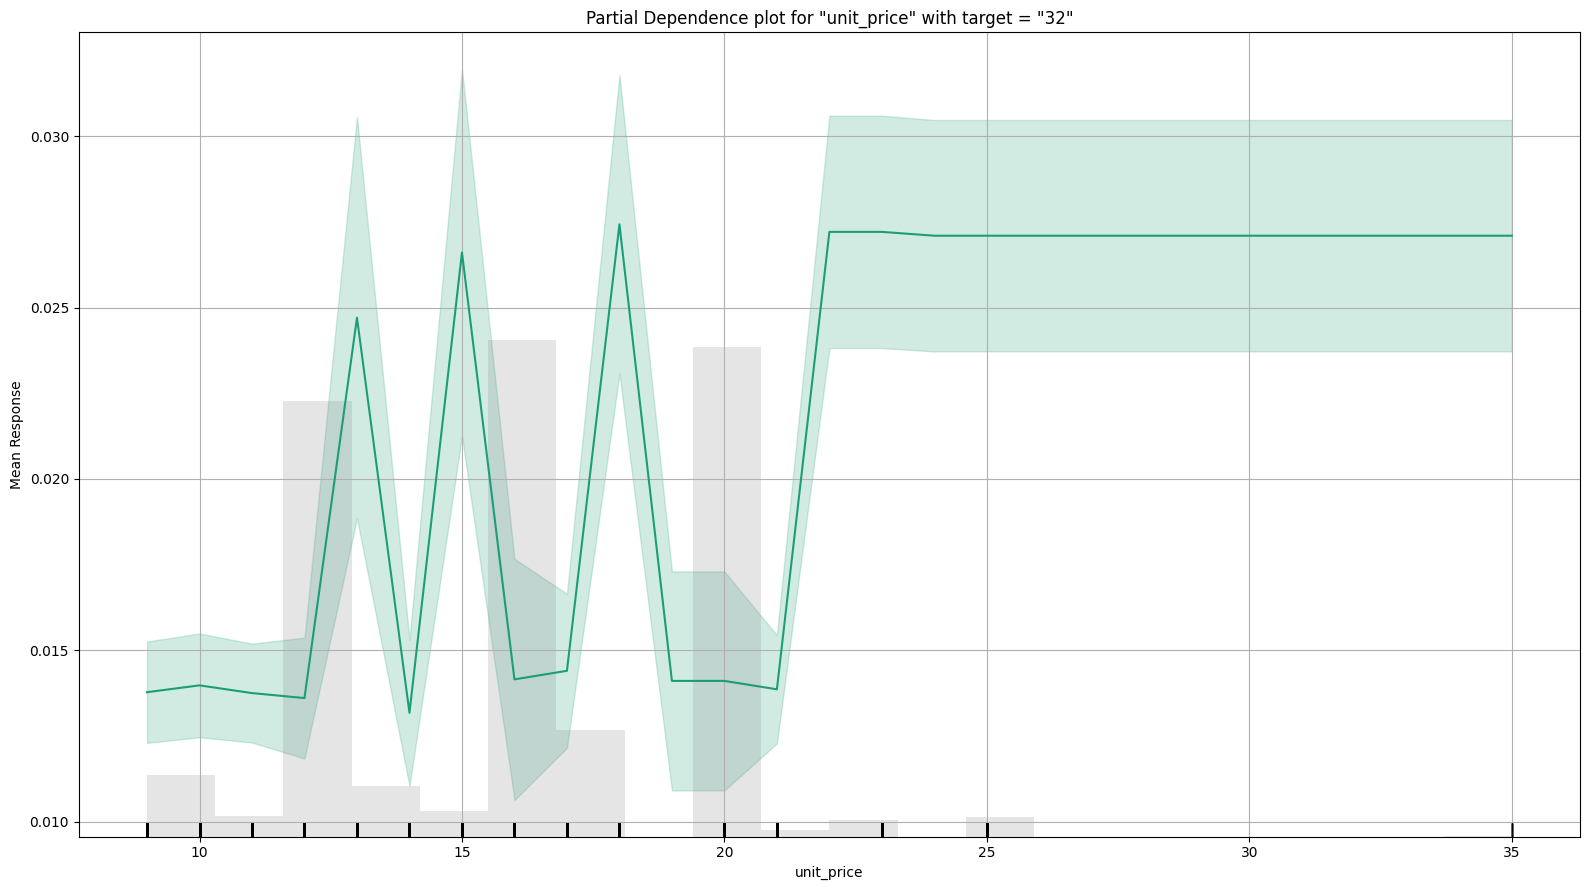

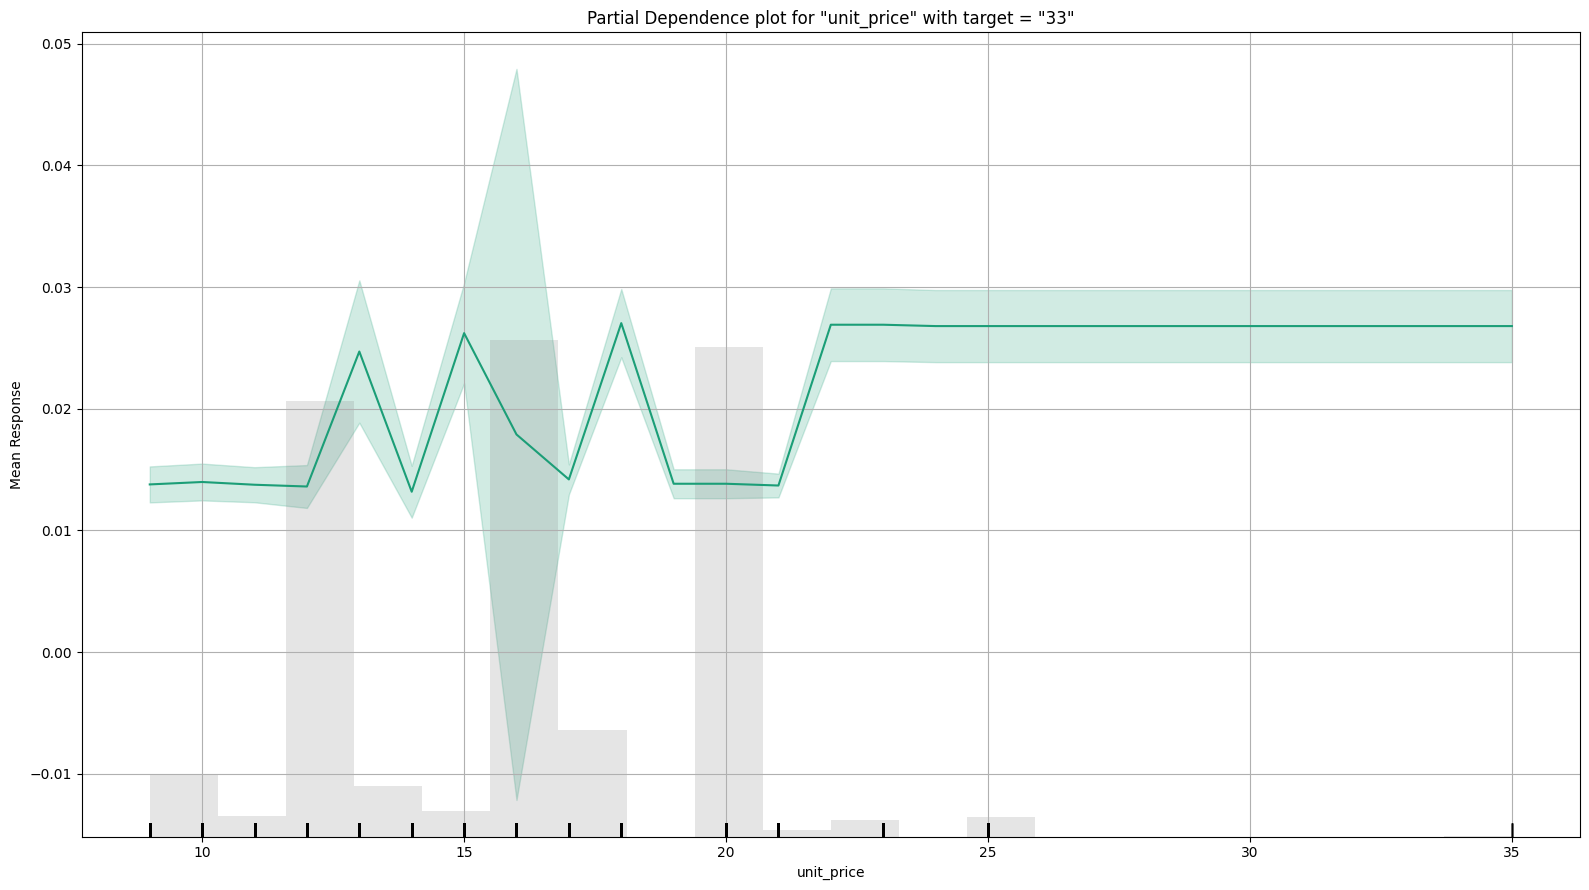

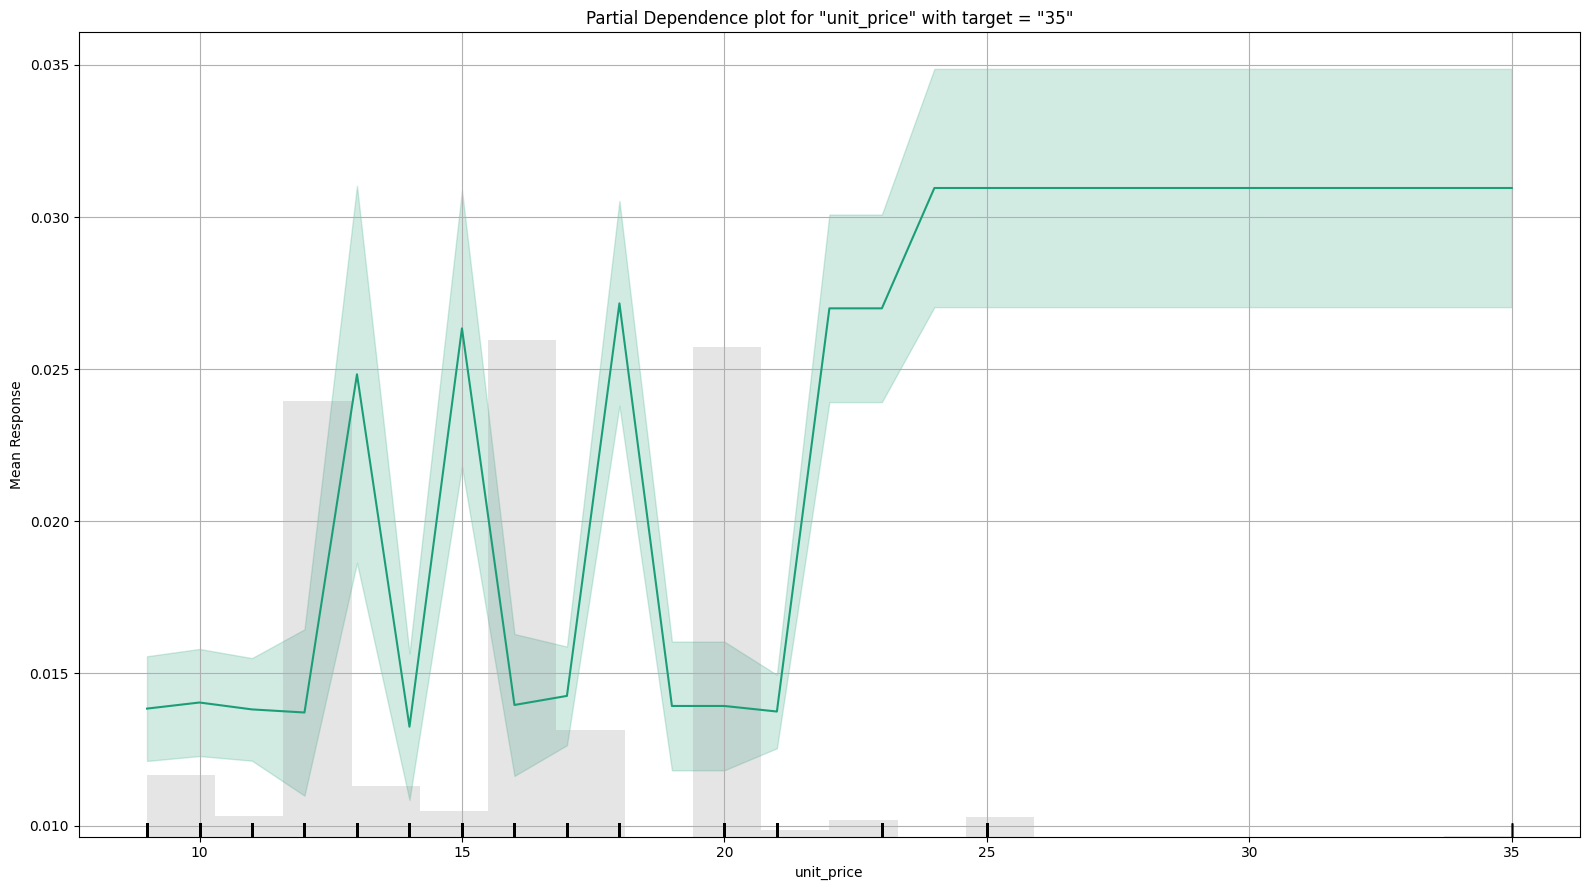

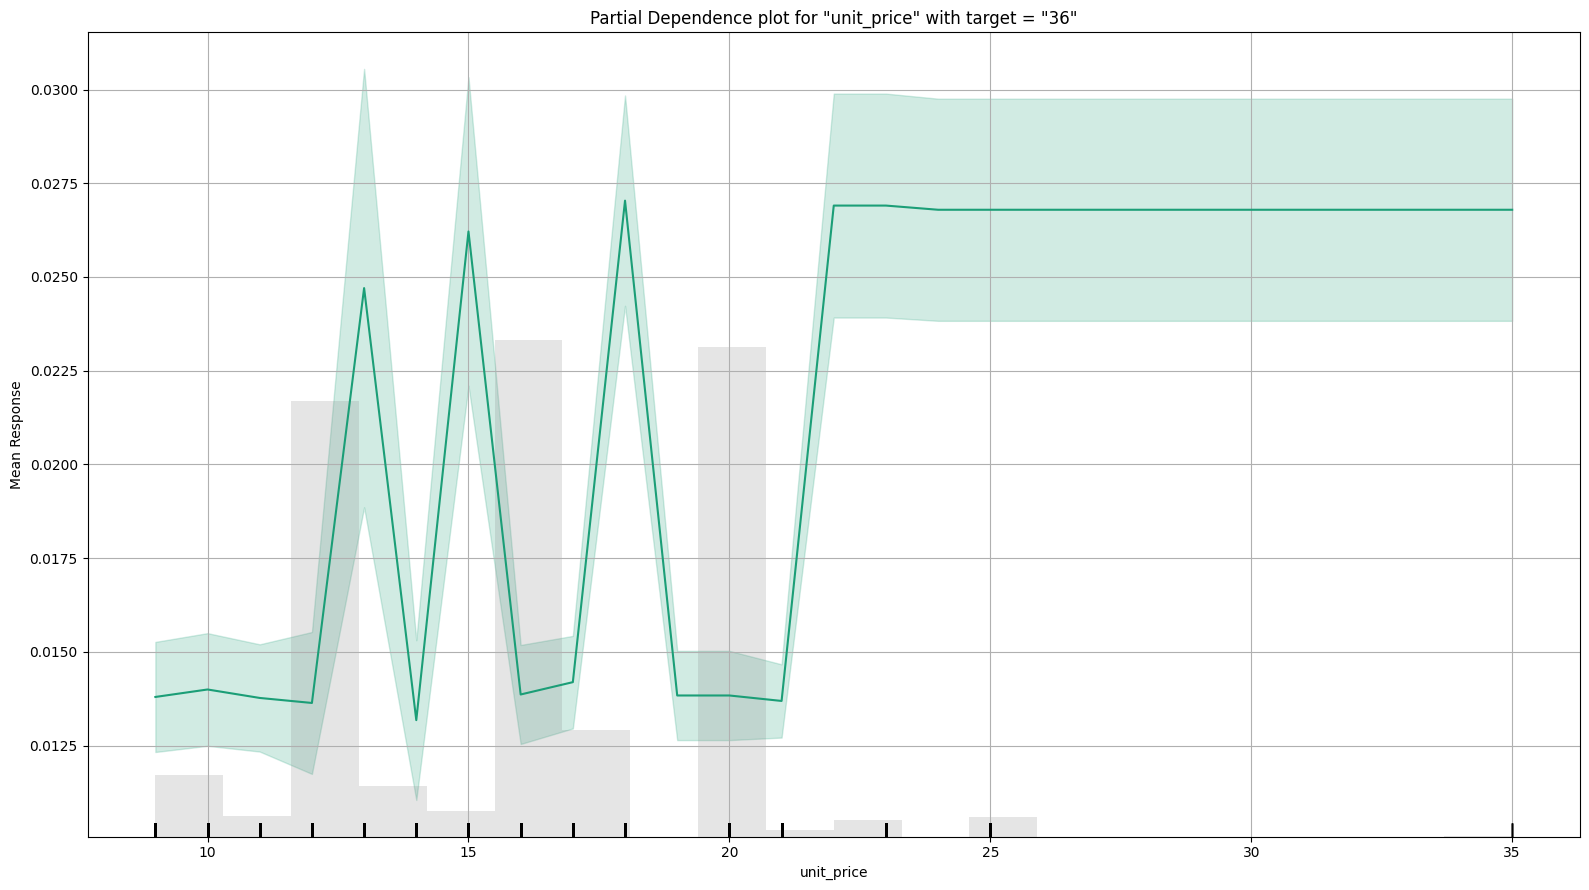

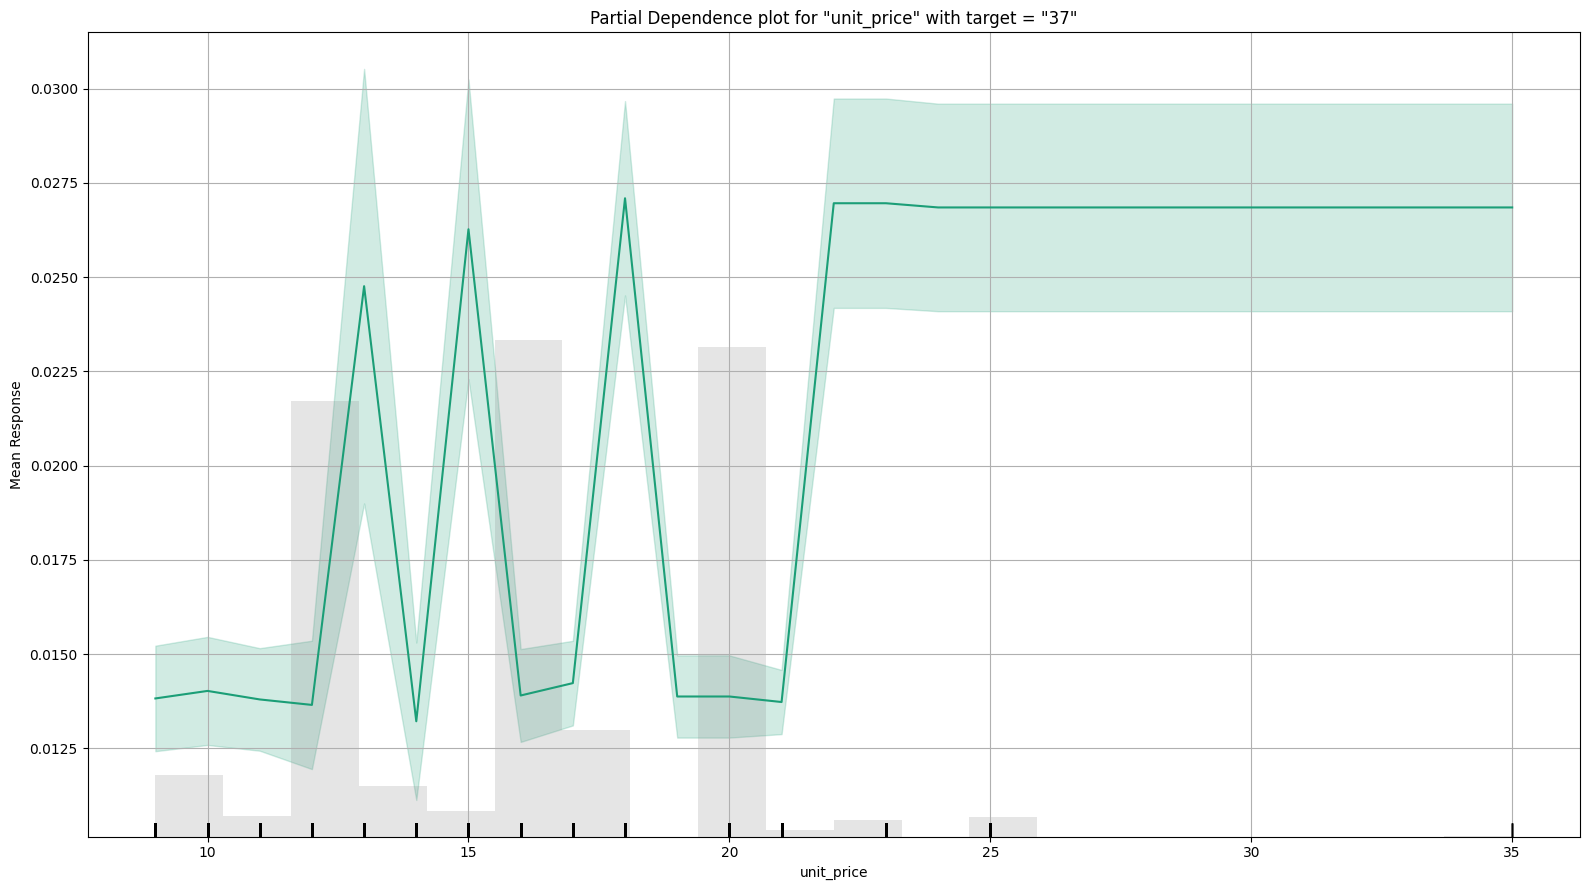

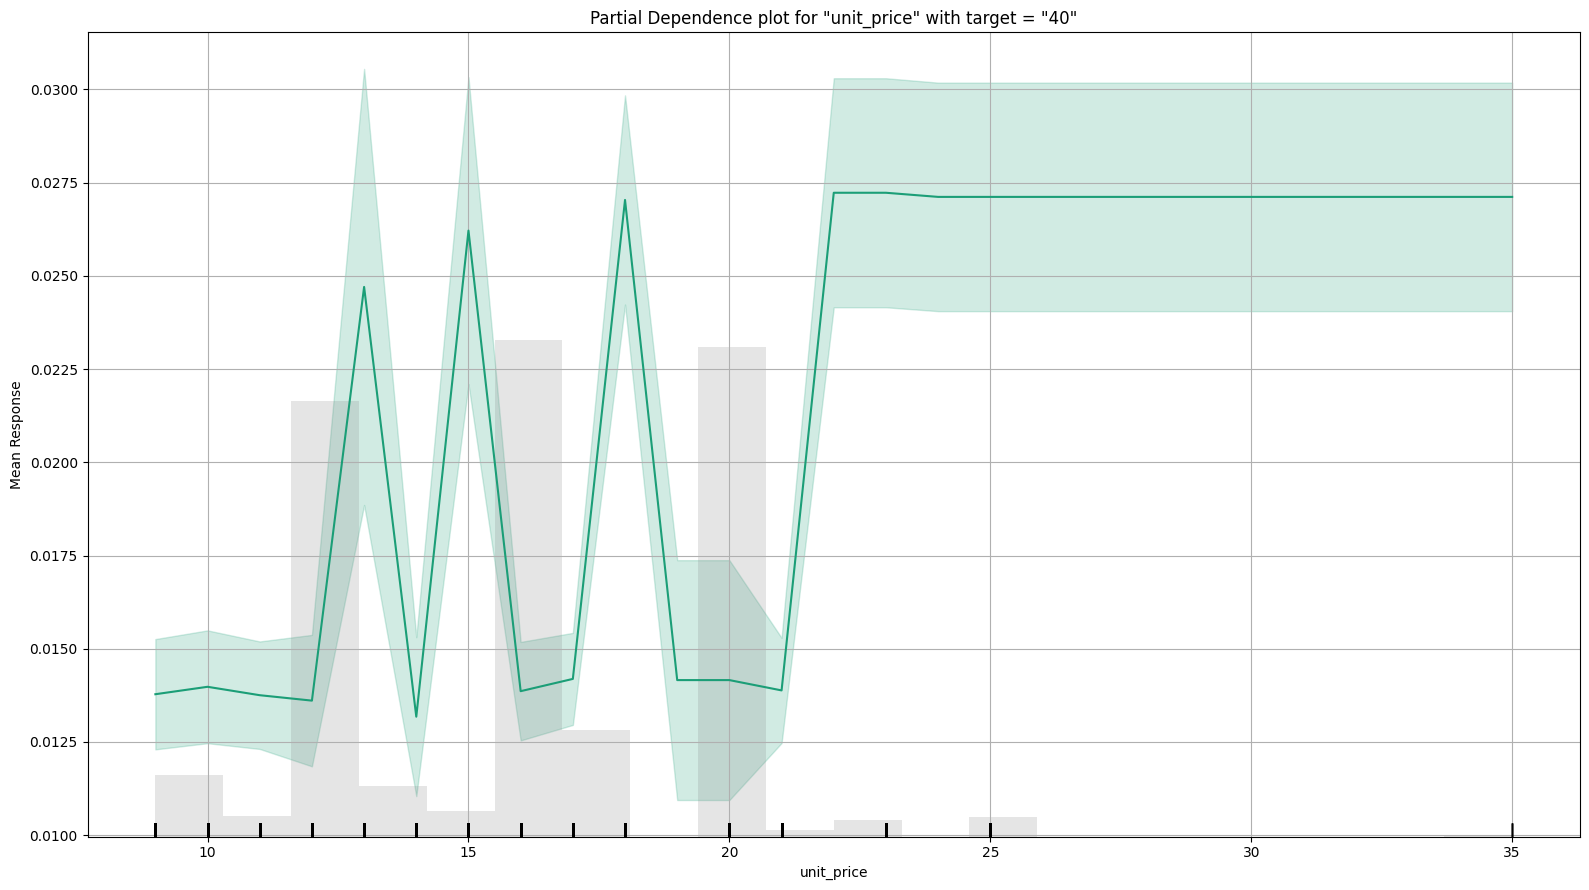

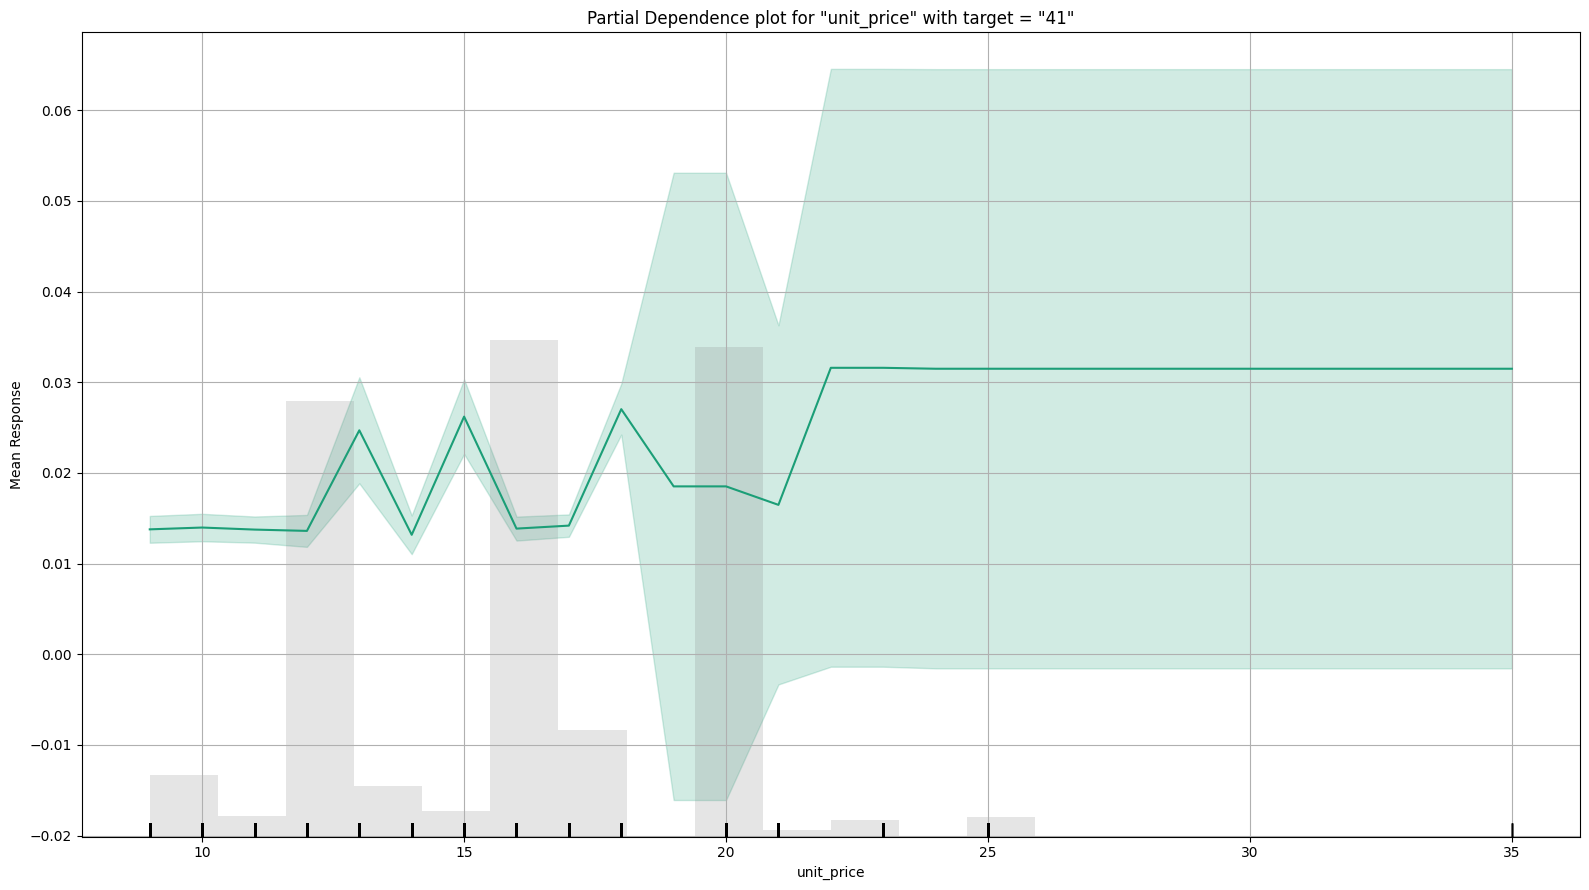

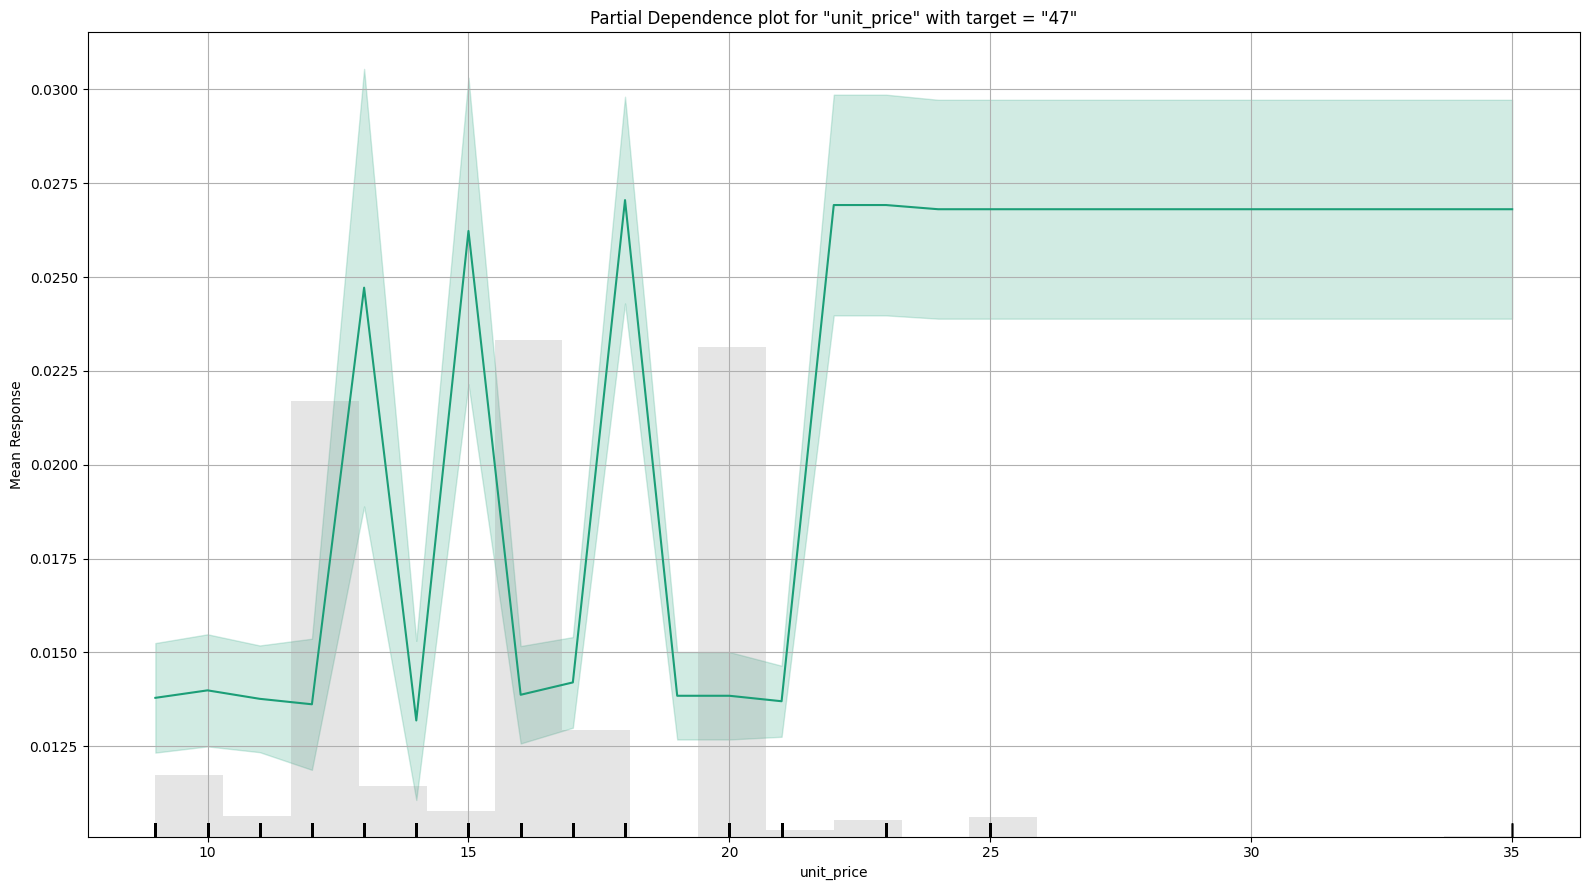

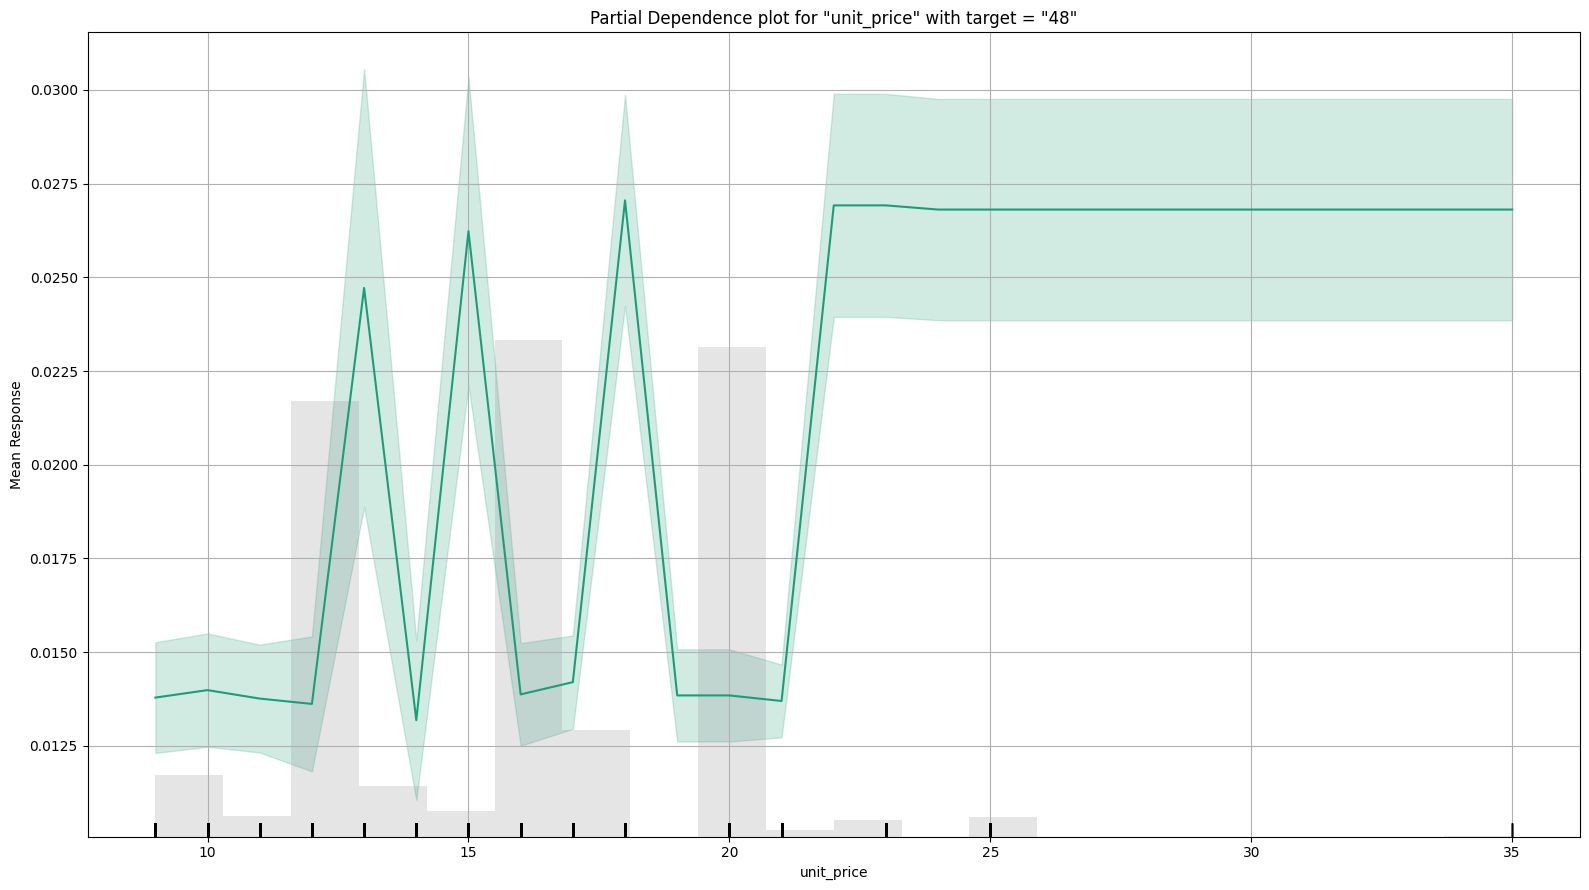

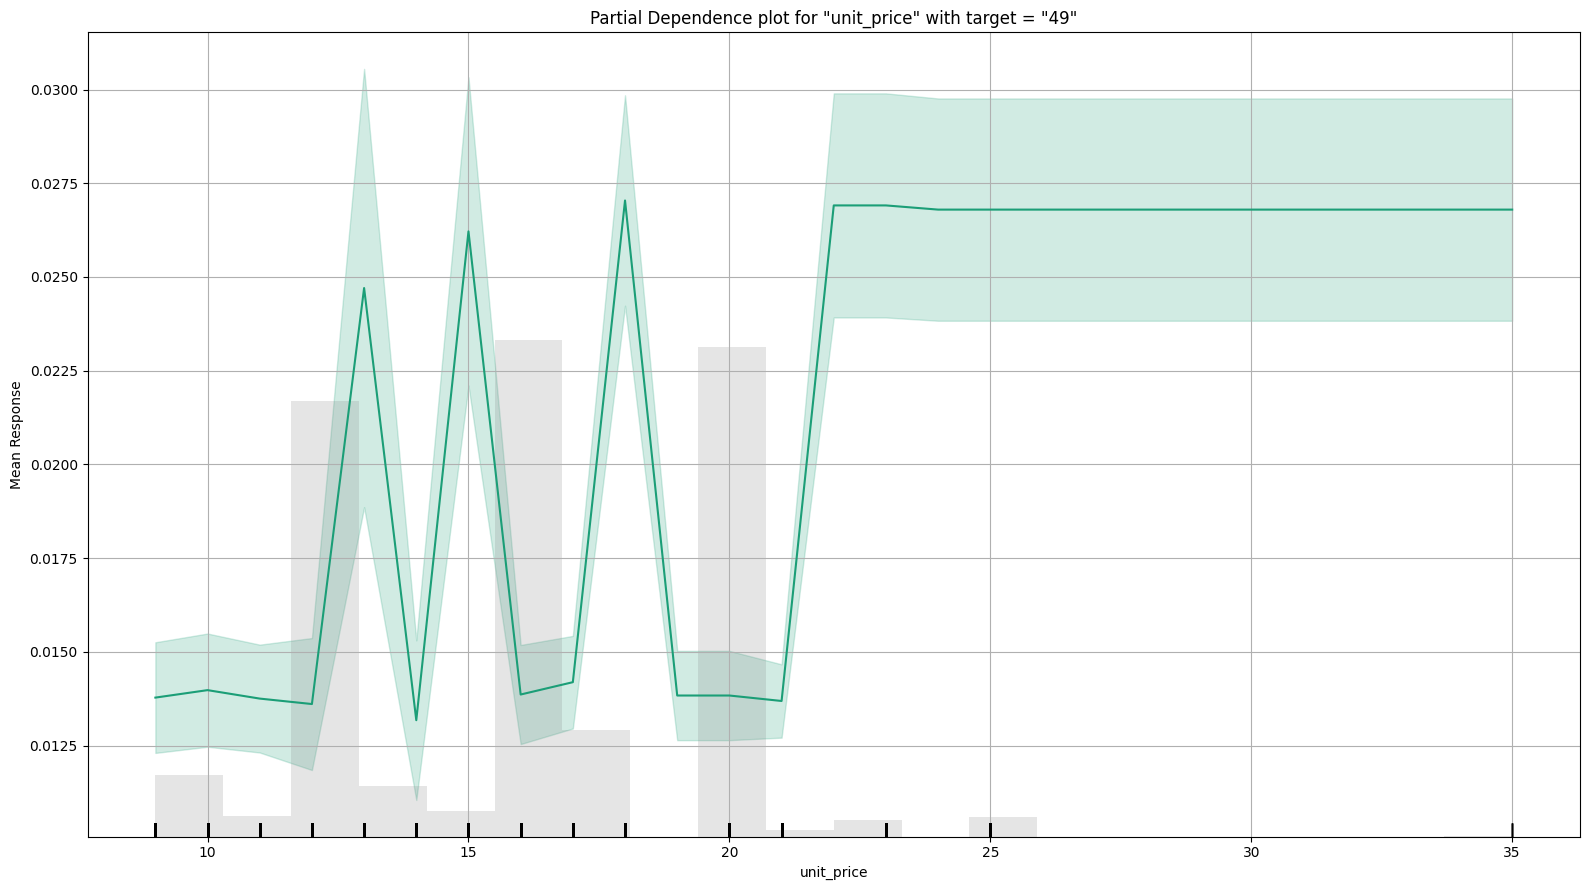

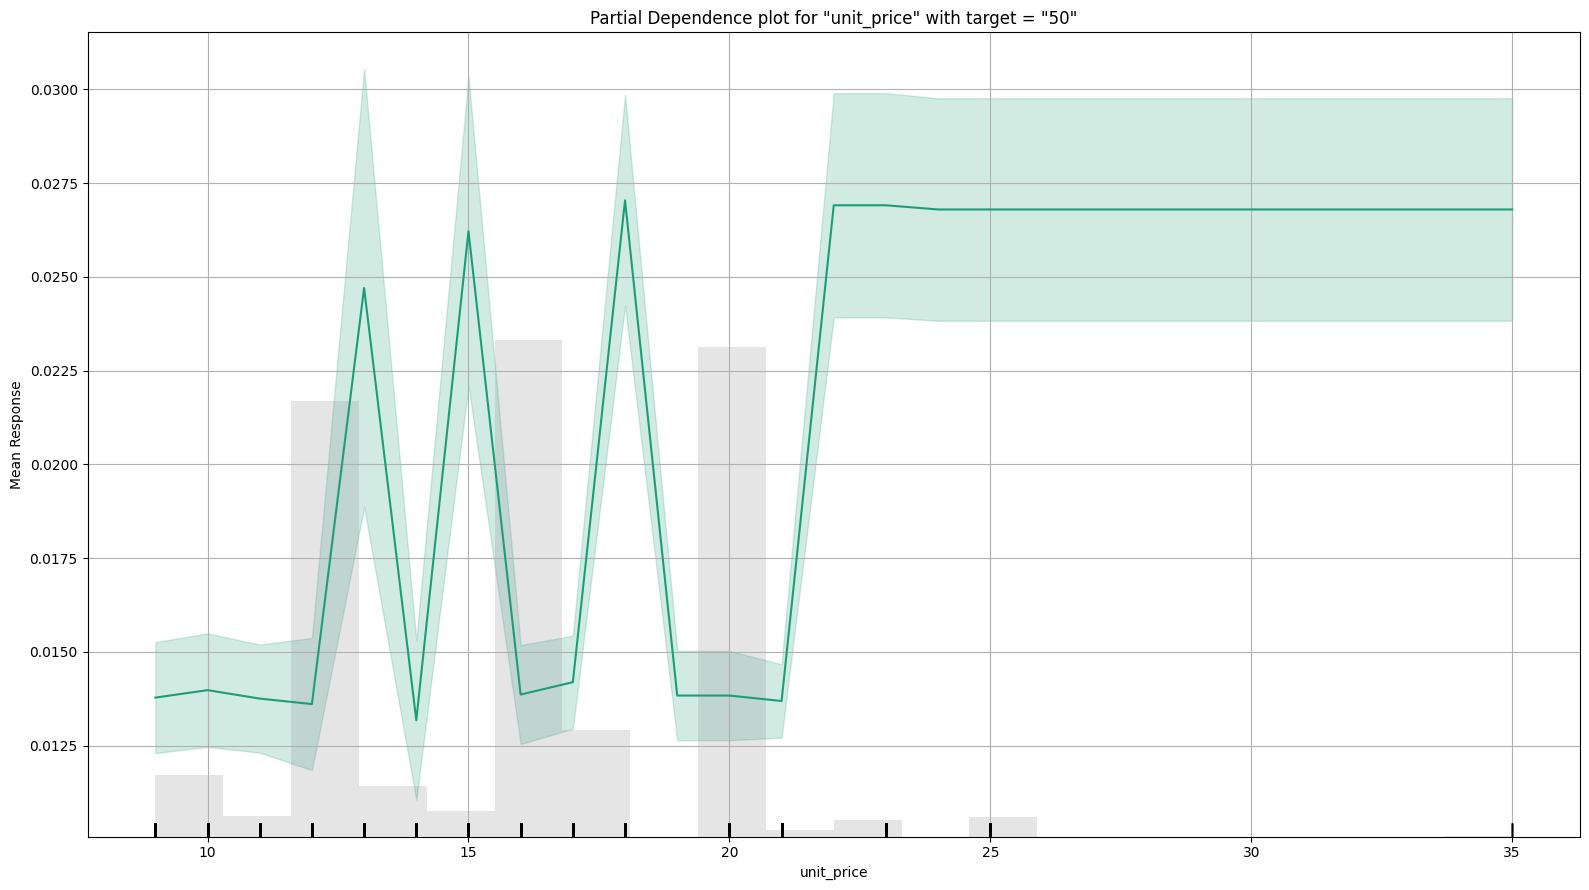

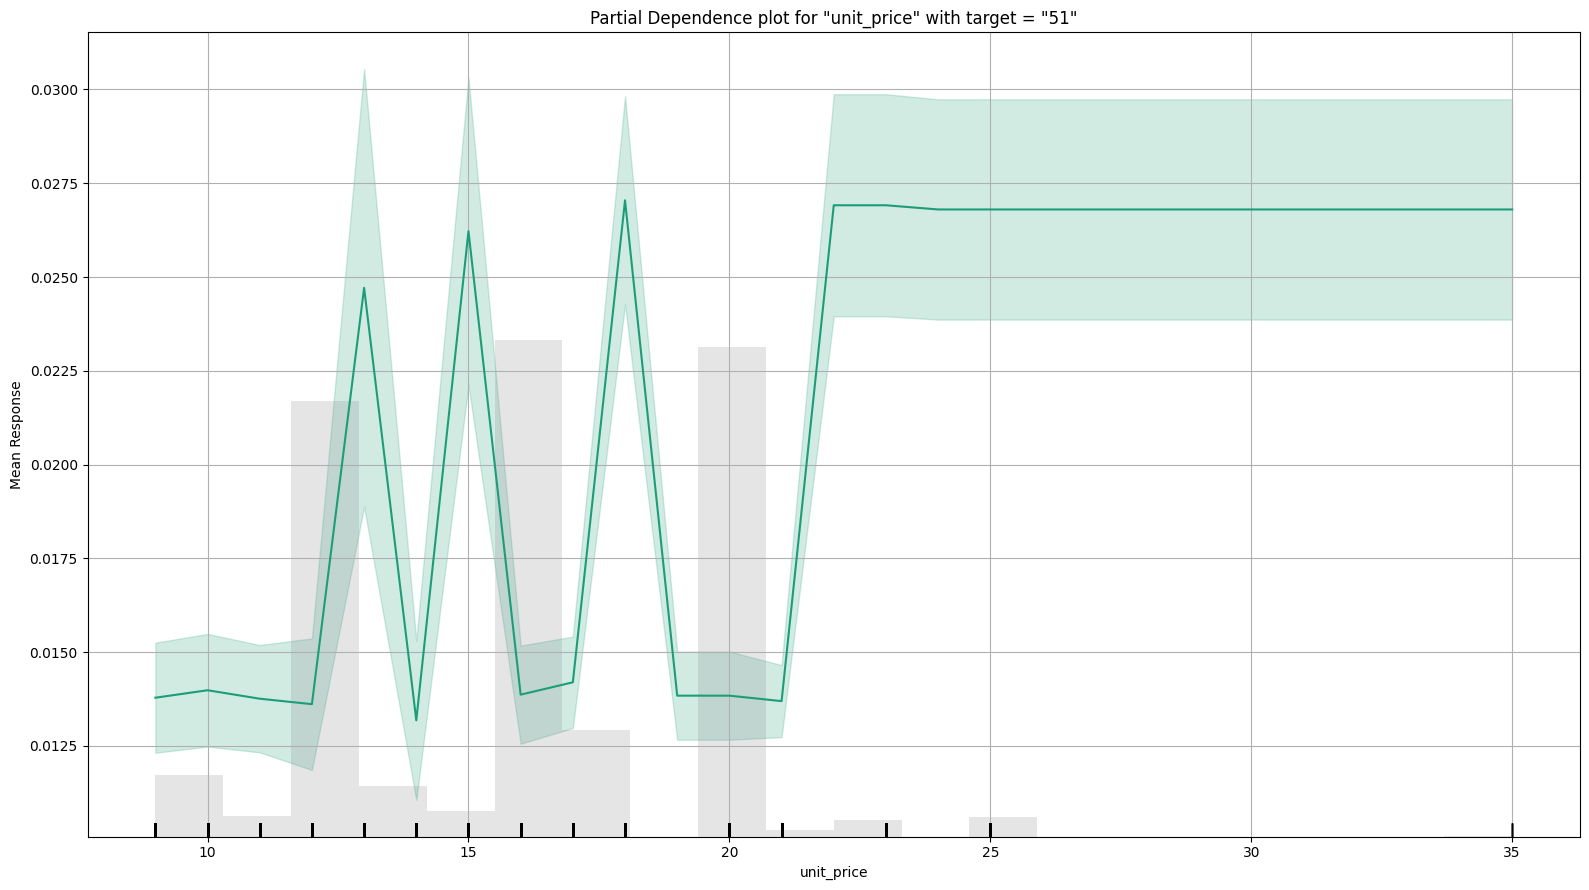

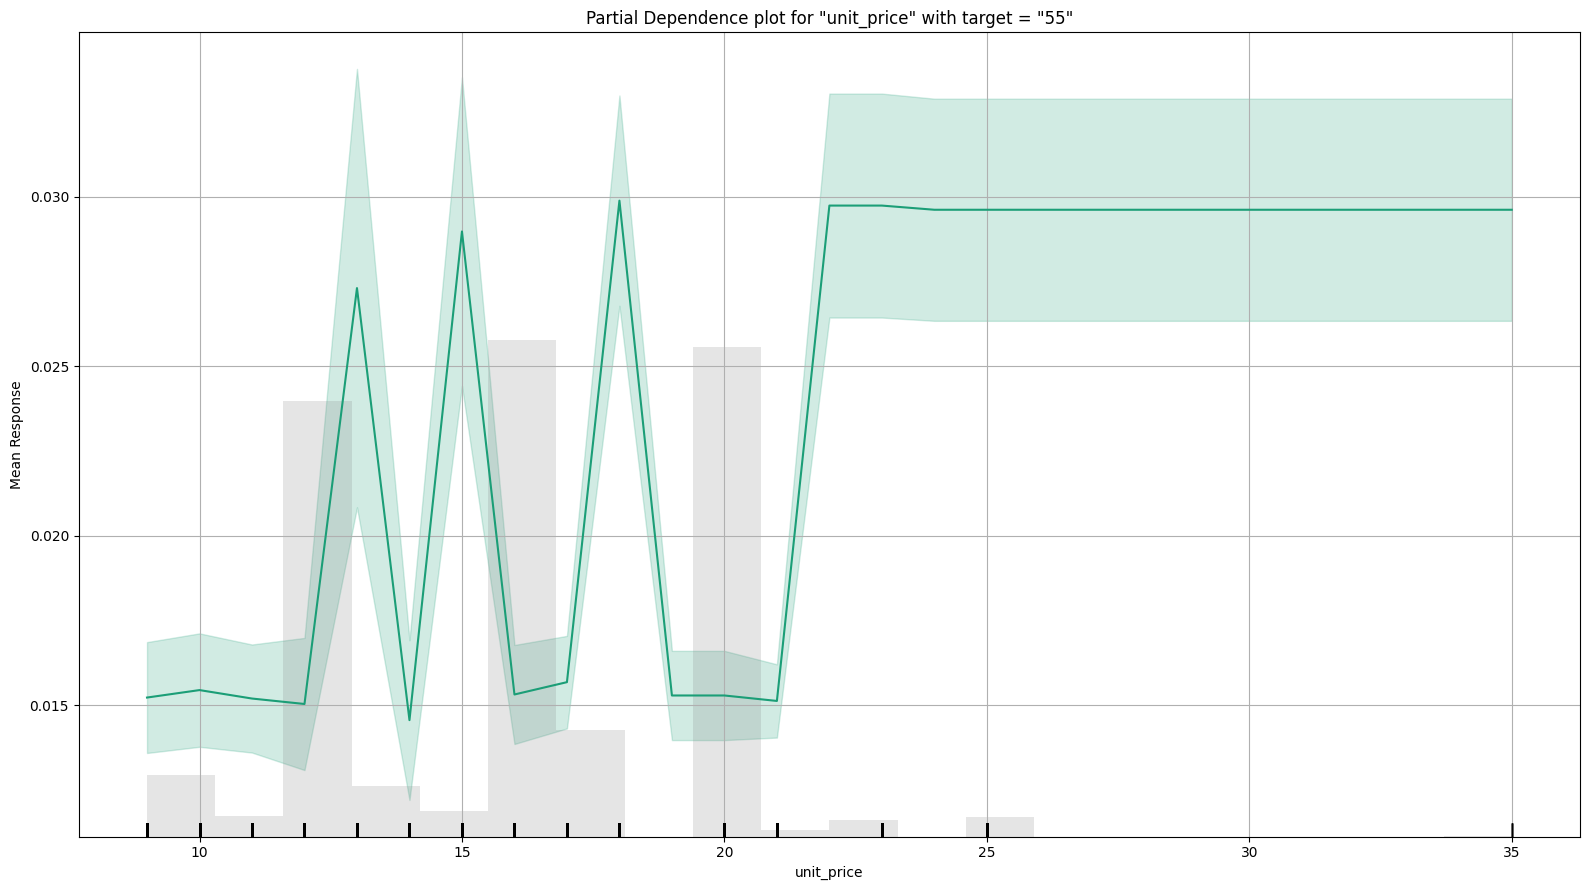

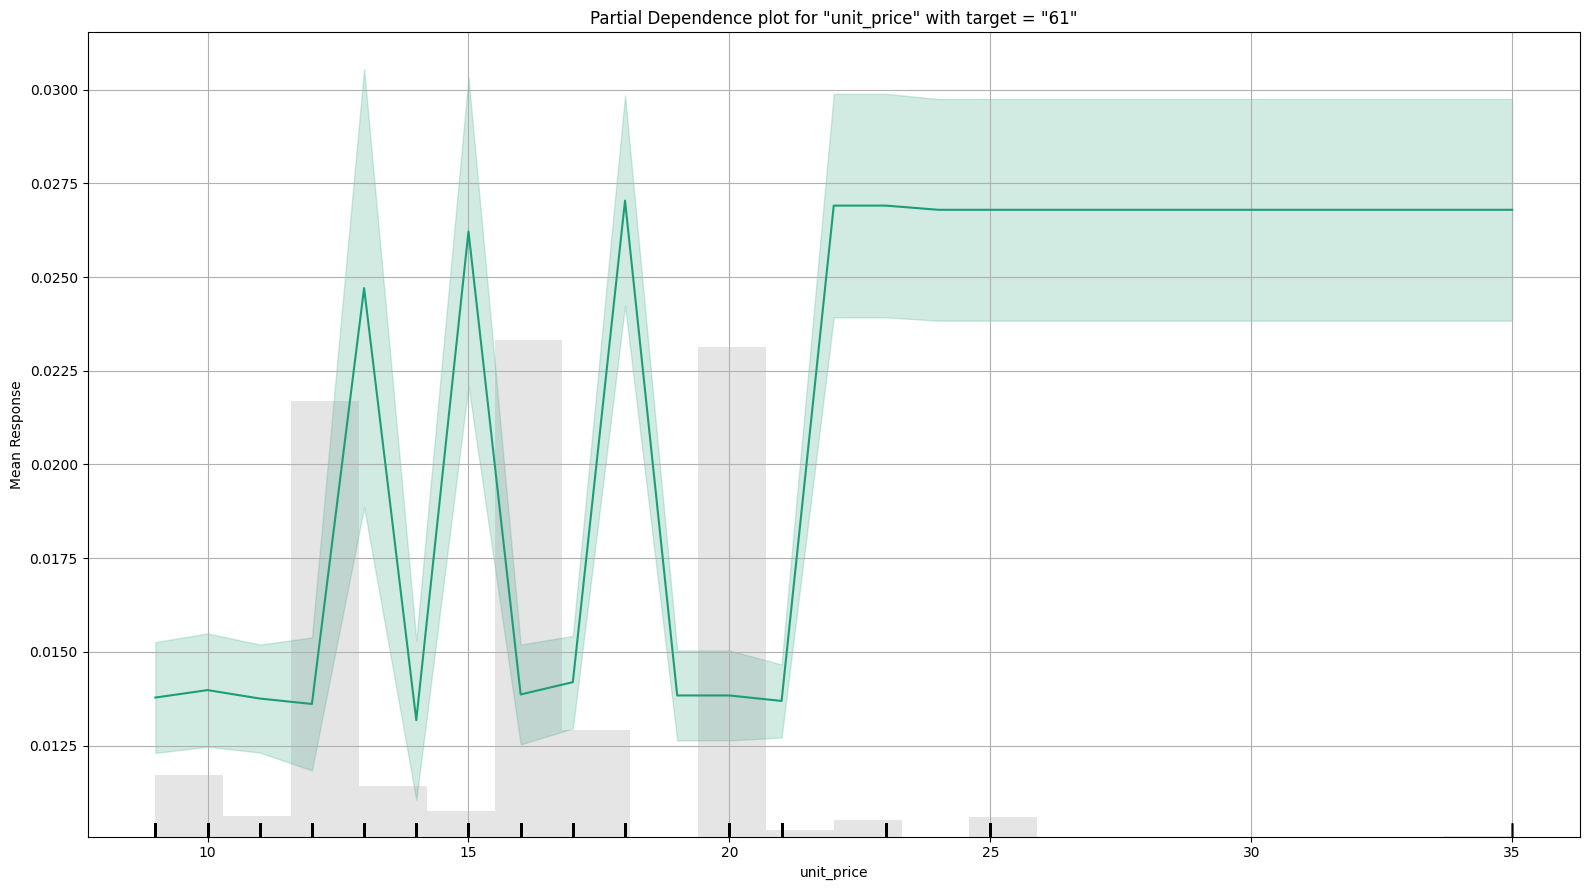

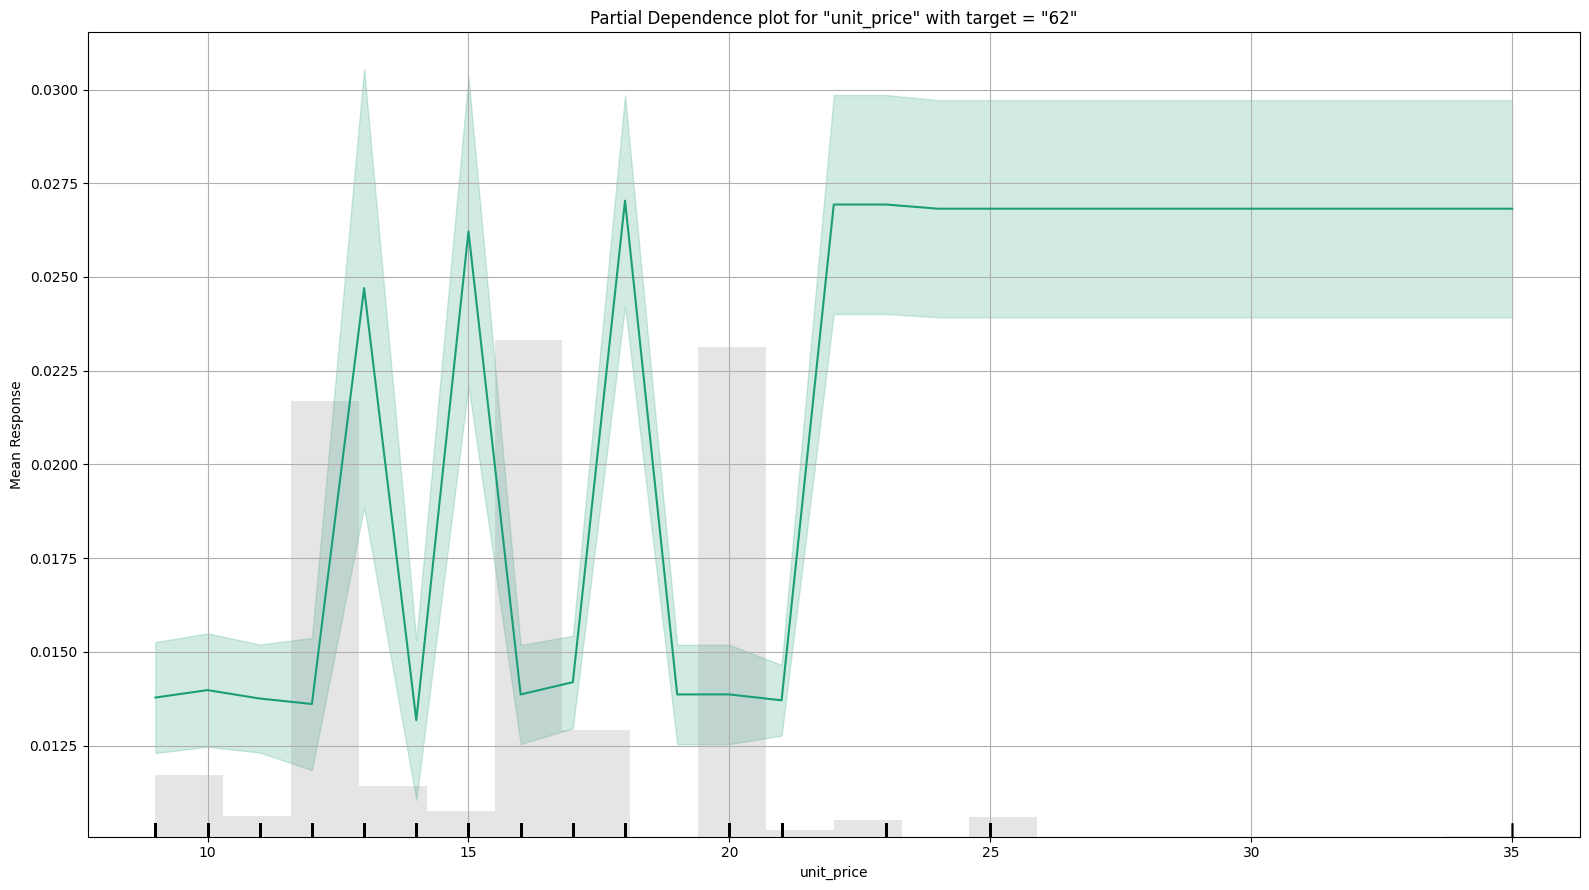

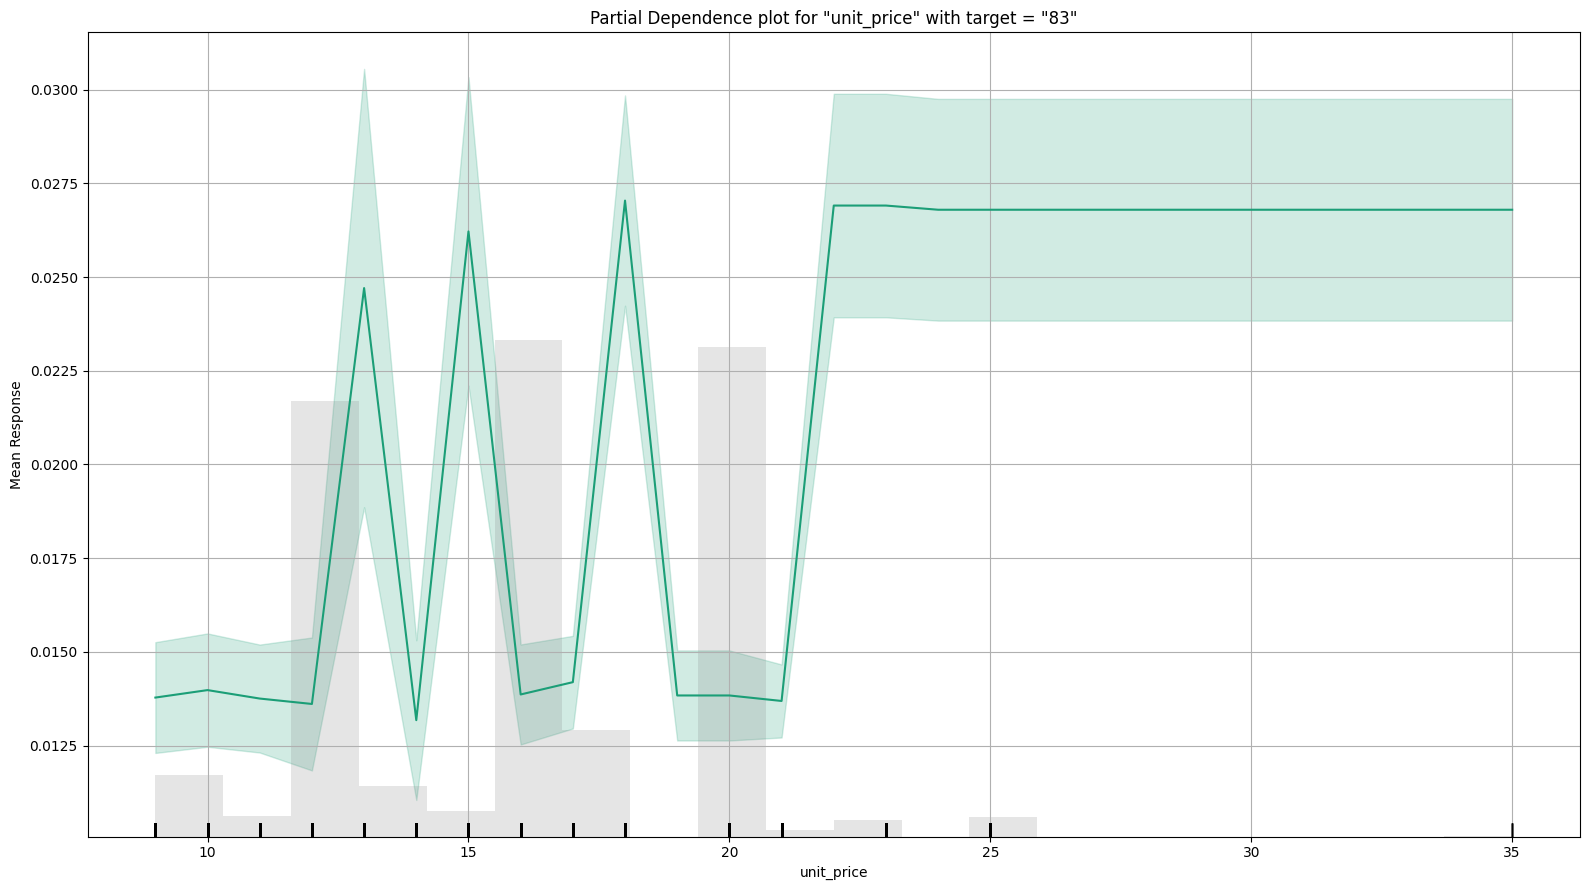

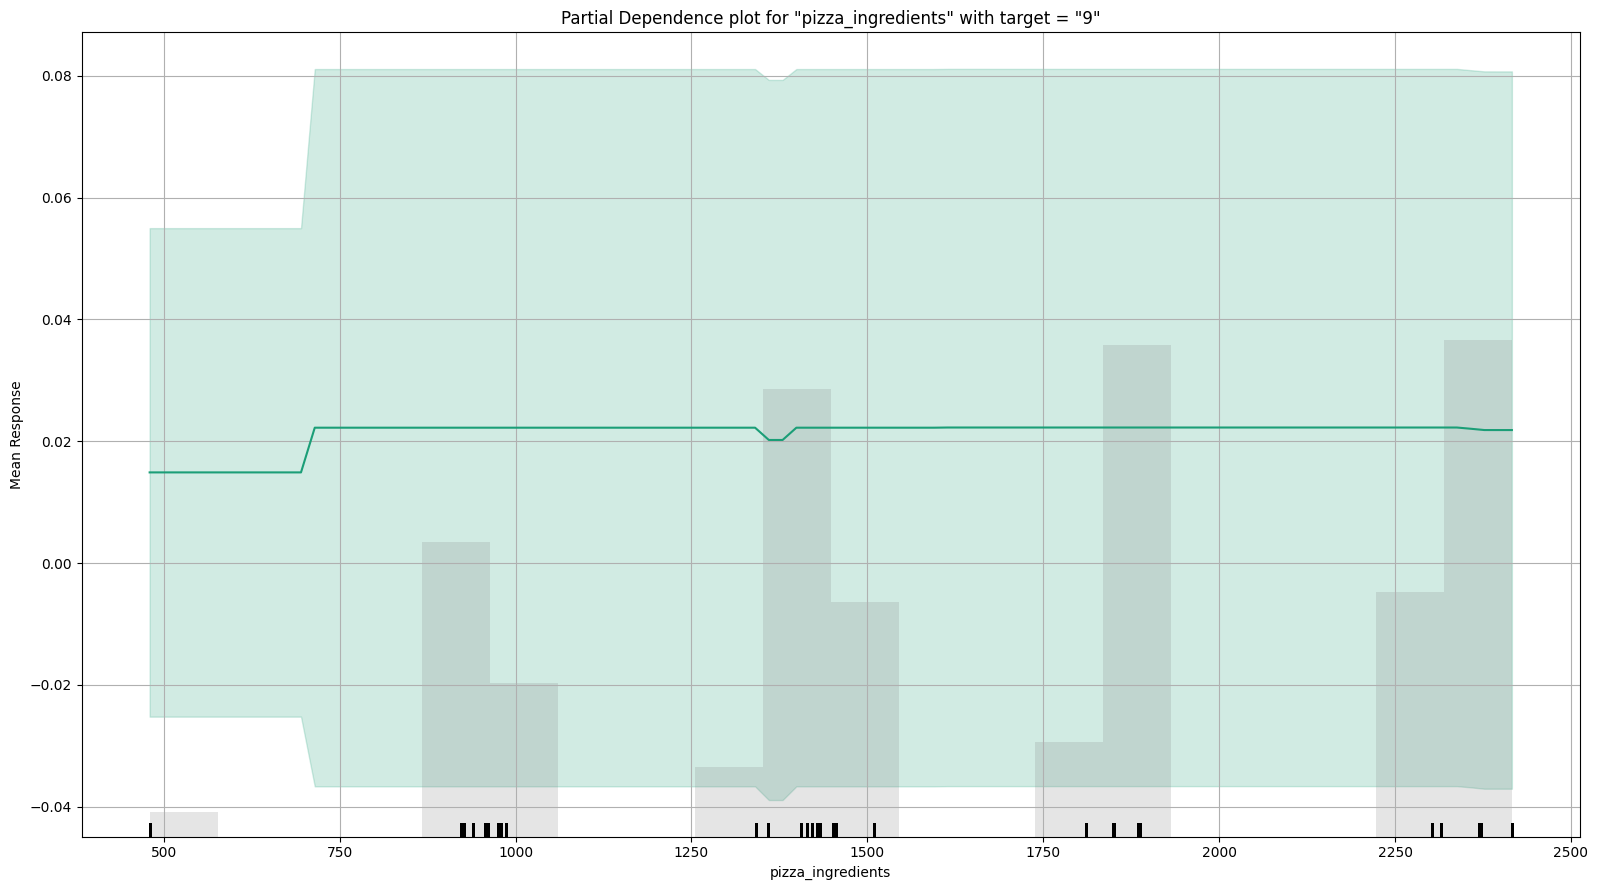

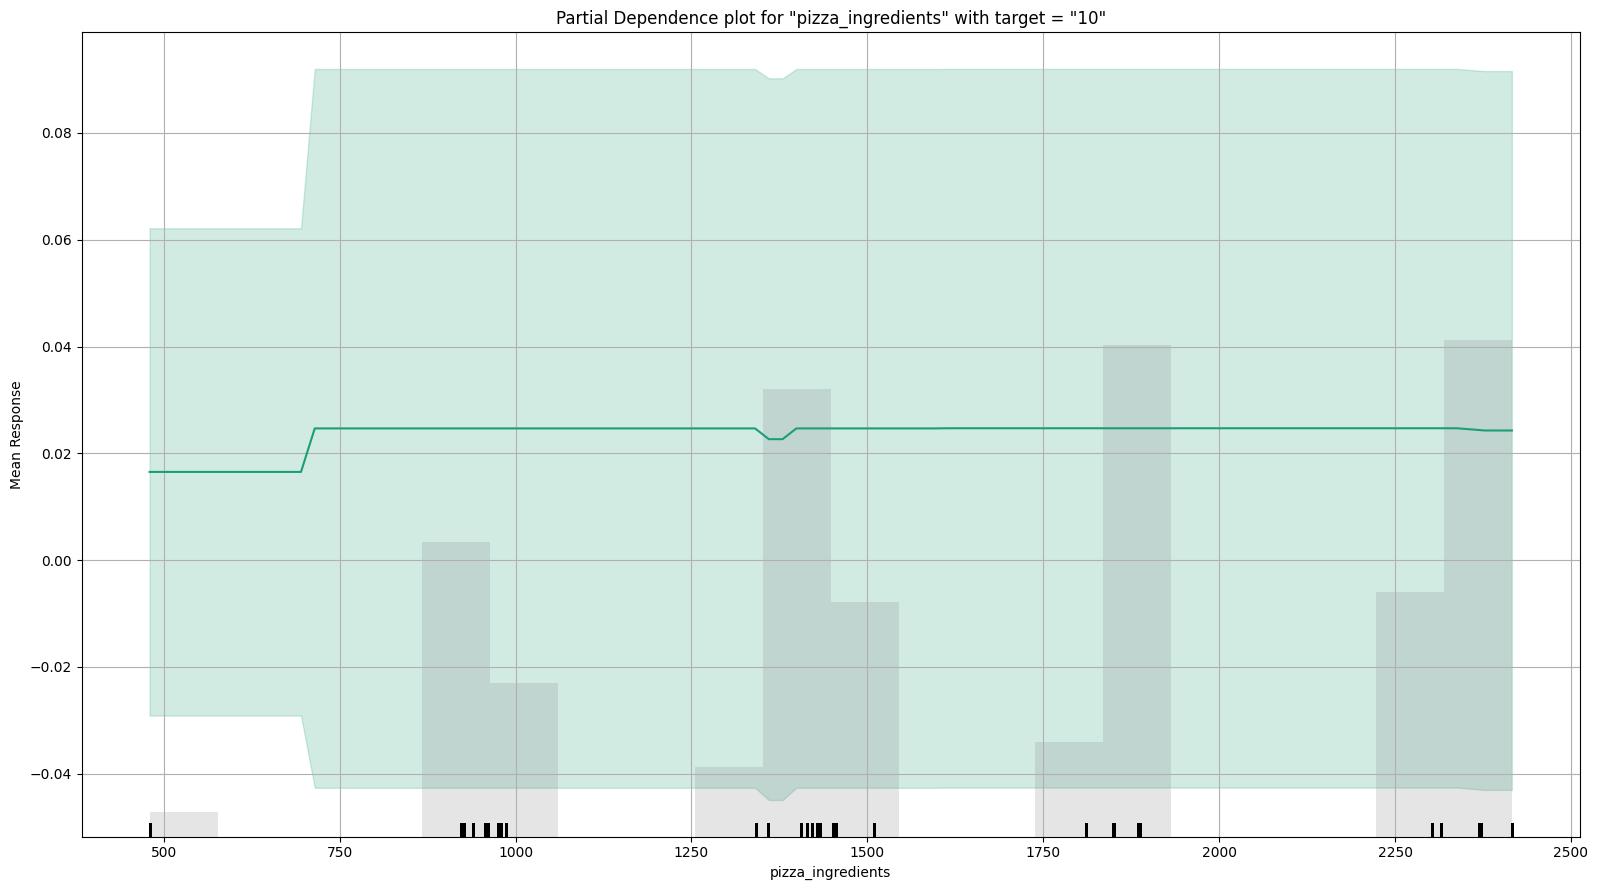

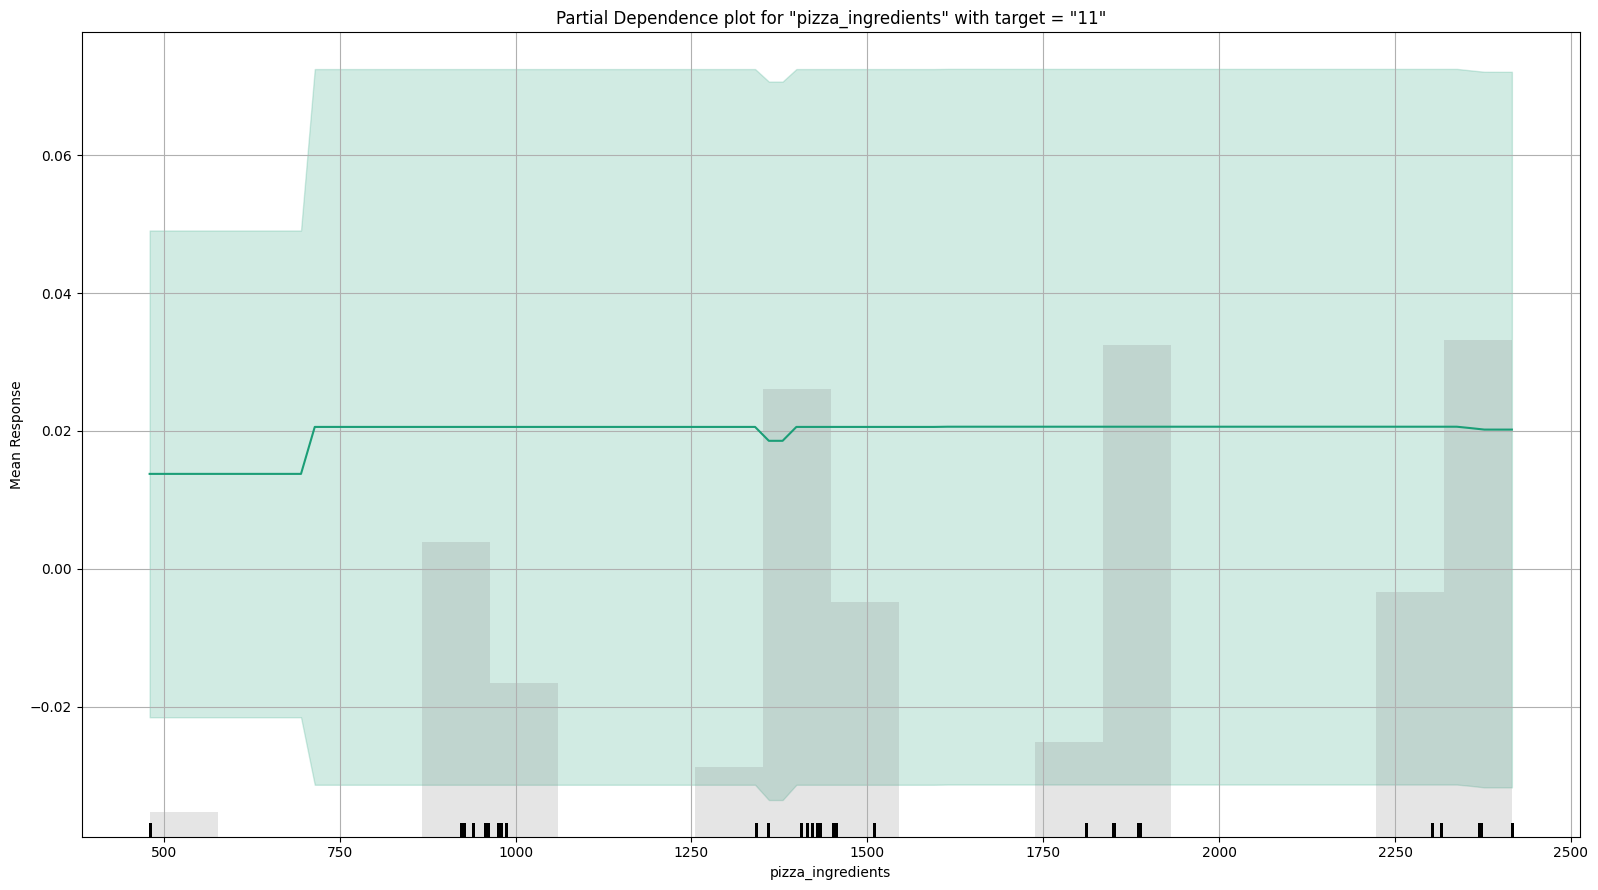

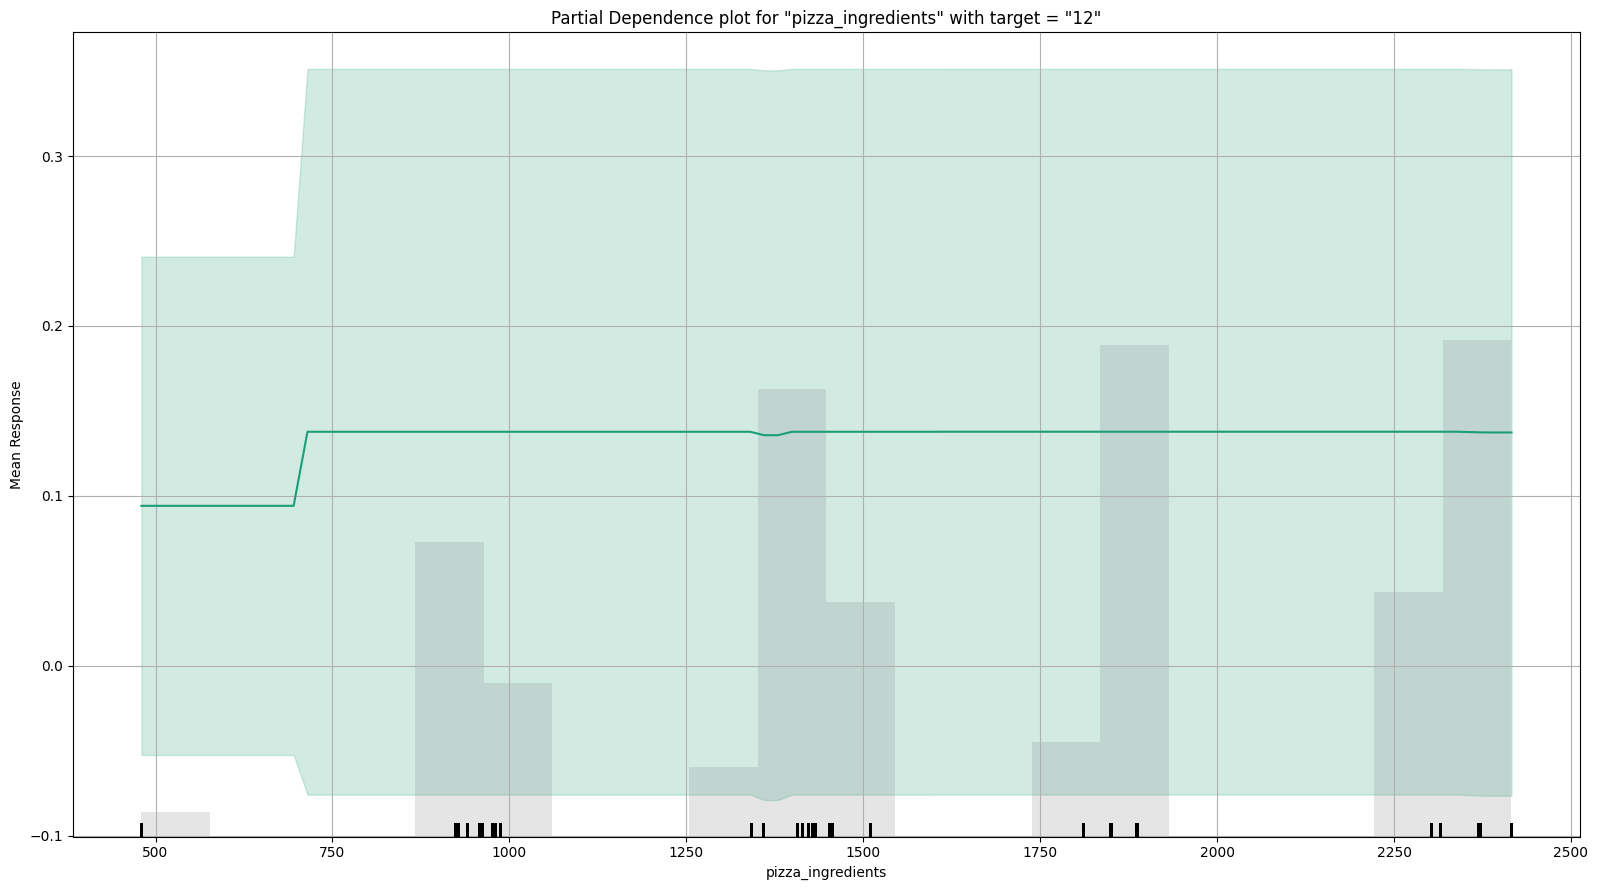

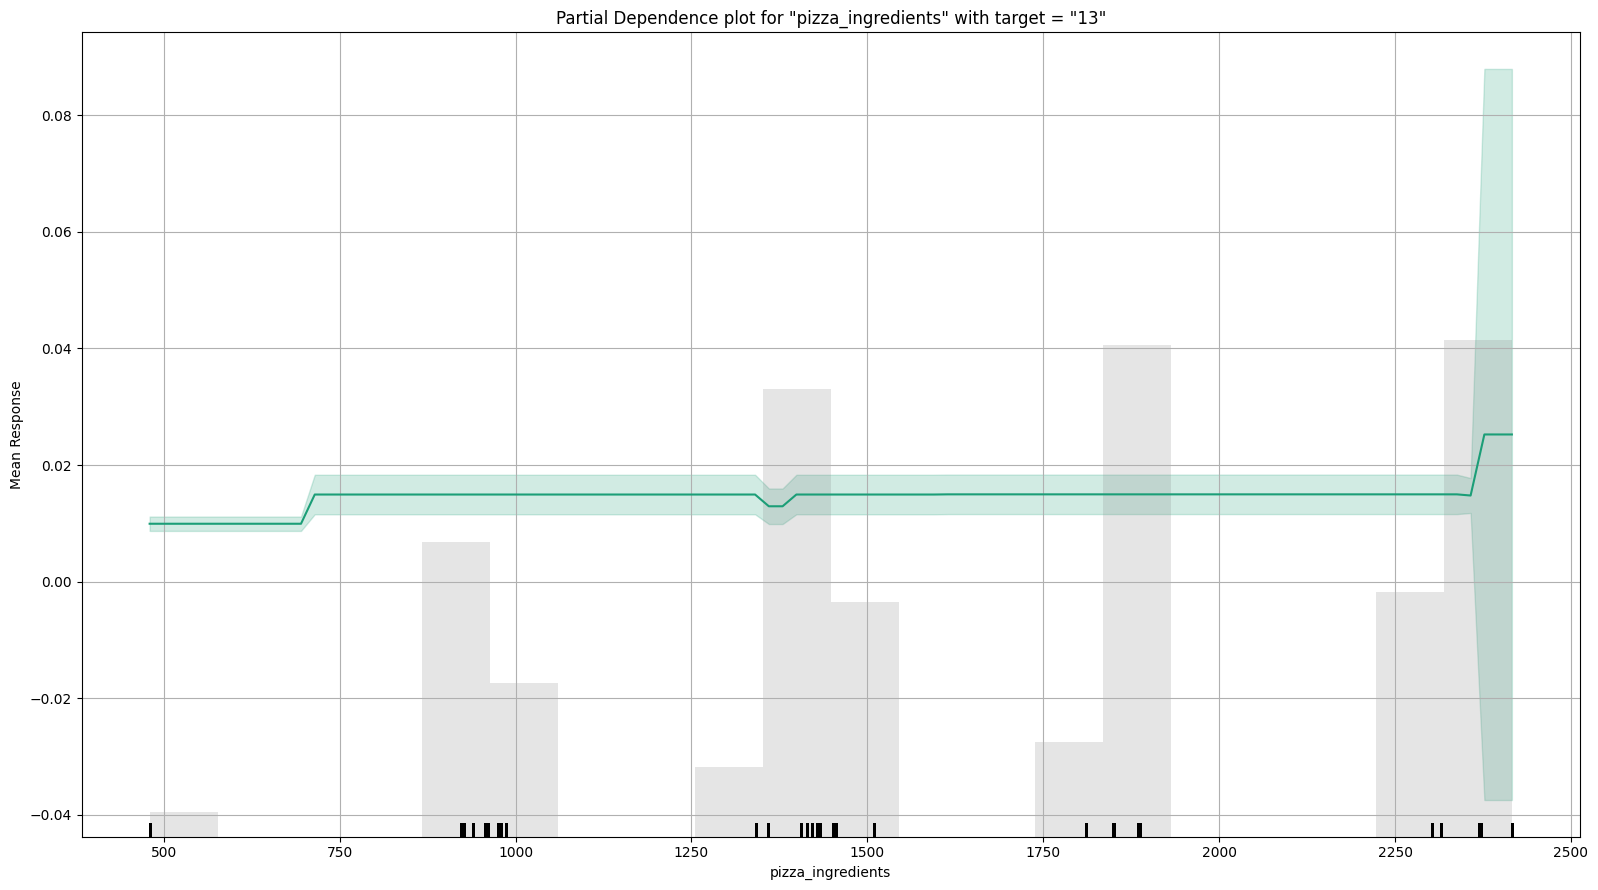

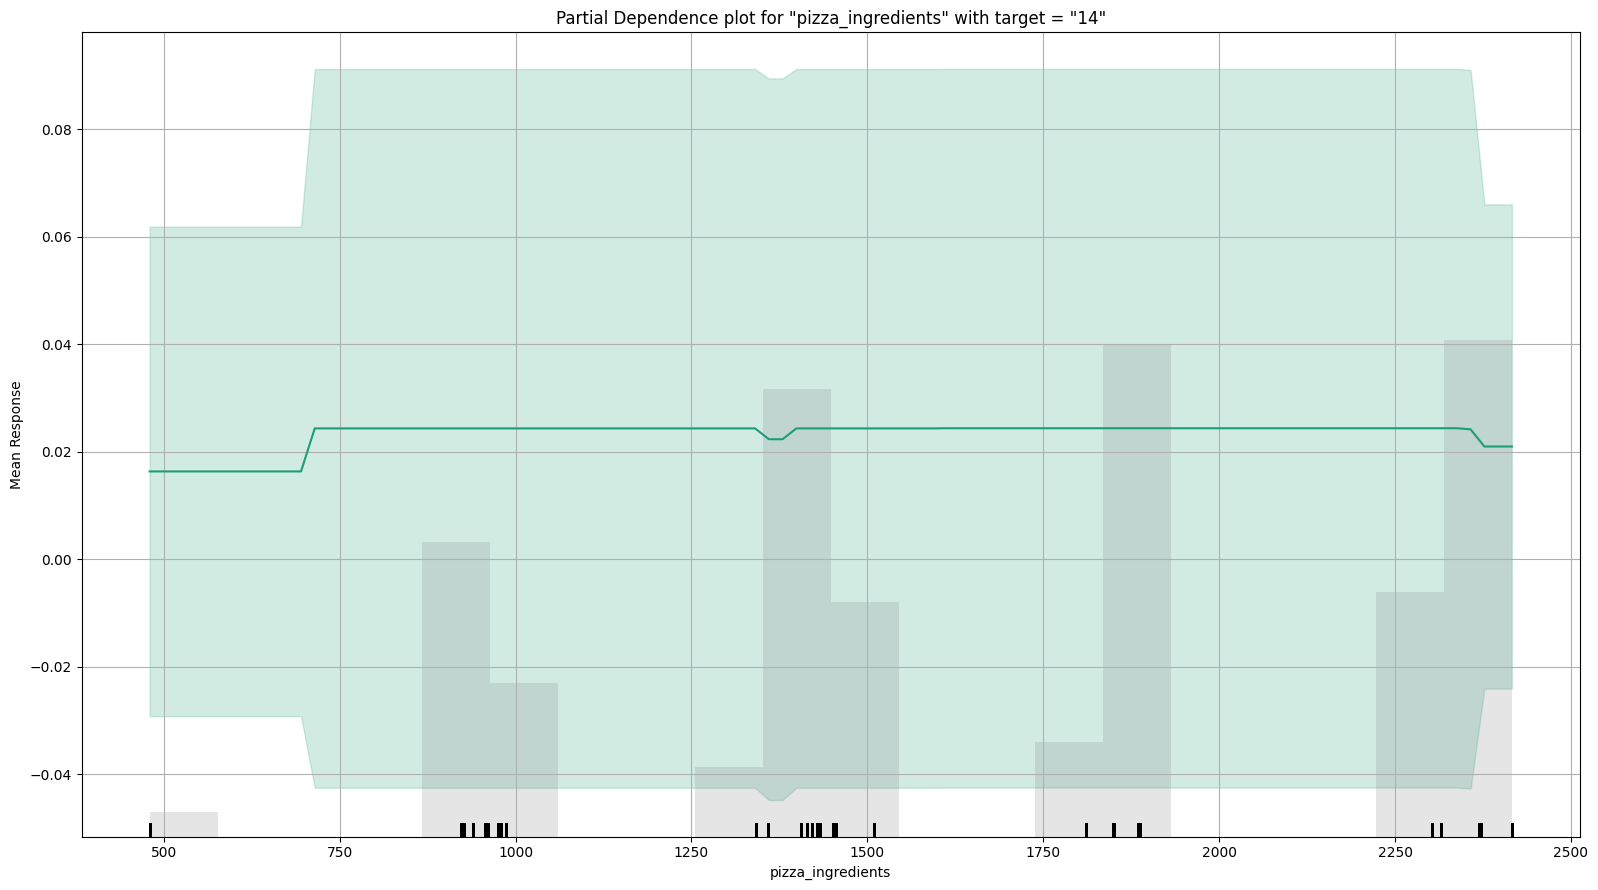

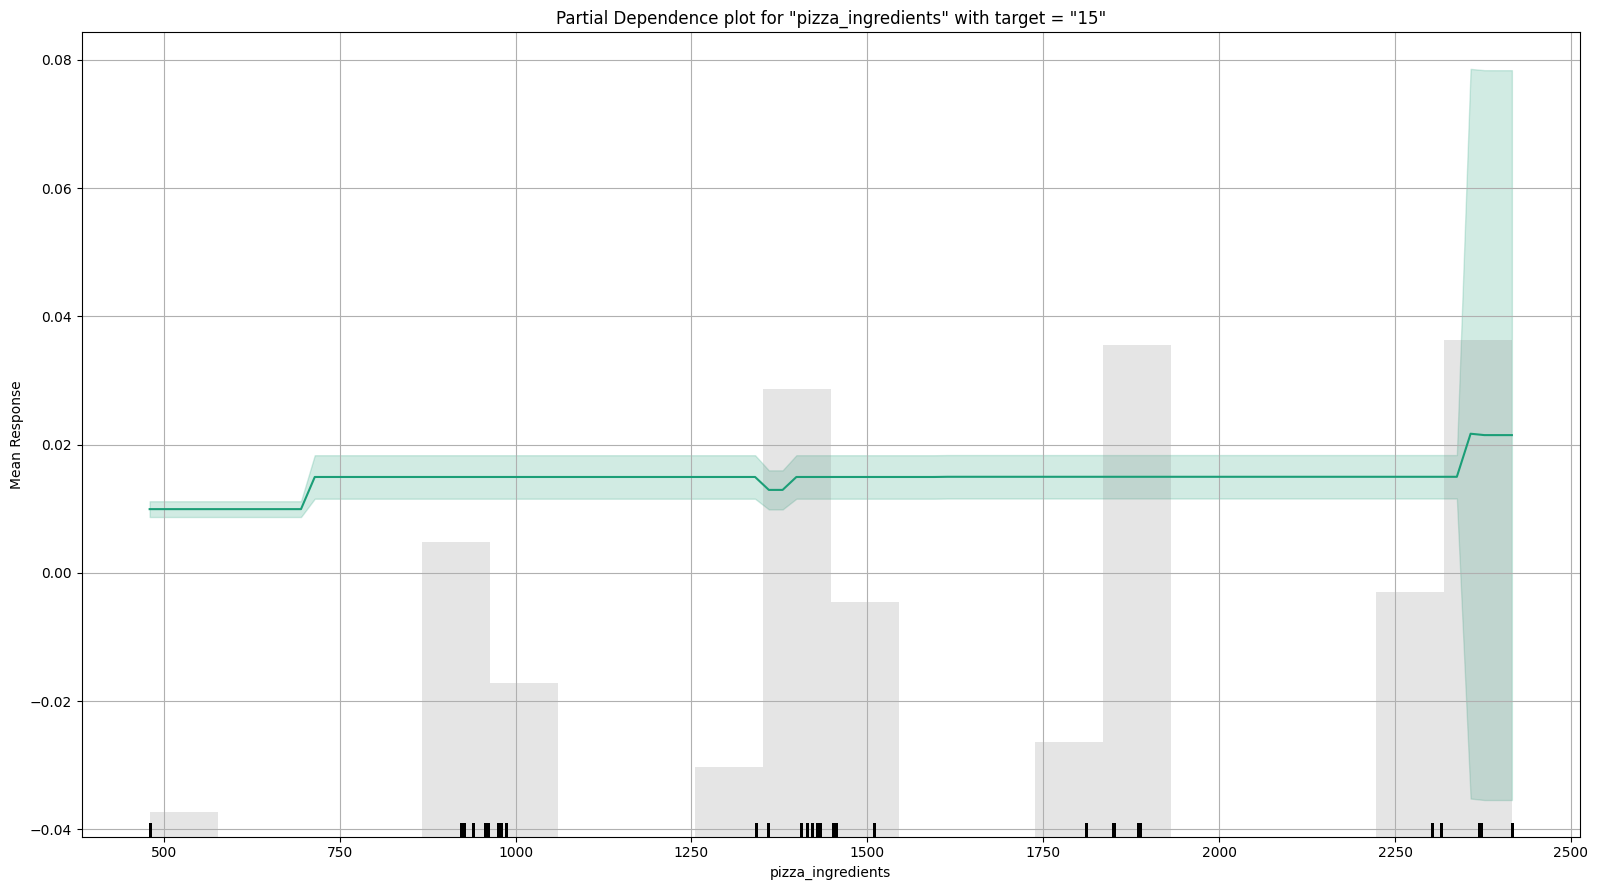

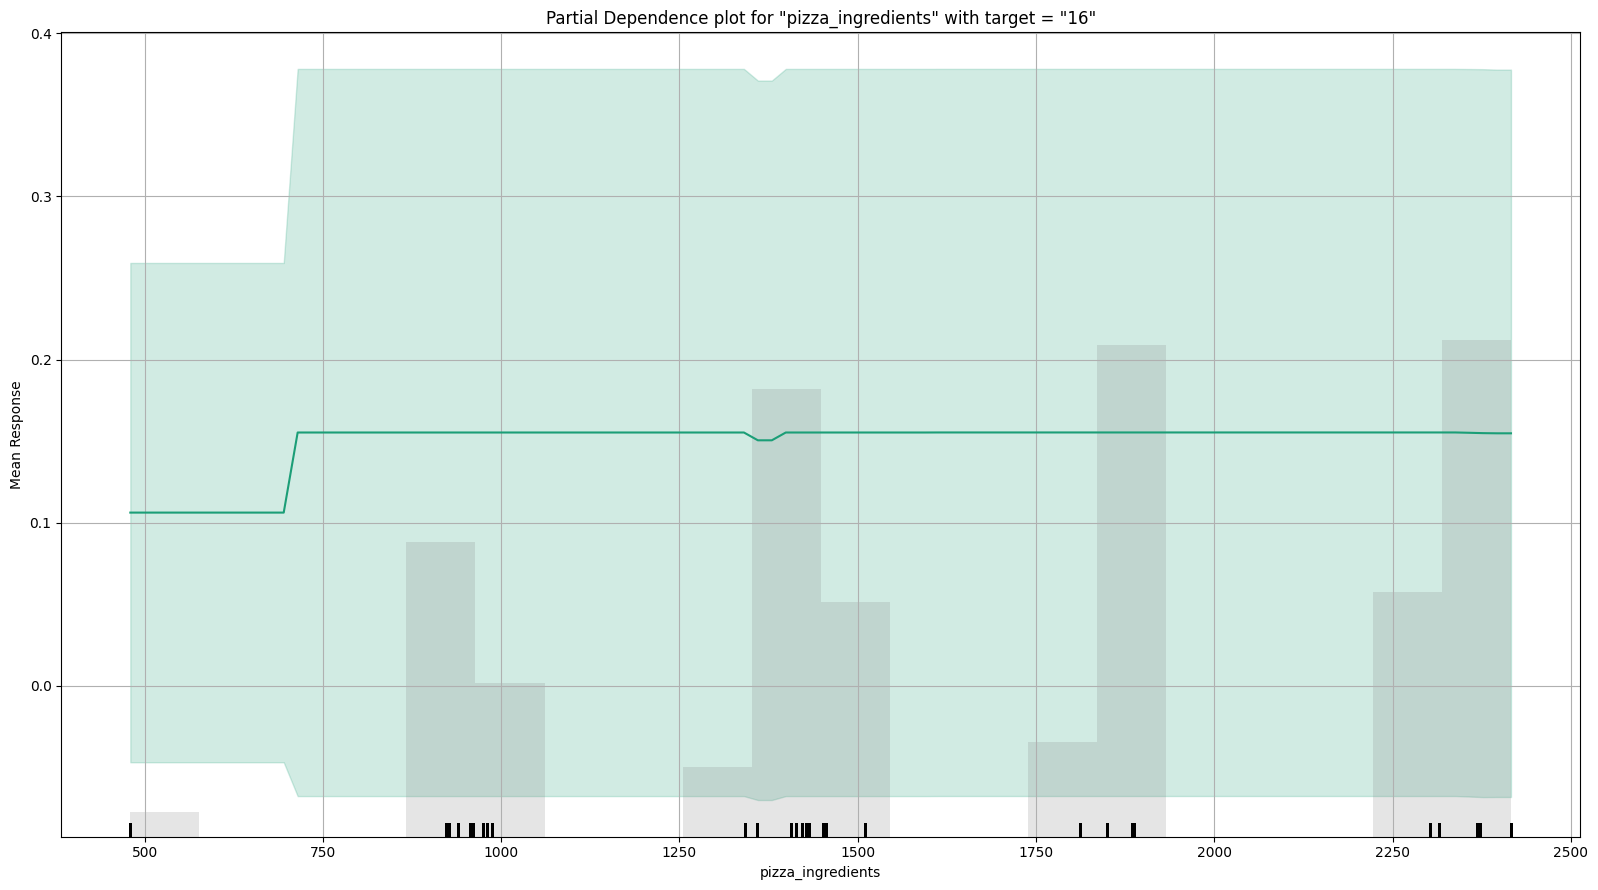

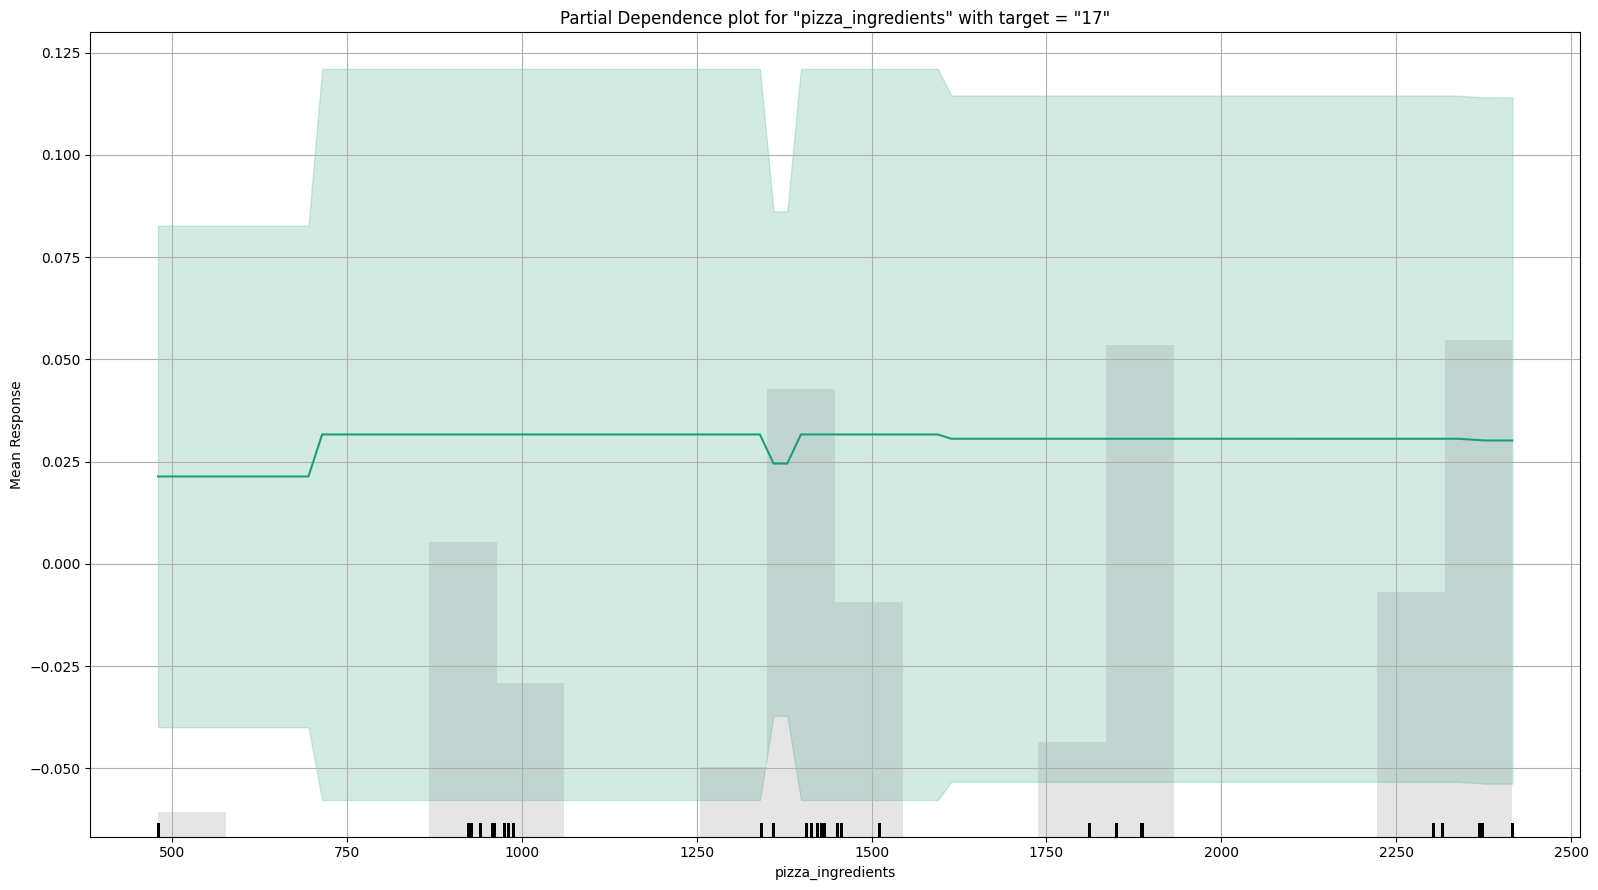

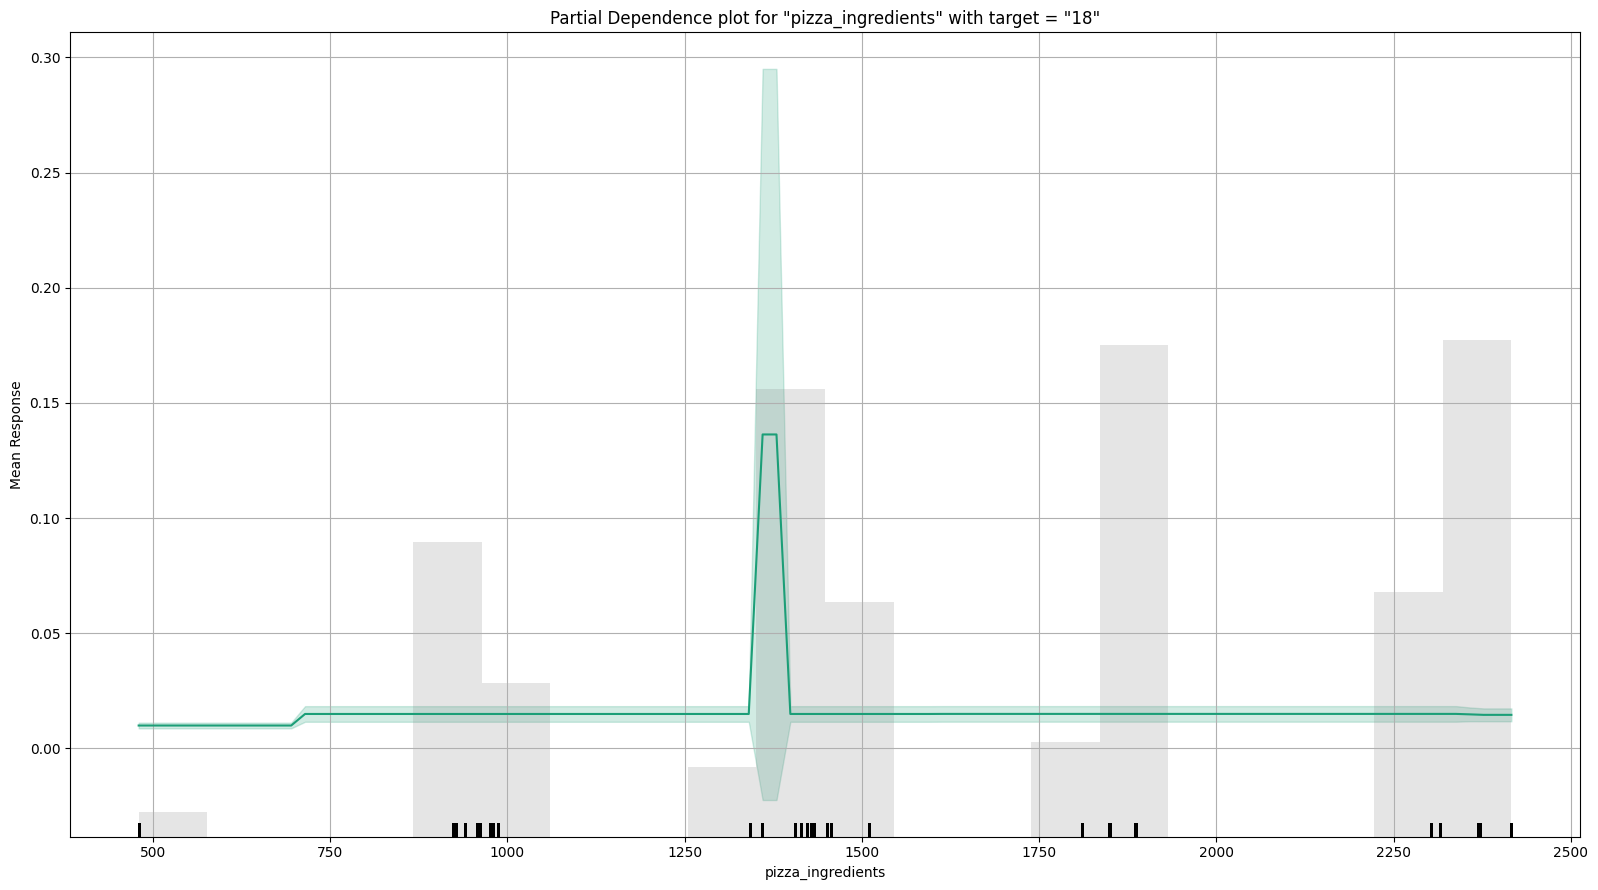

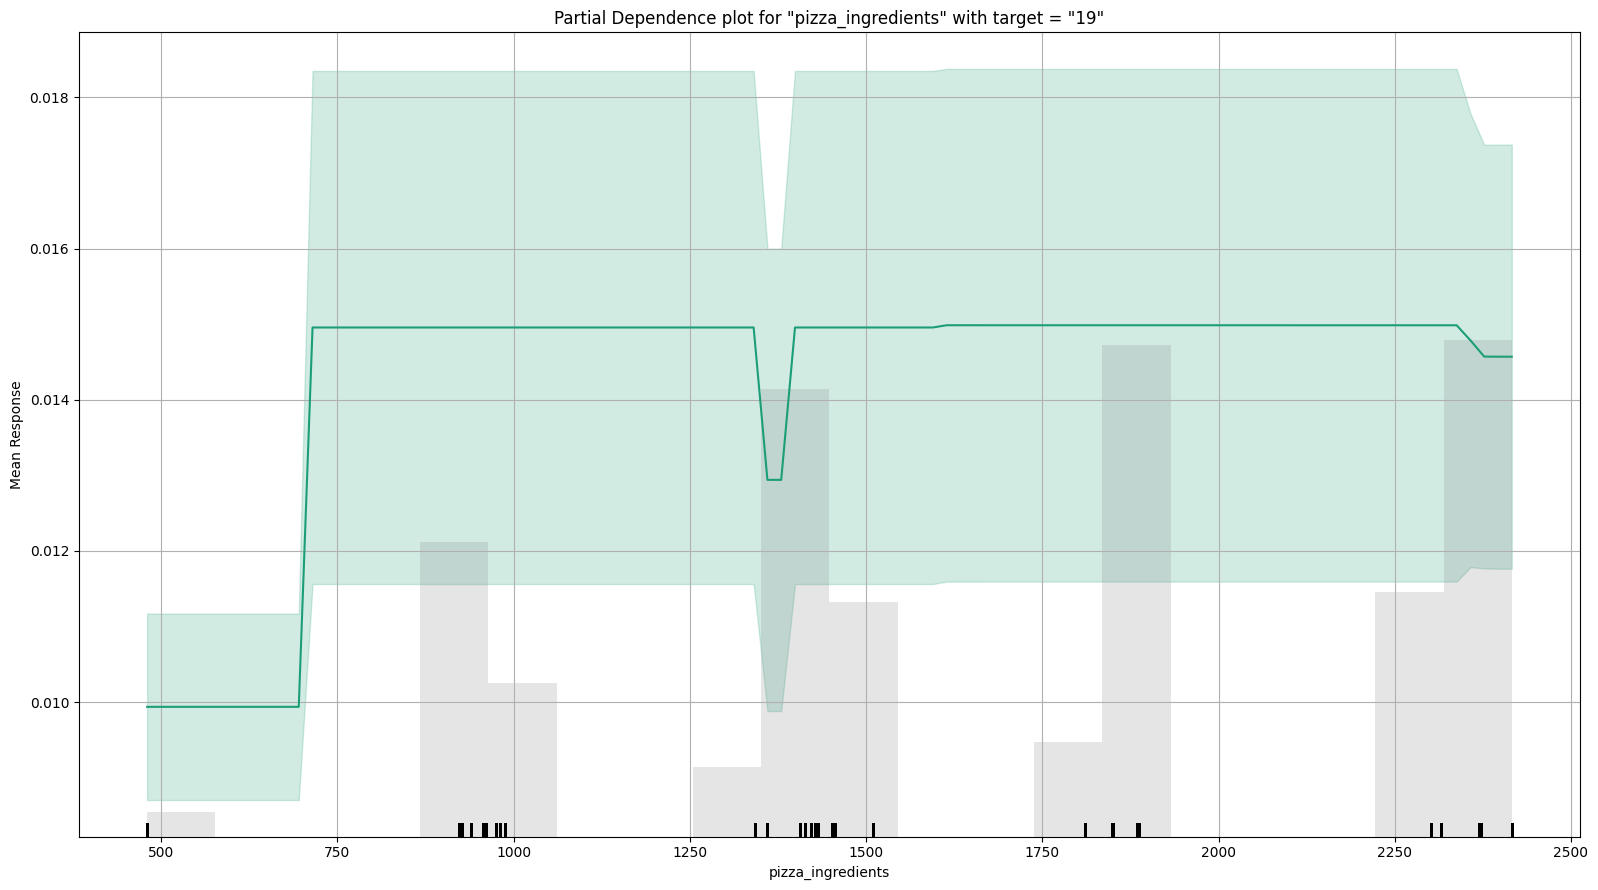

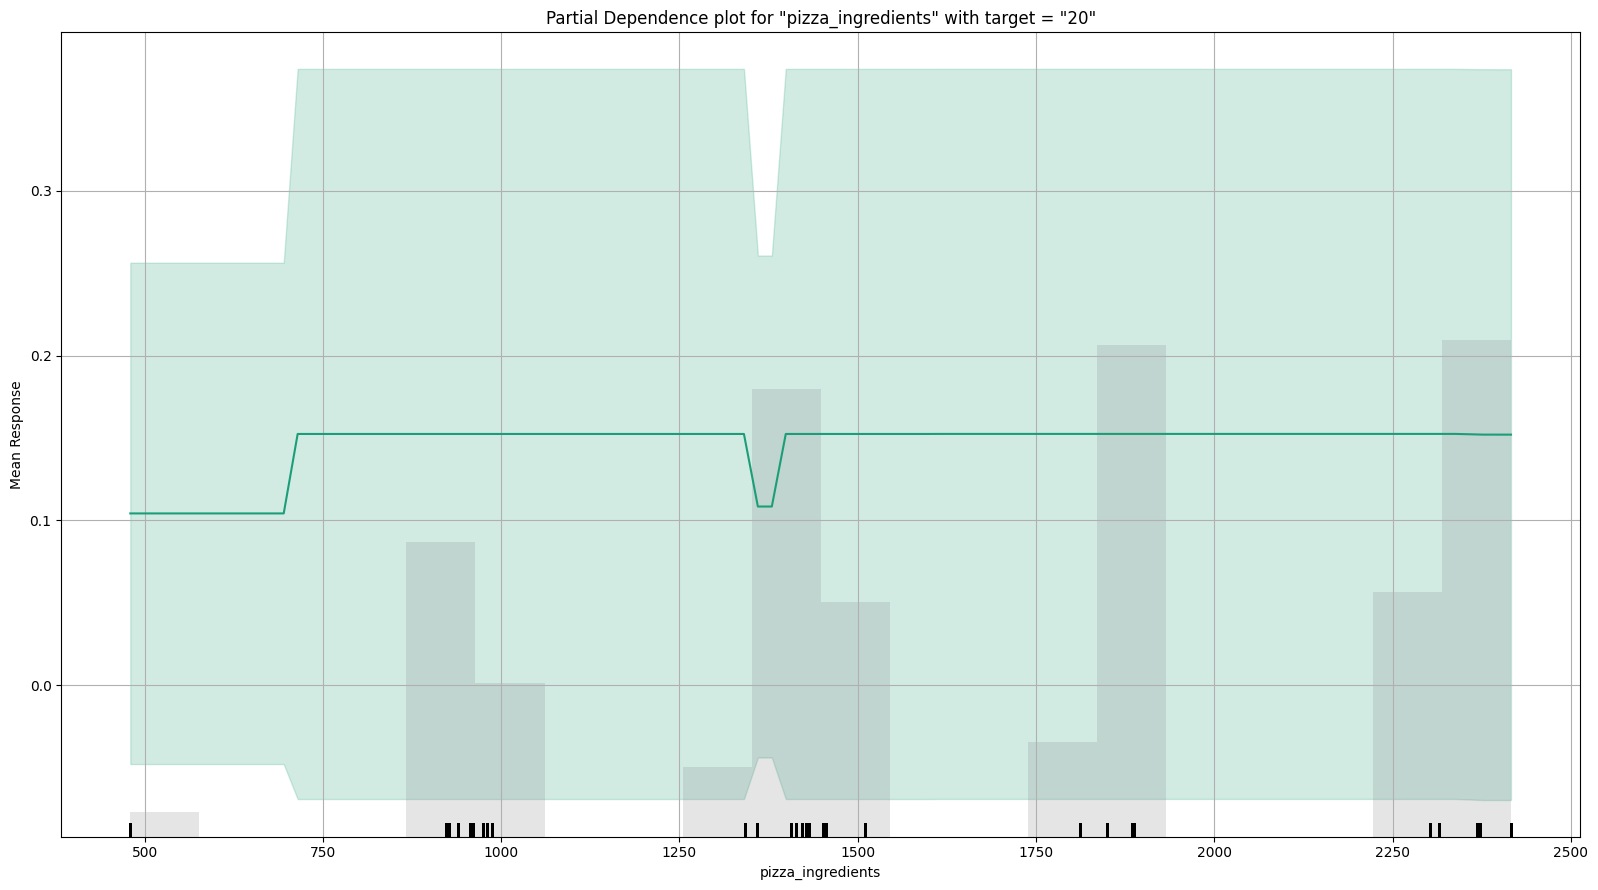

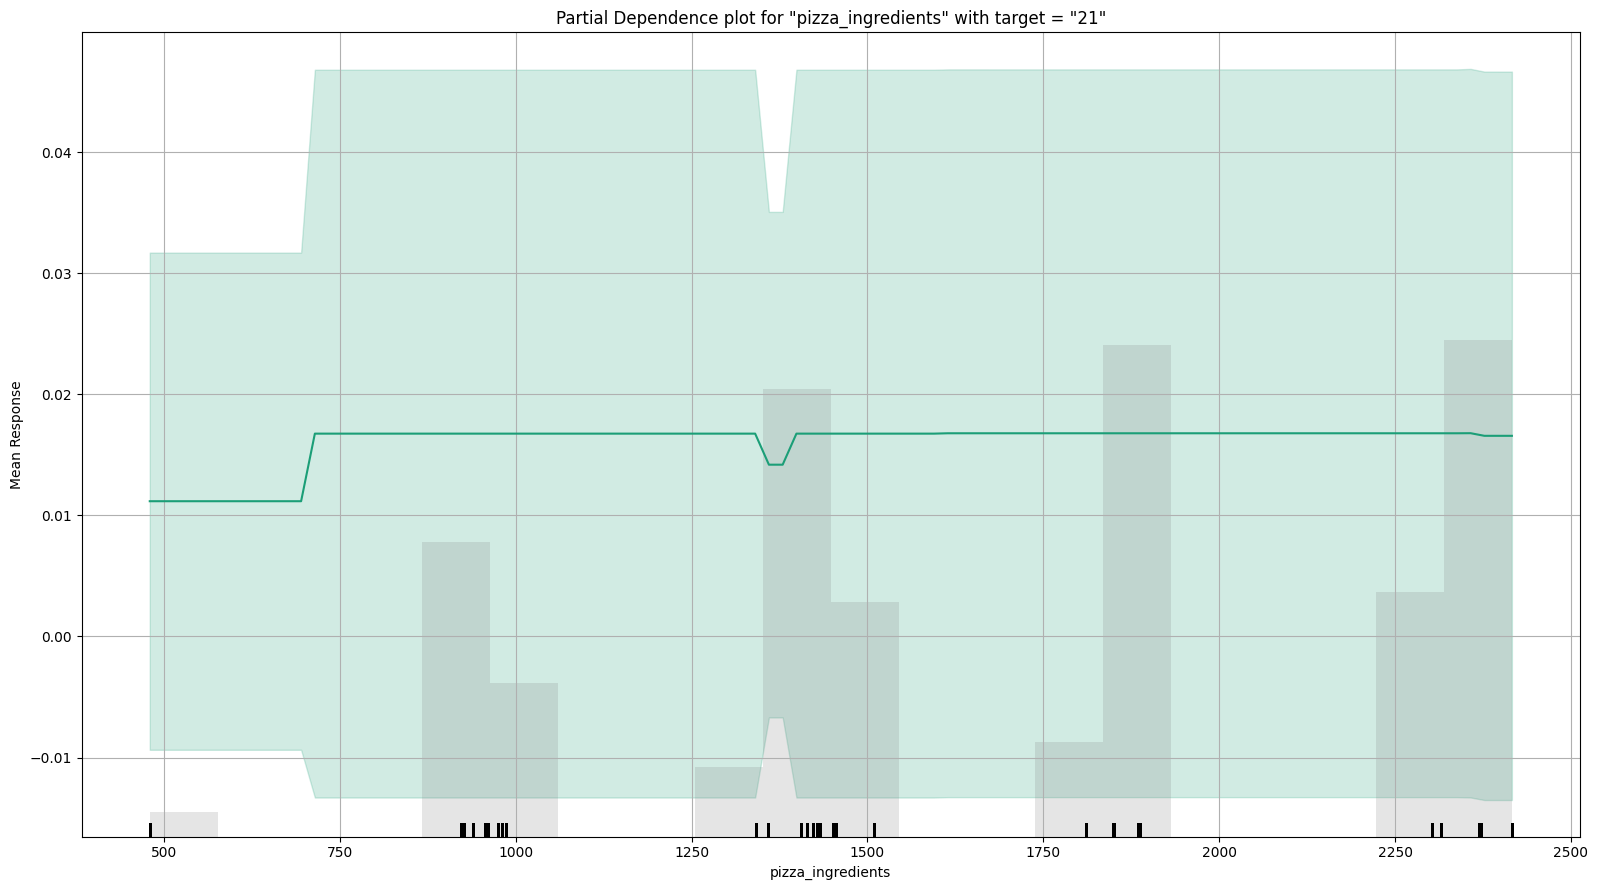

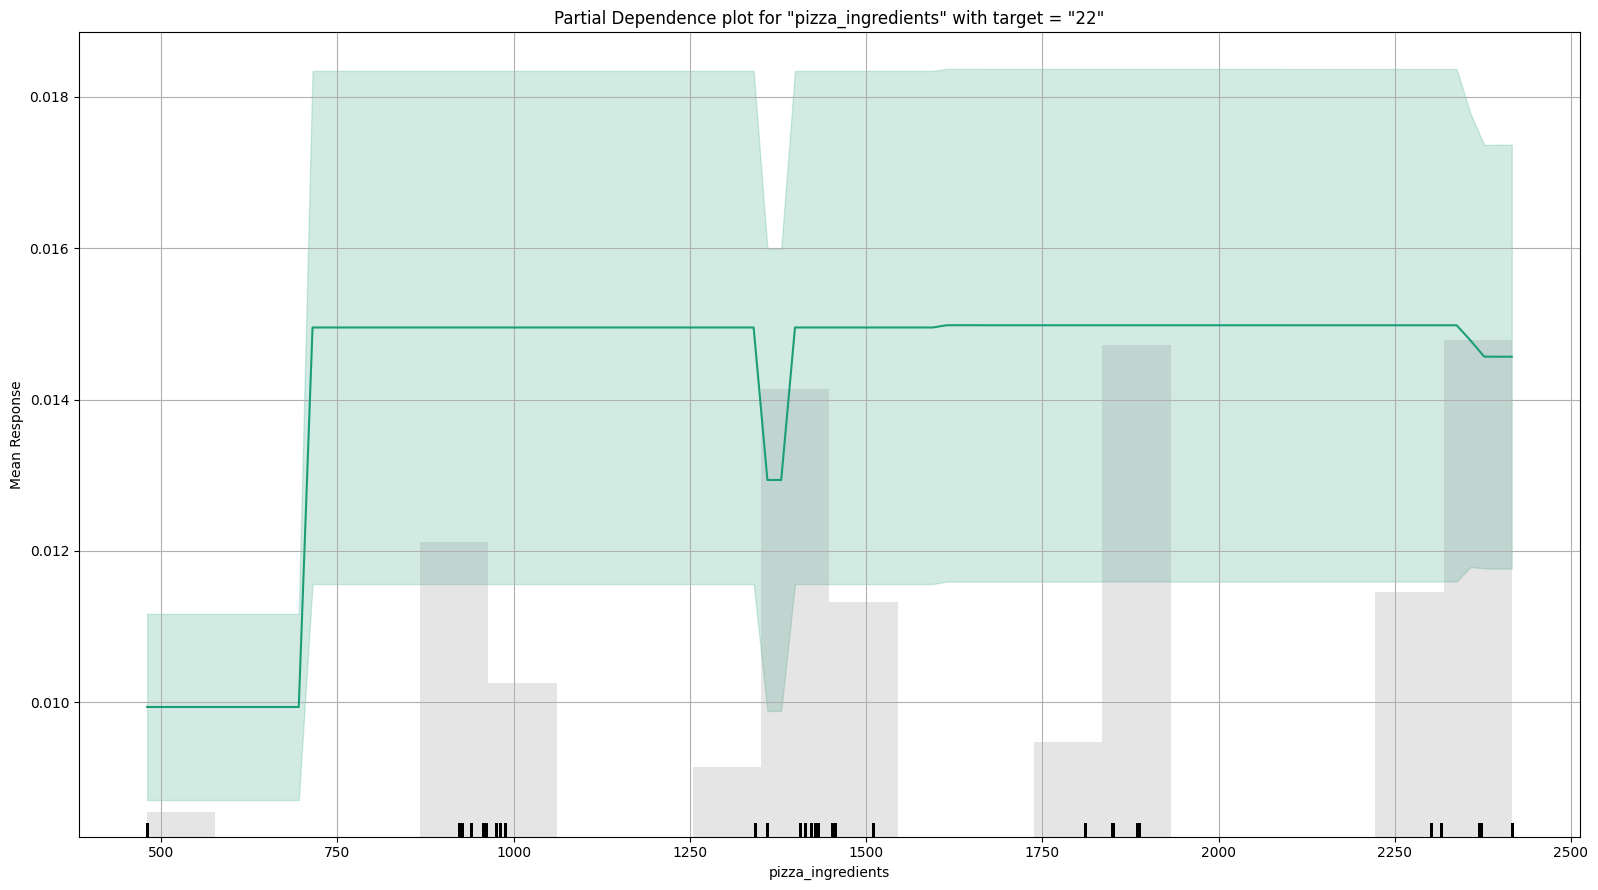

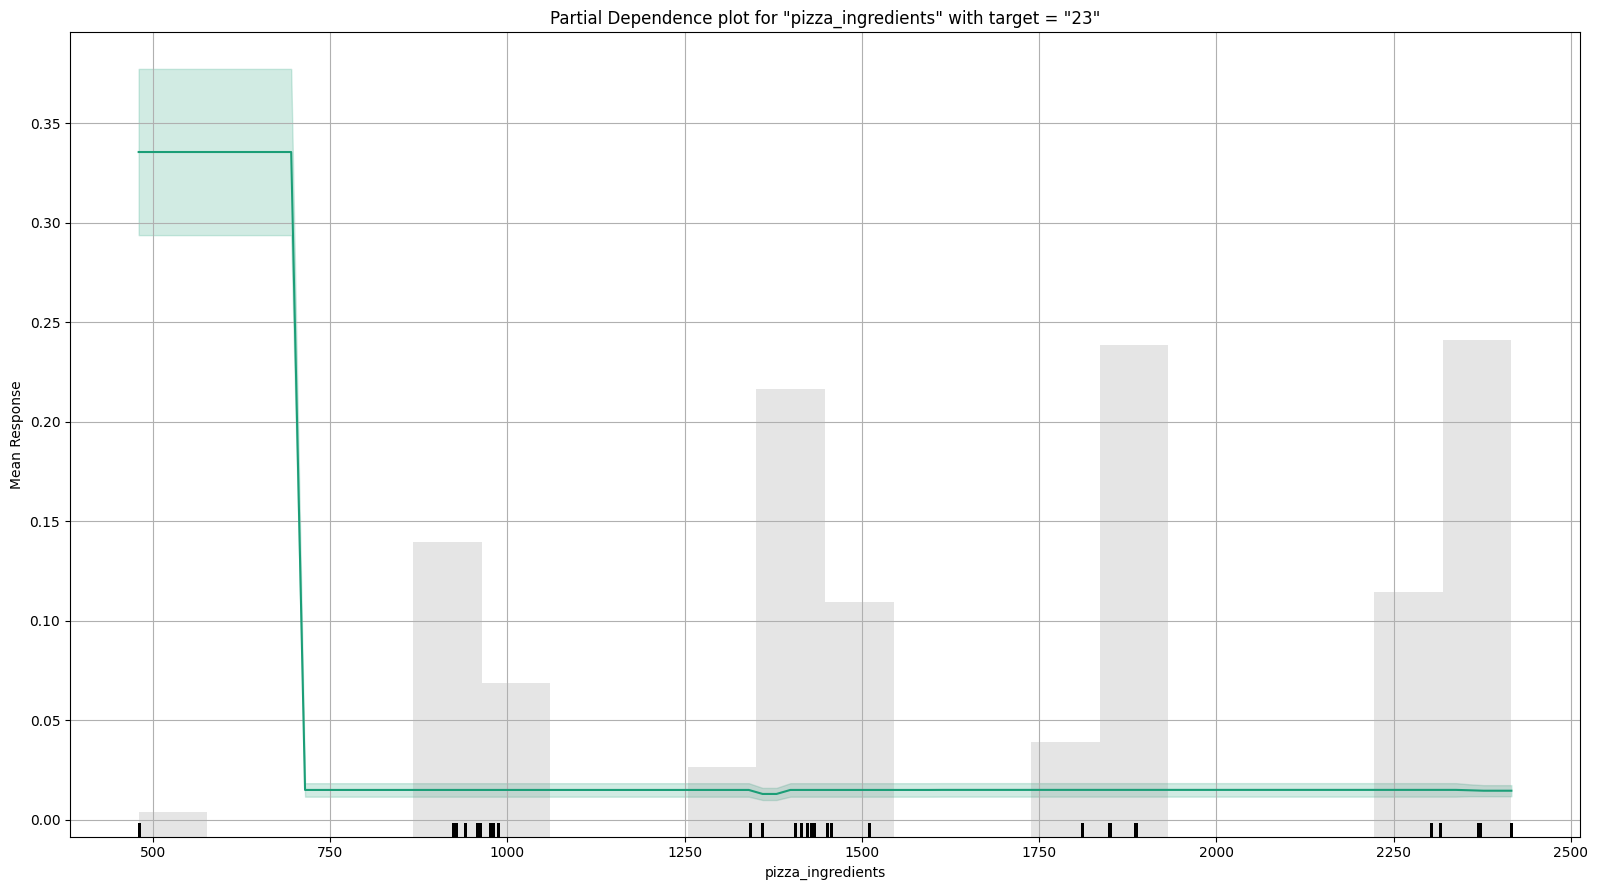

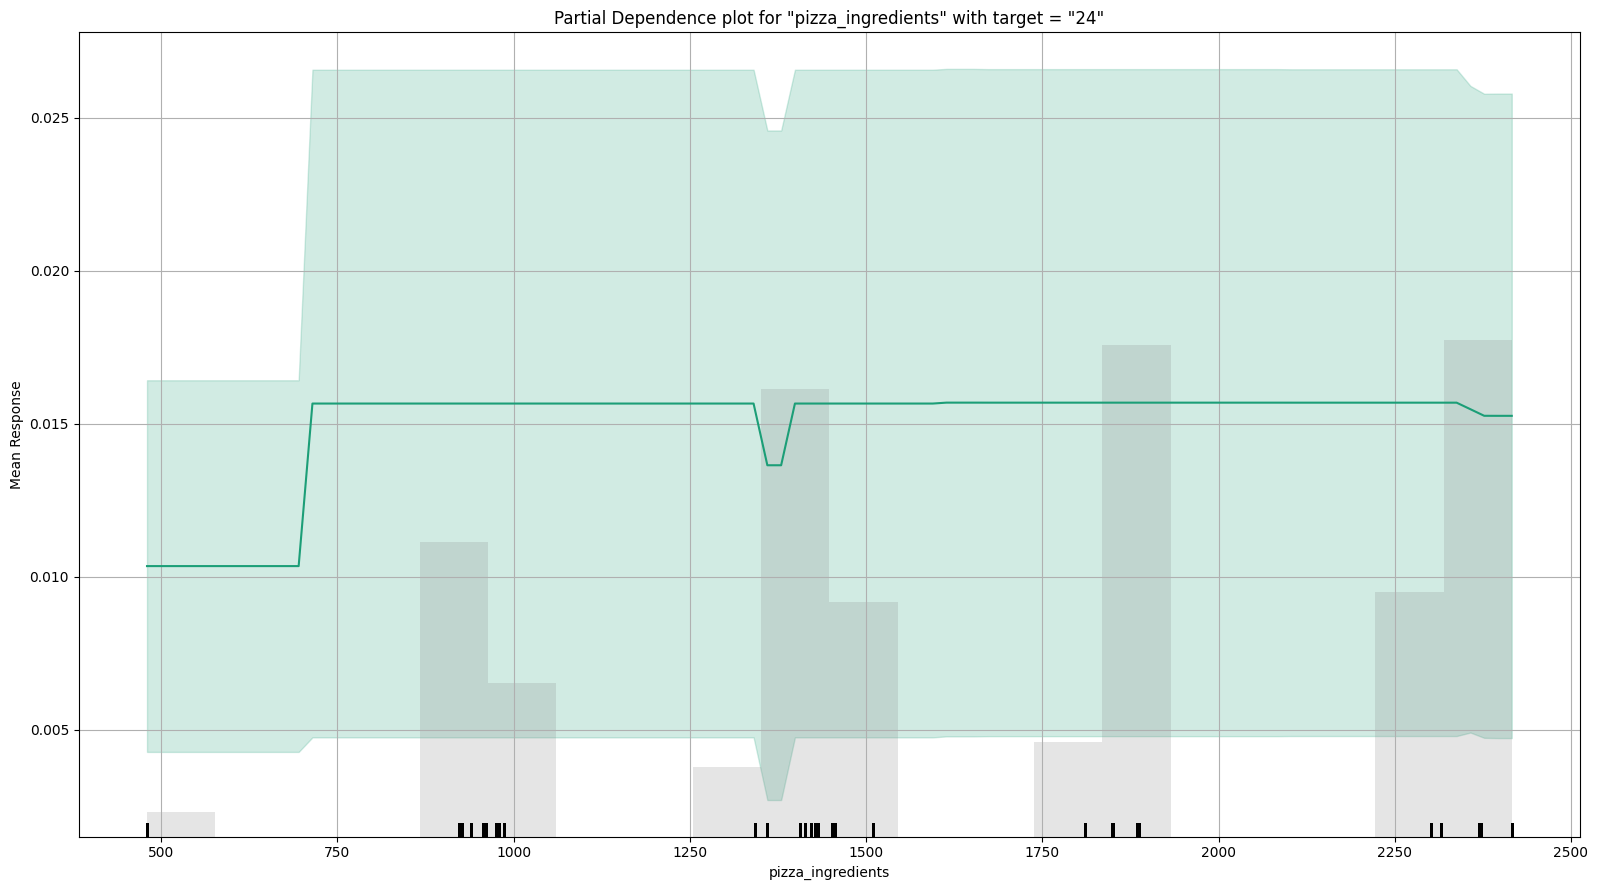

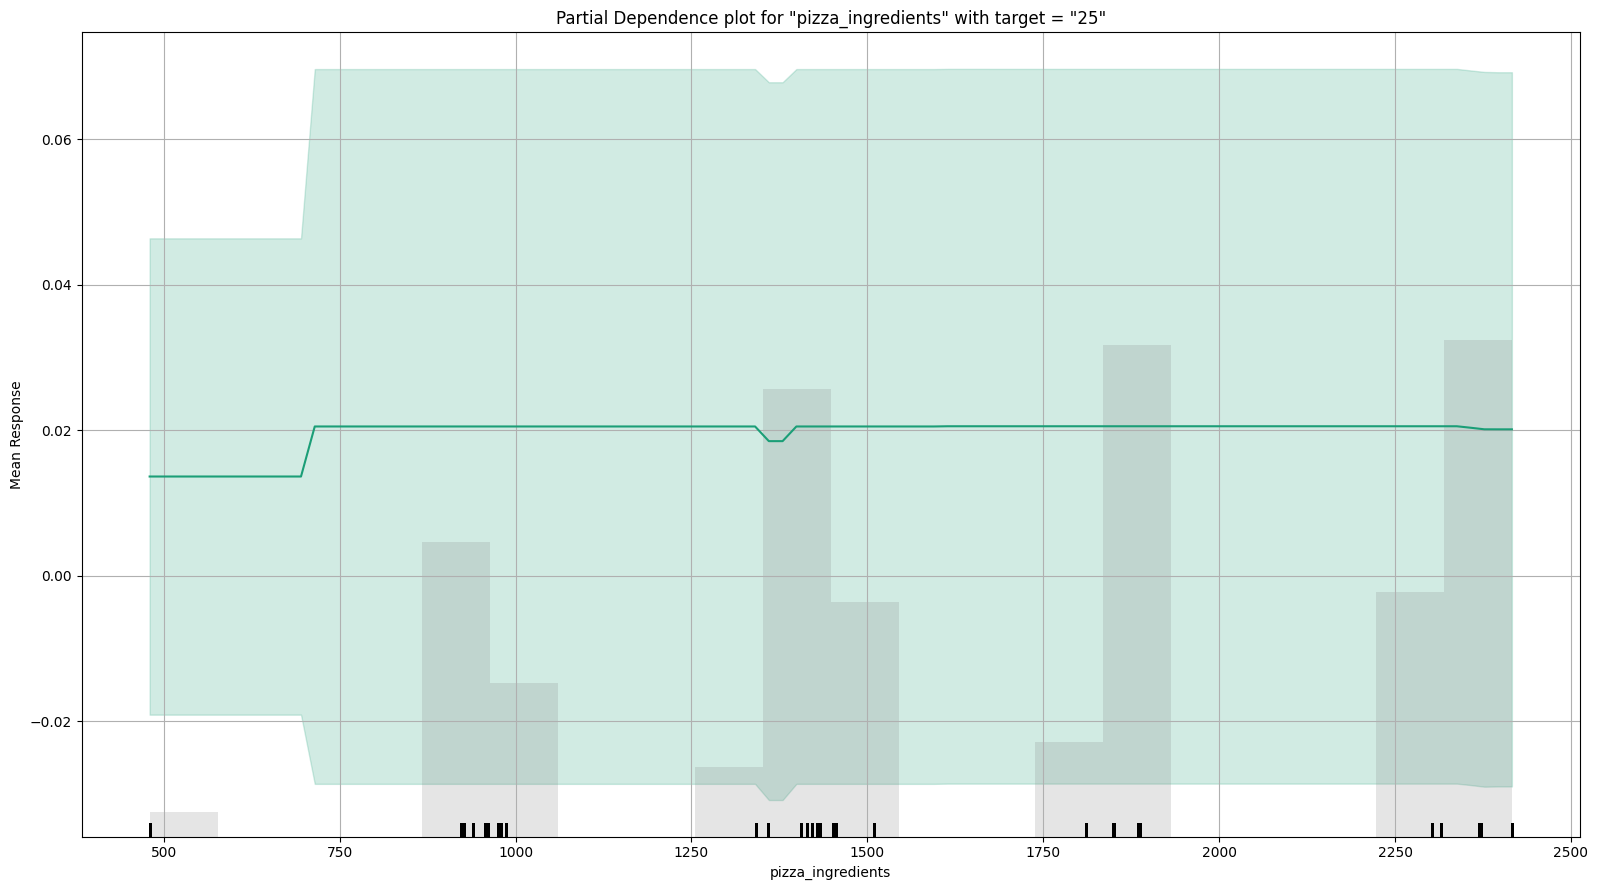

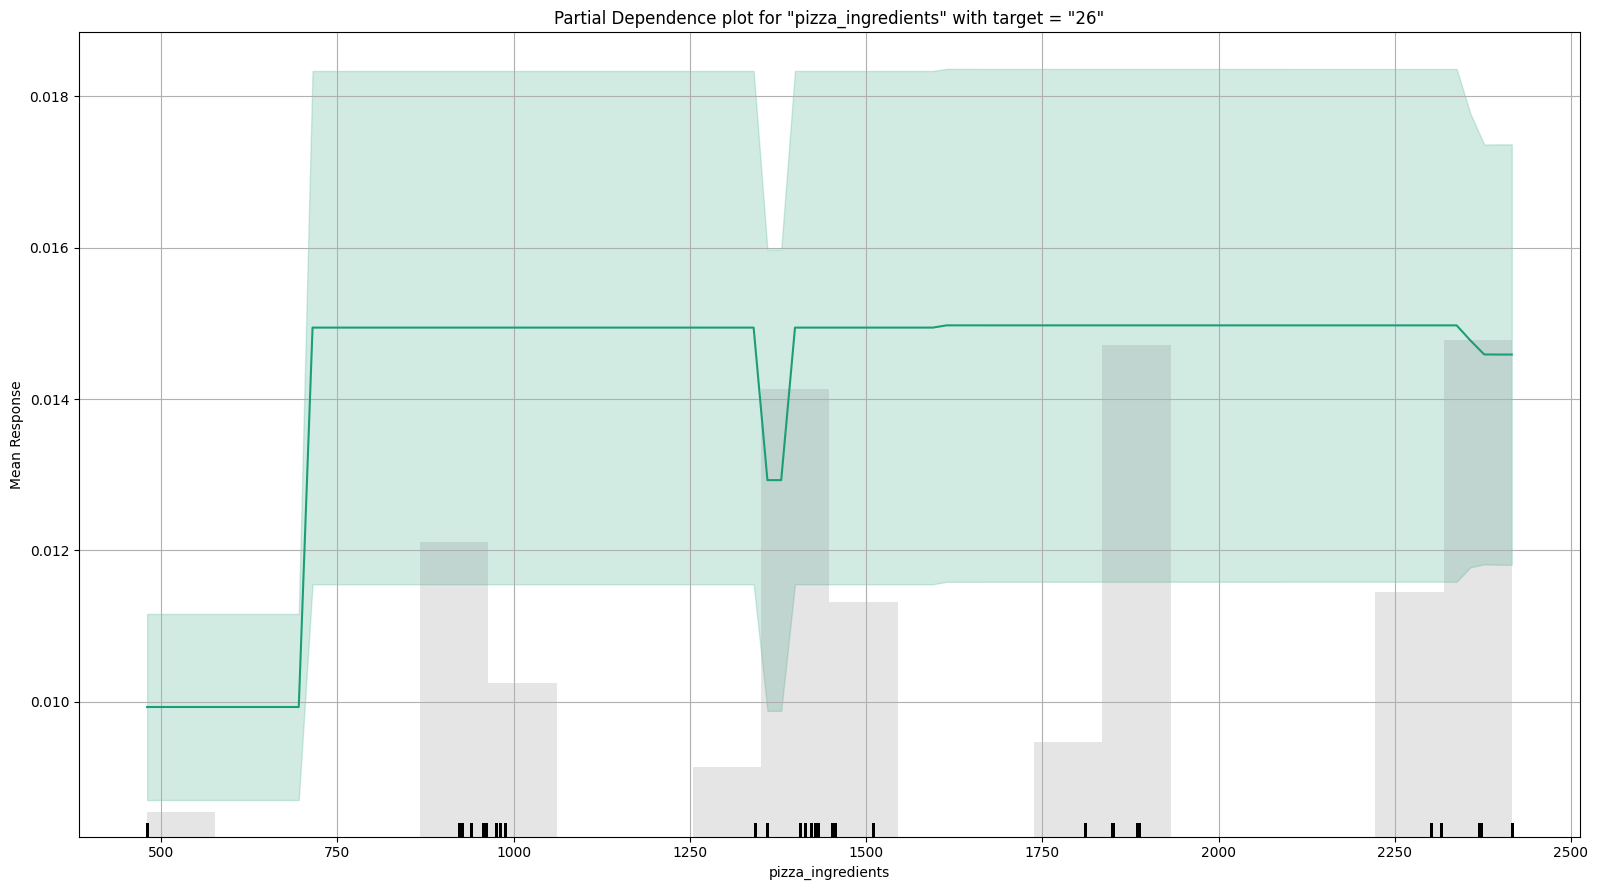

H2OJobCancelled: Job<$03017f000001f9aeffffffff$_8183e5954337fc80c9b6976c762f43ea> was cancelled by the user.

<Figure size 1600x900 with 0 Axes>

In [27]:
best_model.explain(data_train)

In [34]:
def model_performance_stats(perf):
    d={}
    try:
      d['mse']=perf.mse()
    except:
      pass
    try:
      d['rmse']=perf.rmse()
    except:
      pass
    try:
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass
    try:
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass
    try:
      d['residual_deviance']=perf.residual_deviance()
    except:
      pass
    try:
      d['null_deviance']=perf.null_deviance()
    except:
      pass
    try:
      d['aic']=perf.aic()
    except:
      pass
    try:
      d['logloss']=perf.logloss()
    except:
      pass
    try:
      d['auc']=perf.auc()
    except:
      pass
    try:
      d['gini']=perf.gini()
    except:
      pass
    return d

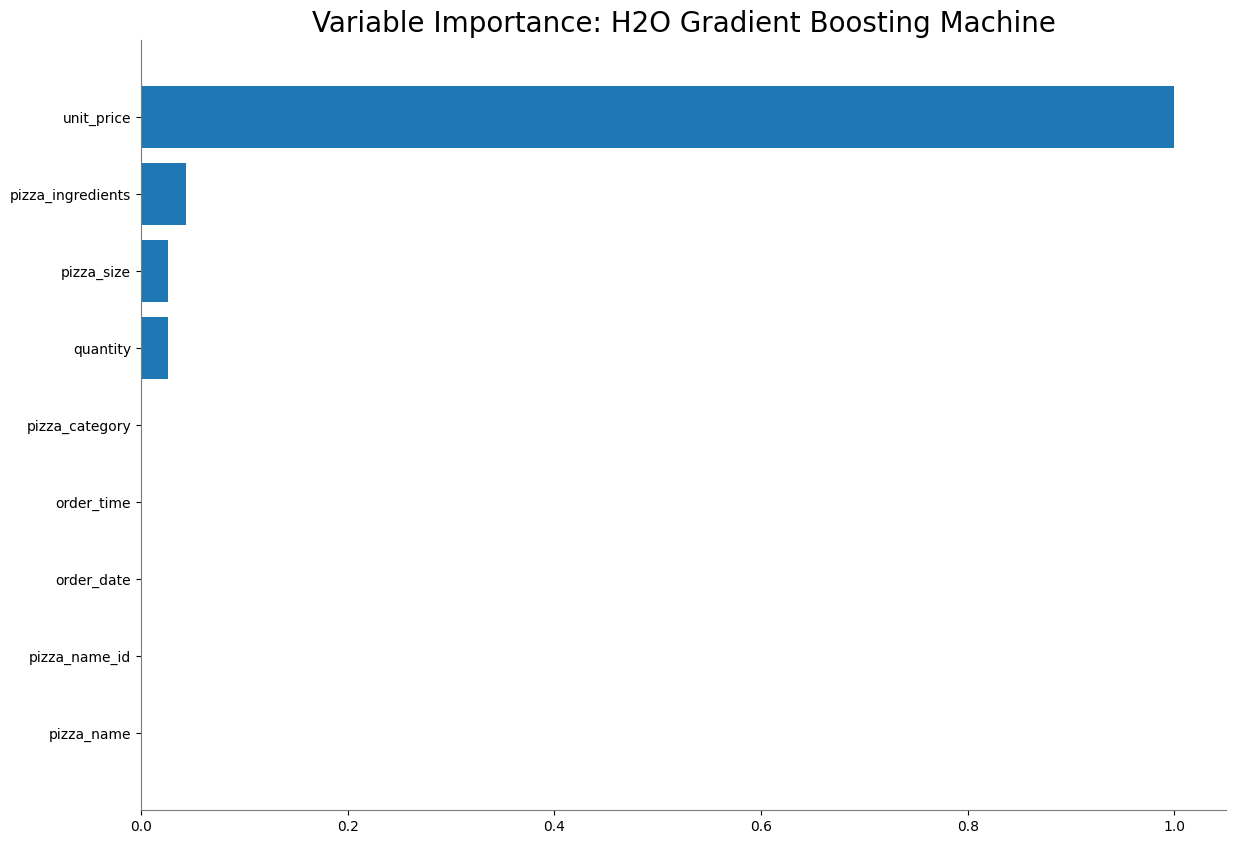

<Figure size 640x480 with 0 Axes>

In [35]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

In [36]:
!pip install shap

In [37]:
import shap

In [38]:
lg_explainer = shap.Explainer(linear_reg, x_train)
shap_values_lg = lg_explainer(x_test)

NameError: name 'linear_reg' is not defined

In [39]:
shap.plots.beeswarm(shap_values_lg, max_display=15)

NameError: name 'shap_values_lg' is not defined

In [ ]:
shap.summary_plot(shap_values_lg, x_train, plot_type="bar", color='steelblue')

In [ ]:
explainer = shap.TreeExplainer(xgb_reg)
shap_values = explainer.shap_values(x_train,approximate=False, check_additivity=False)

In [ ]:
shap.summary_plot(shap_values, x_train, plot_type="bar", color='steelblue')

In [ ]:
shap.summary_plot(shap_values, x_train)

##**What is the question?**
The main problem is to determine the standized price of the target variable with respect to other features. Clean and select features using this dataset of world stock prices effectively for machine learning purposes. This includes preprocessing the data, handling missing values, encoding categorical variables, standardizing features, and selecting significant features for modeling.

##**What did you do?**
Performing initial data exploration to understand the dataset's structure and content.Standardizing the features to bring them onto a common scale.Further,  We have analysed the dataset, picked out features and interpreted those features by training various models and interpretability methods such as regression coefficients, Shap and partial dependency plots. We have also mapped out variable importance for each method.


##**How well did it work?**
From these metrics, it was clear that the LASSO regularization method performs better than the Ridged method. It has significantly lower values of MSE, RMSE, MAE, and RMSLE, indicating that the LASSO regularization method provides better predictive performance and reduces errors on the cross-validation dataset.

But, the Ridged method may be preferred if interpretability of the model is more important, as it typically retains more features in the final model compared to LASSO.


Overall, the model with lambda search shows significant improvements in all metrics compared to both Ridge and Lasso regularization methods. It has lower MSE, RMSE, and MAE, indicating better predictive performance, and a higher R-squared value, indicating better goodness of fit to the data.

##**What did you learn?**
The keypoints I learn from the above assignment is merging of various algorithms and features in a single module and get a data retrieval on wider dataset and also learn to create a self made algorithms by implementing various already defined features such as linear regresion,Ridge,LASSO ,automl,model interpretation and shap analysis and here the data readings is the factor which plays an important role in deciding the next step which we need to write in the next code snippet and one more thing there a significant change in mathematical readings such as accuracy and area under curve if we combine various models together.

## **CONCLUSION**

The study begins with careful data preprocessing, making sure the data is clean, normalized, and suitable for analysis. Then, exploratory data analysis uncovers patterns and trends using visualizations and statistical tests.

Next, various machine learning models are selected and trained, with experiments including hyperparameter tuning. Performance is rigorously evaluated using values of RMSE, MSE etc.

Finally, implications of the findings, offering insights into the dataset and the models' applicability to similar problems. The clear presentation, including code, commentary, and visualizations, shows deep engagement with the analysis process, leading to actionable conclusions and contributions to the field.

## **REFERENCES**



1.   Sckit learn offcial documentation
2.   Refered Towards Data Science
3.   Correlation Matrix and Heatmap
4.   Random forest regression
5.   Linear regression
6.   Gradient boosting

**Correlation Matrix and Heatmap:**
The correlation matrix and heatmap were created using the Seaborn library in Python, as outlined in the Seaborn documentation: https://seaborn.pydata.org/
Interpretation of the correlation matrices and heatmap followed the guidance from relevant tutorials and guides used in this analysis.

**Random Forest Regression:**
Random forest regression was implemented in this analysis using Scikit-Learn in Python, and reference was made to the Scikit-Learn documentation: https://scikit-learn.org/stable/documentation.html
The analysis benefited from academic sources such as "Breiman, L. (2001). Random forests. Machine learning, 45(1), 5-32," which provided insights into the random forest algorithm.

**Linear Regression:**
Linear regression was employed in this analysis through the Scikit-Learn library in Python, with reference to its documentation: https://scikit-learn.org/stable/documentation.html
The analysis drew from foundational resources like "Hastie, T., Tibshirani, R., & Friedman, J. (2009). The elements of statistical learning: Data mining, inference, and prediction. Springer," to deepen the understanding of linear regression.

**Gradient Boosting:**
Gradient boosting techniques, including XGBoost, were utilized in this analysis, with reference to the XGBoost documentation: https://xgboost.readthedocs.io/
The analysis incorporated insights from academic sources, such as "Friedman, J. H. (2001). Greedy function approximation: A gradient boosting machine. The Annals of Statistics, 29(5), 1189-1232," which contributed to the understanding of gradient boosting methods.

The algorithms were referred directly from the Sckit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?).

1)https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1

2)https://towardsdatascience.com/decision-trees-explained-3ec41632ceb6

3)https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/

4)https://www.analyticsvidhya.com/blog/2020/10/all-about-decision-tree-from-scratch-with-python-implementation/

5)https://www.kdnuggets.com/2020/04/visualizing-decision-trees-python.html

6)https://www.datacamp.com/community/tutorials/xgboost-in-python

7)https://github.com/MayurAvinash/DESM_INFO6105/blob/main/Model_Interpretability_Assignment.ipynb

## **LICENSE**

MIT License

Copyright (c) 2024 sakshiraade

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.